## 1. 음주 여부에 따라 건강검진 수치 차이가 있을까?
## 2. 신장과 허리둘레의 크기는 체중과 상관관계가 있을까?
- 분석을 통해 가설을 검정해 봅니다.
- 가설 검정 시 A vs B로 나누어 진행하는 방향도 생각해보자.
## 3. 라이브러리 로드

In [1]:
# 분석에 사용할 pandas, 수치계산에 사용할 numpy, 시각화에 사용할 seaborn을 불러옵니다.
# 또, 구 버전의 주피터 노트북에서는 %matplotlib inline 설정이 되어야 노트북 안에서 그래프를 시각화 합니다.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

## 4. 한글 폰트 설정

In [2]:
# Google Colab 사용 시 아래 주석을 풀고 폰트설정을 합니다.
# 로컬 아나콘다 사용 시에는 그대로 주석처리 해놓으시면 됩니다.
# 나굼고딕 설치

plt.rc('font', family='AppleGothic')

In [3]:
# 한글포트를 설정해 주지 않으면 그래프 상에서 한글이 깨져보입니다.
# 한글이 출력될 수 있도록 폰트 설정을 해줍니다.
# 운영체제별 설정을 위해 로드합니다.
import os

print(os.name)

if os.name == 'posix':
    plt.rc('font', family='AppleGothic')
else:
    plt.rc('font', family='Malgun Gothic')

# 마이너스 폰트 깨지는 문제에 대한 대처
plt.rc('axes', unicode_minus=False)

posix


In [4]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보입니다.
# 폰트의 주변이 흐릿하게 보이는 것을 방지합니다.
%config InlineBackend.figure_format ='retina'

## 5. 데이터 불러오기
- 건강검진정보란 2002년부터 2013년까지의 국민건강보험의 직장가입자와 40세 이상의 피부양자, 세대주인 지역가입자와 40세 이상의 지역가입자의 일반건강검진 결과와 이들 일반건강검진 대상자 중에 만 40세와 만 66세에 도달한 이들이 받게 되는 생애전환기 건강검진진당 수검이력이 있는 각 연도별 수진자 100만 명에 대한 기본정보(성, 연령대, 시도코드 등)와 검진내역(신장, 체중, 총콜레스테롤, 혈색소 등)으로 구성된 개방데이터이다.

공공데이터 개방서비스(http://nhiss.nhis.or.kr/op/it/index.do)에서도 다운로드 받을 수 있음.

- 건강검진정보(2017) 다운로드 받기 : https://www.data.go.kr/dataset/15007122/fileData.do

In [5]:
# 다운로드 받은 파일을 판다스의 read_csv를 통해 읽어옵니다.
# 파일을 읽어온 후 shape로 행과 열의 수를 출력합니다.
# encoding='cp949' : csv file의 line수가 2^16승 즉 65536이상이 되어 error 발생될 시 사용
df = pd.read_csv('./data/NHIS_OPEN_GJ_2017_v1.1.csv', encoding='cp949')
df.shape

(1000000, 34)

### 5.1 미리보기

In [6]:
# sample, head, tail을 통해 데이터를 미리보기 합니다.
df.sample(n=3)

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
525624  2017   525625     1           12    11        175         75  87.4   
736441  2017   736442     2           10    30        160         45  65.0   
683193  2017   683194     2            9    50        155         55  69.7   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
525624    0.6    0.9  ...   46.0   1.0     Y         N      NaN    NaN   
736441    0.3    0.1  ...   14.0   3.0     N         N      NaN    NaN   
683193    1.0    0.7  ...   13.0   1.0     Y         N      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석     데이터공개일자  
525624      NaN           NaN  NaN  2018-11-26  
736441      NaN           NaN  NaN  2018-11-26  
683193      NaN           NaN  NaN  2018-11-26  

[3 rows x 34 columns]

In [7]:
df.head()

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  시력(좌)  \
0  2017        1     1            8    43        170         75  90.0    1.0   
1  2017        2     1            7    11        180         80  89.0    0.9   
2  2017        3     1            9    41        165         75  91.0    1.2   
3  2017        4     1           11    48        175         80  91.0    1.5   
4  2017        5     1           11    30        165         60  80.0    1.0   

   시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  치아마모증유무  \
0    1.0  ...   40.0   1.0     Y         Y      NaN    NaN      NaN   
1    1.2  ...   27.0   3.0     N         Y      NaN    NaN      NaN   
2    1.5  ...   68.0   1.0     N         N      NaN    NaN      NaN   
3    1.2  ...   18.0   1.0     N         Y      NaN    NaN      NaN   
4    1.2  ...   25.0   1.0     N         Y      NaN    NaN      NaN   

   제3대구치(사랑니)이상   치석     데이터공개일자  
0           NaN    Y  2018-11-26  
1           NaN  NaN  2018-11-26  
2           NaN  NaN  2018-11-26  
3           NaN    N  2018-11-26  
4           NaN    N  2018-11-26  

[5 rows x 34 columns]

In [8]:
df.tail(3)

기준년도  가입자일련번호  성별코드  연령대코드(5세단위)  시도코드  신장(5Cm단위)  체중(5Kg단위)  허리둘레  \
999997  2017   999998     2            9    26        155         50  68.0   
999998  2017   999999     1            6    29        175         60  72.0   
999999  2017  1000000     1           11    41        160         70  90.5   

        시력(좌)  시력(우)  ...  감마지티피  흡연상태  음주여부  구강검진수검여부  치아우식증유무  결손치유무  \
999997    1.0    0.7  ...   17.0   3.0     Y         N      NaN    NaN   
999998    1.5    1.0  ...   17.0   1.0     N         N      NaN    NaN   
999999    1.0    1.5  ...   36.0   3.0     Y         N      NaN    NaN   

        치아마모증유무  제3대구치(사랑니)이상   치석     데이터공개일자  
999997      NaN           NaN  NaN  2018-11-26  
999998      NaN           NaN  NaN  2018-11-26  
999999      NaN           NaN  NaN  2018-11-26  

[3 rows x 34 columns]

## 6 기본정보 보기

In [9]:
# info를 통해 데이터의 크기, 형식, 메모리 사용량등을 봅니다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 34 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   기준년도          1000000 non-null  int64  
 1   가입자일련번호       1000000 non-null  int64  
 2   성별코드          1000000 non-null  int64  
 3   연령대코드(5세단위)   1000000 non-null  int64  
 4   시도코드          1000000 non-null  int64  
 5   신장(5Cm단위)     1000000 non-null  int64  
 6   체중(5Kg단위)     1000000 non-null  int64  
 7   허리둘레          999734 non-null   float64
 8   시력(좌)         999817 non-null   float64
 9   시력(우)         999811 non-null   float64
 10  청력(좌)         999842 non-null   float64
 11  청력(우)         999844 non-null   float64
 12  수축기혈압         999981 non-null   float64
 13  이완기혈압         999982 non-null   float64
 14  식전혈당(공복혈당)    999958 non-null   float64
 15  총콜레스테롤        999957 non-null   float64
 16  트리글리세라이드      999955 non-null   float64
 17  HDL콜레스테롤      999956 non-nul

In [10]:
# 컬럼의 수가 많습니다. 컬럼만 따로 출력
df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [11]:
# dtypes를 통해 데이터 형식만 출력
df.dtypes

기준년도              int64
가입자일련번호           int64
성별코드              int64
연령대코드(5세단위)       int64
시도코드              int64
신장(5Cm단위)         int64
체중(5Kg단위)         int64
허리둘레            float64
시력(좌)           float64
시력(우)           float64
청력(좌)           float64
청력(우)           float64
수축기혈압           float64
이완기혈압           float64
식전혈당(공복혈당)      float64
총콜레스테롤          float64
트리글리세라이드        float64
HDL콜레스테롤        float64
LDL콜레스테롤        float64
혈색소             float64
요단백             float64
혈청크레아티닌         float64
(혈청지오티)AST      float64
(혈청지오티)ALT      float64
감마지티피           float64
흡연상태            float64
음주여부             object
구강검진수검여부         object
치아우식증유무         float64
결손치유무           float64
치아마모증유무         float64
제3대구치(사랑니)이상    float64
치석               object
데이터공개일자          object
dtype: object

## 7 결측치 보기

In [12]:
True == 1

True

In [13]:
# isnull 을 통해 결측치를 bool 값으료 표시하고 sum을 하면 컬럼마다의 결측치 수를 세어줍니다.
df.isnull().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

In [14]:
# isna로도 결측치 여부를 확인하고 sum을 통해 결측치 수를 세어봅니다.
df.isna().sum()

기준년도                  0
가입자일련번호               0
성별코드                  0
연령대코드(5세단위)           0
시도코드                  0
신장(5Cm단위)             0
체중(5Kg단위)             0
허리둘레                266
시력(좌)               183
시력(우)               189
청력(좌)               158
청력(우)               156
수축기혈압                19
이완기혈압                18
식전혈당(공복혈당)           42
총콜레스테롤               43
트리글리세라이드             45
HDL콜레스테롤             44
LDL콜레스테롤           2912
혈색소                  52
요단백                4592
혈청크레아티닌              43
(혈청지오티)AST           41
(혈청지오티)ALT           42
감마지티피                42
흡연상태                144
음주여부                536
구강검진수검여부              0
치아우식증유무         1000000
결손치유무           1000000
치아마모증유무         1000000
제3대구치(사랑니)이상    1000000
치석               621422
데이터공개일자               0
dtype: int64

<Axes: >

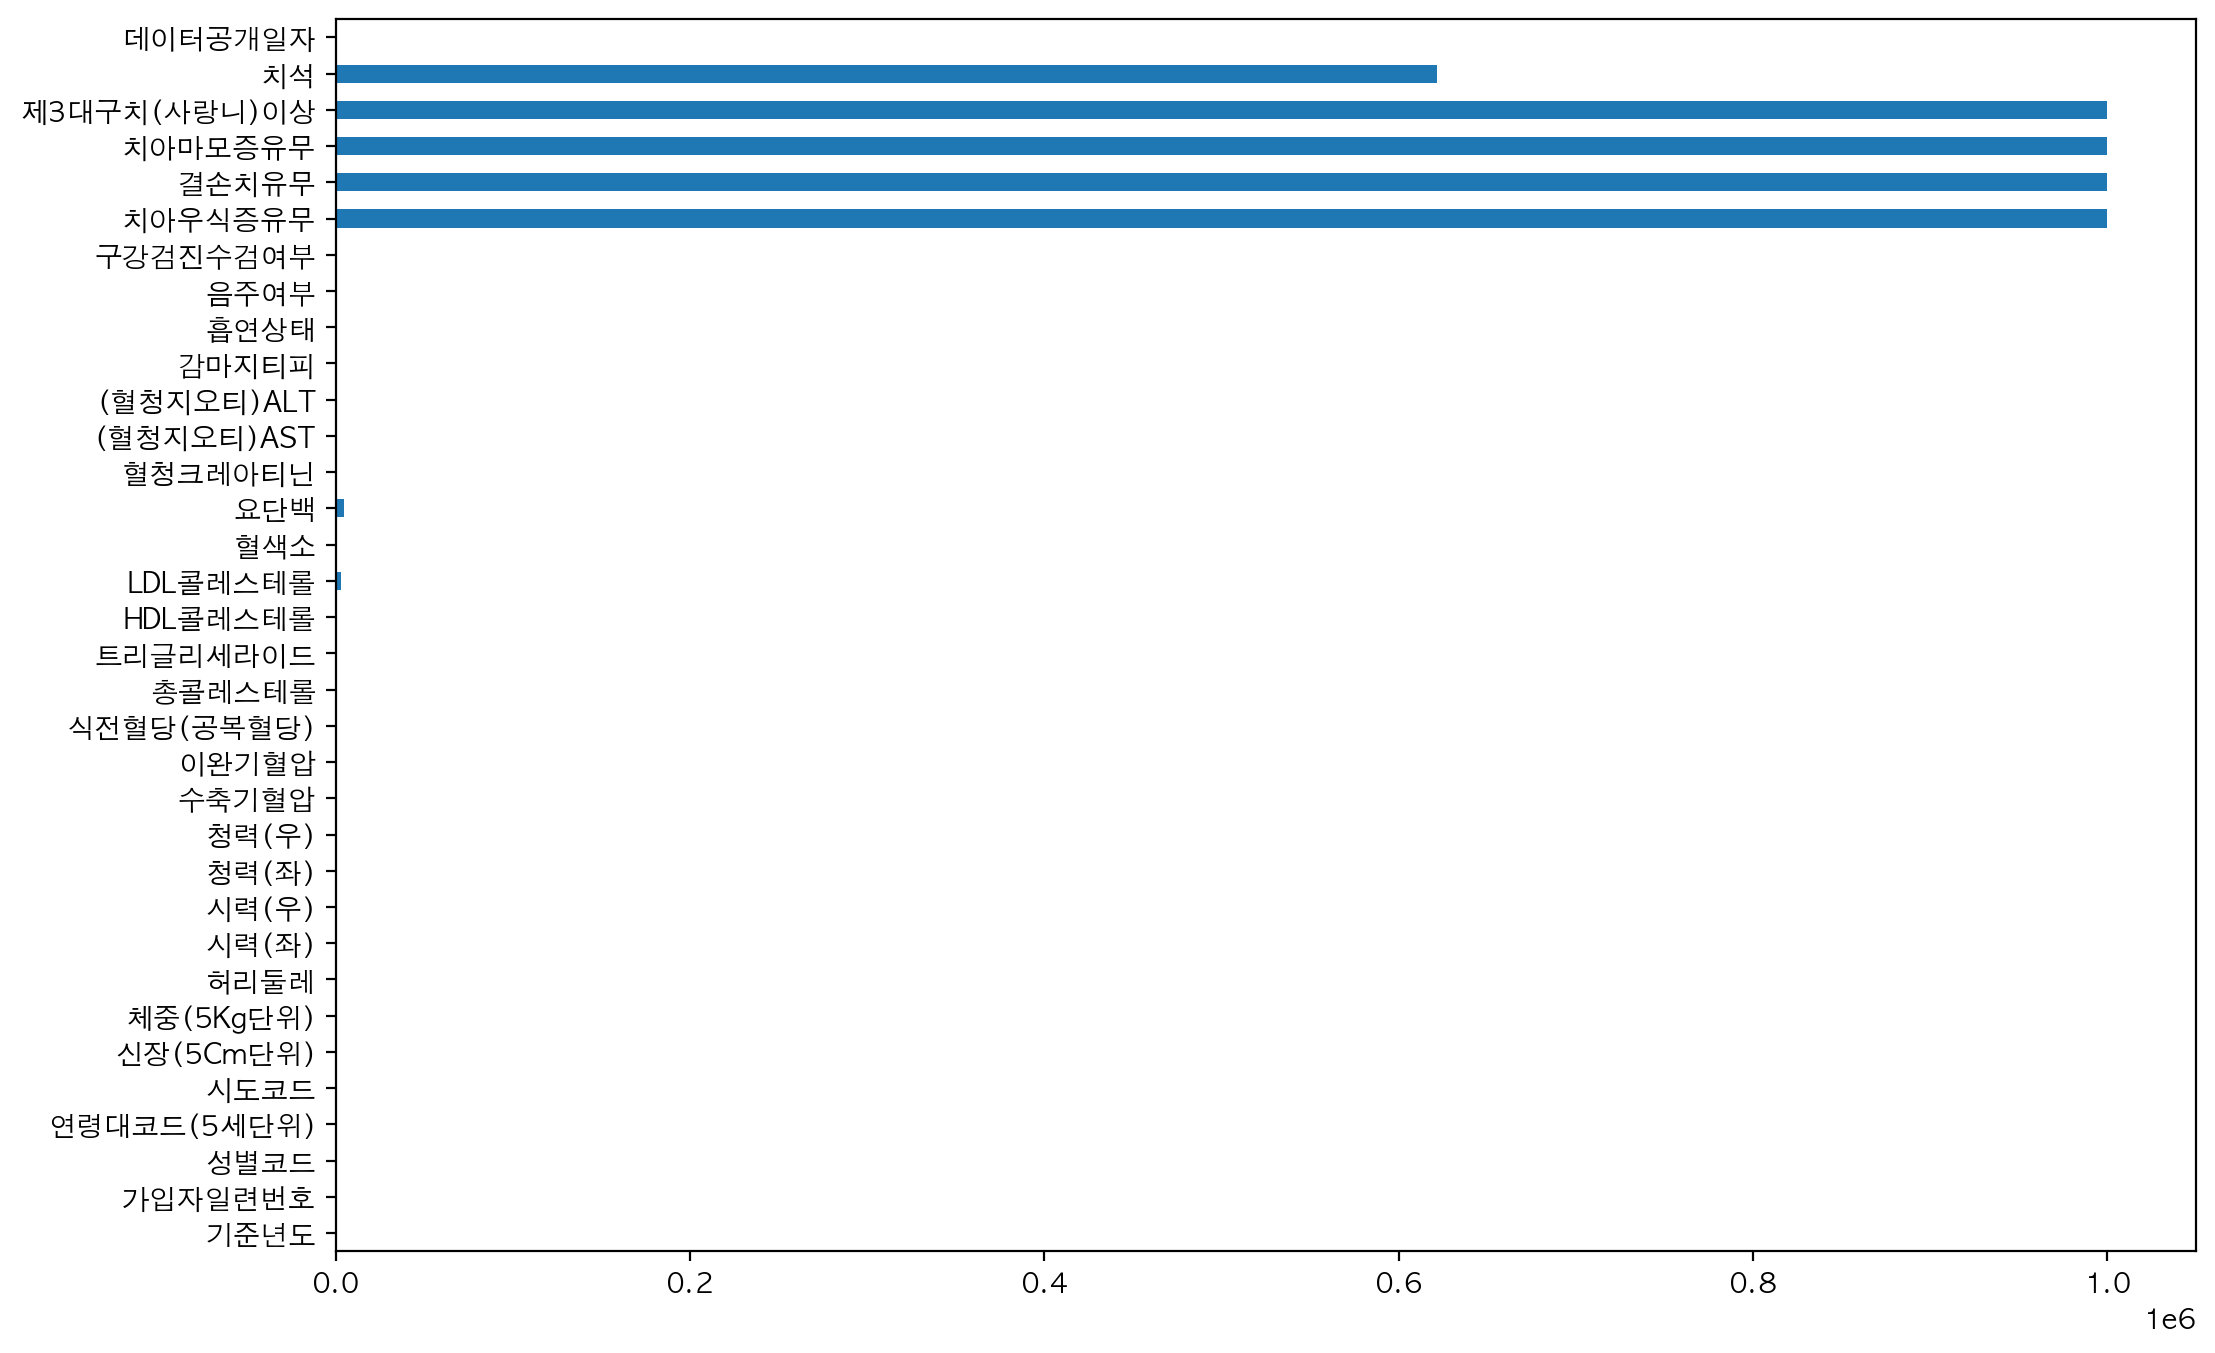

In [15]:
# 판다스에 내장 된 plot을 통해 시각화를 합니다.
df.isna().sum().plot.barh(figsize=(12, 8))

## 8. 일부 데이터 요약하기

In [16]:
# 여러 컬럼을 가져옵니다.
# "(혈청지오티)ALT", "(혈청지오티)AST"를 가져와 미리보기 합니다.
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].head()

(혈청지오티)ALT  (혈청지오티)AST
0        35.0        21.0
1        36.0        20.0
2        32.0        47.0
3        34.0        29.0
4        12.0        19.0

In [17]:
# "(혈청지오티)ALT", "(혈청지오티)AST"를 요약합니다.
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   (혈청지오티)ALT  999958 non-null  float64
 1   (혈청지오티)AST  999959 non-null  float64
dtypes: float64(2)
memory usage: 15.3 MB


In [18]:
# 이상치 확인 가능
df[["(혈청지오티)ALT", "(혈청지오티)AST"]].describe()

(혈청지오티)ALT     (혈청지오티)AST
count  999958.000000  999959.000000
mean       25.749509      25.994671
std        26.294770      23.587469
min         1.000000       1.000000
25%        15.000000      19.000000
50%        20.000000      23.000000
75%        29.000000      28.000000
max      7210.000000    9999.000000

## 9. value_counts로 값 집계하기

In [19]:
# value_counts 를 통해 성별코드로 그룹화 하고 갯수를 집계합니다.
df['성별코드'].value_counts()

성별코드
1    530410
2    469590
Name: count, dtype: int64

In [20]:
# value_counts 를 통해 흡연상태로 그룹화 하고 갯수를 집계합니다.
df['흡연상태'].value_counts()

흡연상태
1.0    607942
3.0    215702
2.0    176212
Name: count, dtype: int64

## 10 groupby와 pivot_table 사용하기

### 10.1 groupby

In [21]:
def str_to_int(x):
    if x == 'N':
        return 0.0
    else:
        return 1.0

In [22]:
# object -> int
df['음주여부'] = df['음주여부'].map(str_to_int)
df['구강검진수검여부'] = df['구강검진수검여부'].map(str_to_int)
df['치석'] = df['치석'].map(str_to_int)

# object -> datetime -> int
df['데이터공개일자'] = pd.to_datetime(df['데이터공개일자']).dt.year
df['데이터공개일자'] = pd.to_numeric(df['데이터공개일자'])

In [23]:
# groupby를 통해 데이터를 그룹화 합니다.
# 성별코드로 그룹화 한 데이터를 세어봅니다.
df.groupby(['성별코드'])['가입자일련번호'].count()

성별코드
1    530410
2    469590
Name: 가입자일련번호, dtype: int64

In [24]:
# 성별코드와 음주여부로 그룹화를 하고 갯수를 세어봅니다.
df.groupby(['성별코드', '음주여부'])['가입자일련번호'].count()

성별코드  음주여부
1     0.0     173612
      1.0     356798
2     0.0     326827
      1.0     142763
Name: 가입자일련번호, dtype: int64

In [25]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 평균을 구합니다.
df.groupby(['성별코드', '음주여부'])['감마지티피'].mean()

성별코드  음주여부
1     0.0     34.739868
      1.0     56.600358
2     0.0     22.612408
      1.0     24.990053
Name: 감마지티피, dtype: float64

In [26]:
# 성별코드와 음주여부로 그룹화를 하고 감마지티피의 요약수치를 구합니다.
df.groupby(['성별코드', '음주여부'])['감마지티피'].describe()

count       mean        std  min   25%   50%   75%    max
성별코드 음주여부                                                              
1    0.0   173604.0  34.739868  37.606197  1.0  18.0  25.0  38.0  999.0
     1.0   356787.0  56.600358  68.849145  1.0  24.0  37.0  63.0  999.0
2    0.0   326813.0  22.612408  25.203579  1.0  13.0  17.0  24.0  999.0
     1.0   142754.0  24.990053  36.693011  1.0  13.0  17.0  25.0  999.0

In [27]:
# agg을 사용하면 여러 수치를 함께 구할 수 있습니다.
df.groupby(['성별코드', '음주여부'])['감마지티피'].agg(['count', 'mean', 'median','std', 'min','max'])

count       mean  median        std  min    max
성별코드 음주여부                                                  
1    0.0   173604  34.739868    25.0  37.606197  1.0  999.0
     1.0   356787  56.600358    37.0  68.849145  1.0  999.0
2    0.0   326813  22.612408    17.0  25.203579  1.0  999.0
     1.0   142754  24.990053    17.0  36.693011  1.0  999.0

### 10.2 pivot_table
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html

In [28]:
# 음주여부에 따른 그룹화된 수를 피봇테이블로 구합니다.
# pivot : 연산을 사용하지 않고 쓰려고 할 때 사용
# pivot_table : 연산 사용
df.pivot_table(index='음주여부', values='가입자일련번호', aggfunc='count')

가입자일련번호
음주여부         
0.0    500439
1.0    499561

In [29]:
# 음주여부에 따른 감마지티피의 평균을 구합니다.
pd.pivot_table(df, index='음주여부', values='감마지티피')

감마지티피
음주여부           
0.0   26.819650
1.0   47.567071

In [30]:
# 기본값은 평균을 구하지만 aggfunc을 통해 지정해 줄 수도 있습니다.
pd.pivot_table(df, index='음주여부', values='감마지티피', aggfunc='mean')

감마지티피
음주여부           
0.0   26.819650
1.0   47.567071

In [31]:
# aggfunc에 여러 값을 한번에 지정할 수도 있습니다.
pd.pivot_table(df, index='음주여부', values='감마지티피', aggfunc=['mean', 'median', 'min', 'max'])

mean median   min    max
          감마지티피  감마지티피 감마지티피  감마지티피
음주여부                               
0.0   26.819650   19.0   1.0  999.0
1.0   47.567071   29.0   1.0  999.0

In [32]:
# aggfunc에 describe를 사용해 통계요약값을 한번에 볼 수도 있습니다.
pd.pivot_table(df, index='음주여부', values='감마지티피', aggfunc='describe')

25%   50%   75%     count    max       mean  min        std
음주여부                                                              
0.0   14.0  19.0  29.0  500417.0  999.0  26.819650  1.0  30.639714
1.0   18.0  29.0  52.0  499541.0  999.0  47.567071  1.0  63.041970

In [33]:
# 성별코드, 음주여부에 따른 감마지티피에 값의 평균을 구합니다.
pd.pivot_table(df, index=['성별코드','음주여부'], values='감마지티피')

감마지티피
성별코드 음주여부           
1    0.0   34.739868
     1.0   56.600358
2    0.0   22.612408
     1.0   24.990053

## 11. 전체 데이터 시각화 하기
- 100만개가 넘는 데이터를 시각화할 때는 되도록이면 groupby 혹은 pivot_table로 연산을 하고 시각화를 하는 것을 권장합니다.
- 100만개가 넘는 데이터를 seaborn과 같은 고급 통계 연산을하는 그래프를 사용하게 되면 많이 느릴 수 있습니다.

### 11.1 히스토그램
- 판다스의 info 기능을 통해 대부분 수치 데이터로 이루어 진것을 확인할 수 있습니다.
- 히스토그램을 사용하면 수치데이터를 bin의 갯수만큼 그룹화 해서 도수분포표를 만들고 그 결과를 시각화합니다.
- 이 데이터에는 수치데이터가 많기 때문에 판다스의 hist를 사용해서 히스토그램을 그립니다.

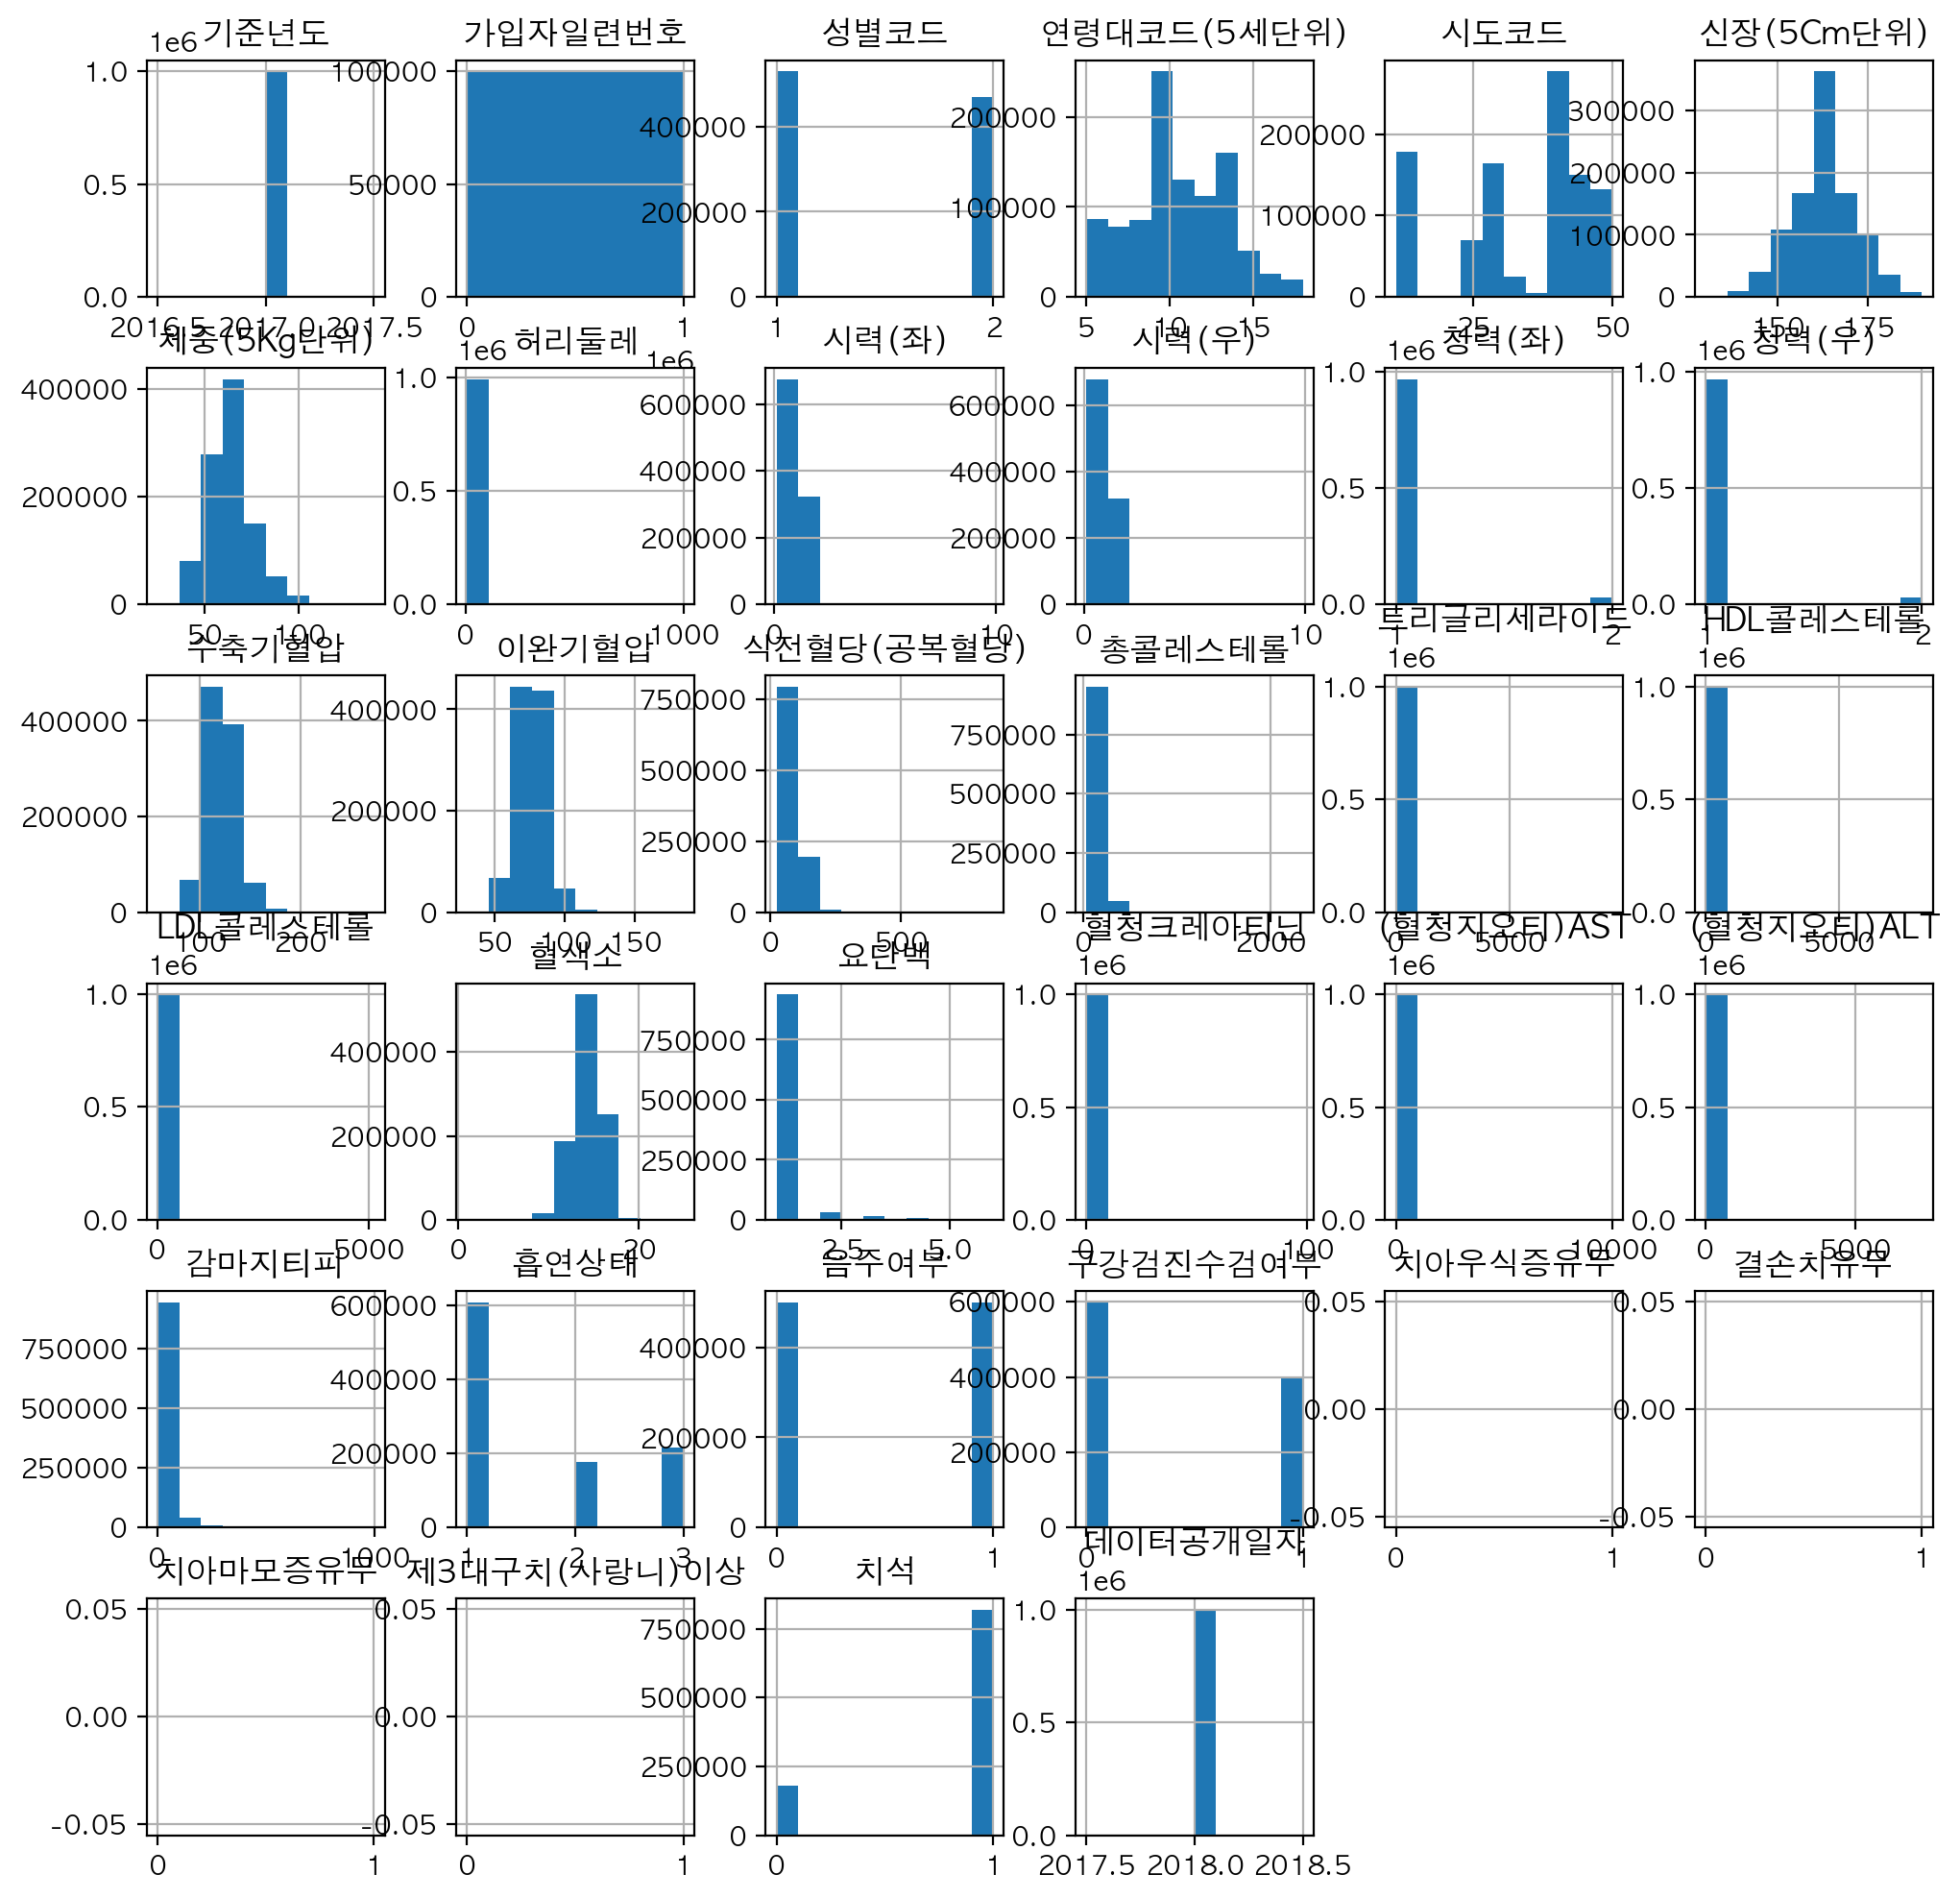

In [34]:
# 전체 데이터에 대한 히스토그램을 출력합니다.
h = df.hist(figsize=(12, 12))
h;

### 11.2 슬라이싱을 사용해 히스토그램 그리기
- 슬라이싱 기능을 사용해서 데이터를 나누어 그립니다.
- 슬라이싱 사용시 iloc를 활용하면 인덱스의 순서대로 슬라이싱이 가능합니다.
- iloc[행, 열] 순으로 인덱스를 써주면 해당 인덱스만 불러오며, 전체 데이터를 가져오고자 할 때는 [:, :]을 사용합니다.
- 슬라이싱을 해주는 대괄호 안의 콜론 앞뒤에 숫자를 써주게 되면 해당 시작인데스:끝나는인덱스(+1)를 지정할 수 있습니다.

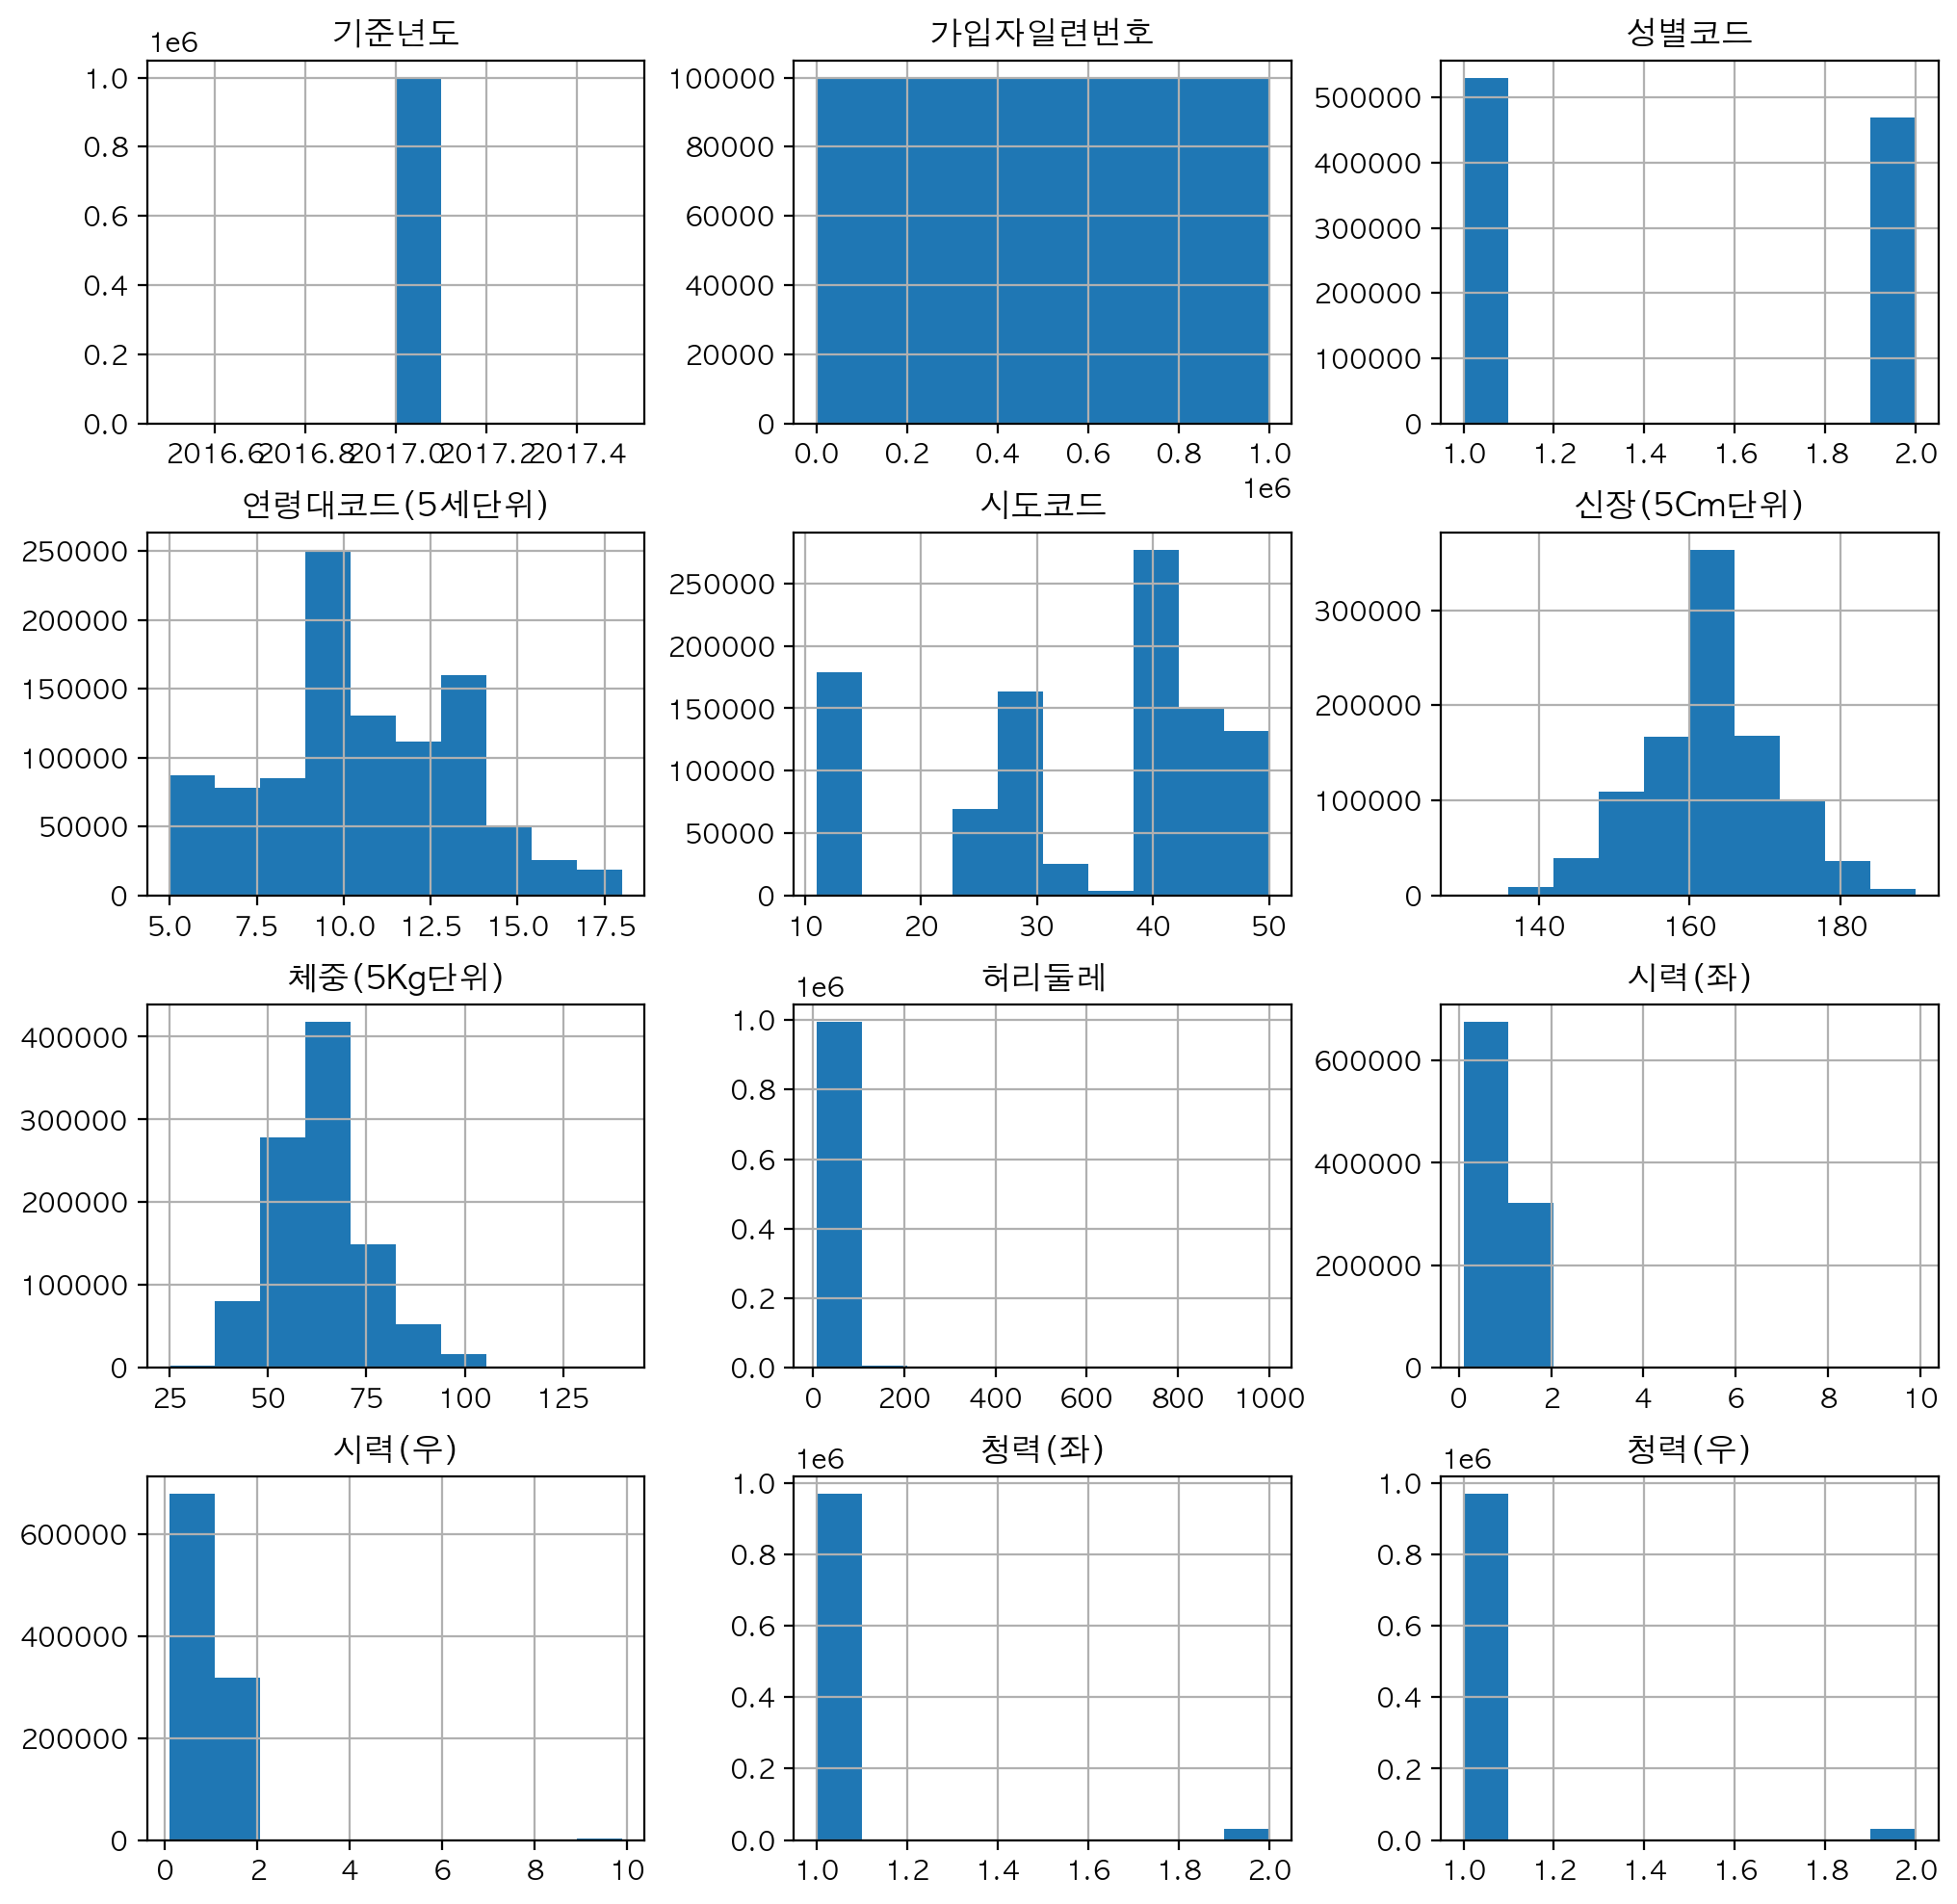

In [35]:
# 슬라이싱을 사용해 앞에서 12개 컬럼에 대한 데이터로 히스토그램을 그립니다.
# [행, 열]
h = df.iloc[:, :12].hist(figsize=(12, 12))

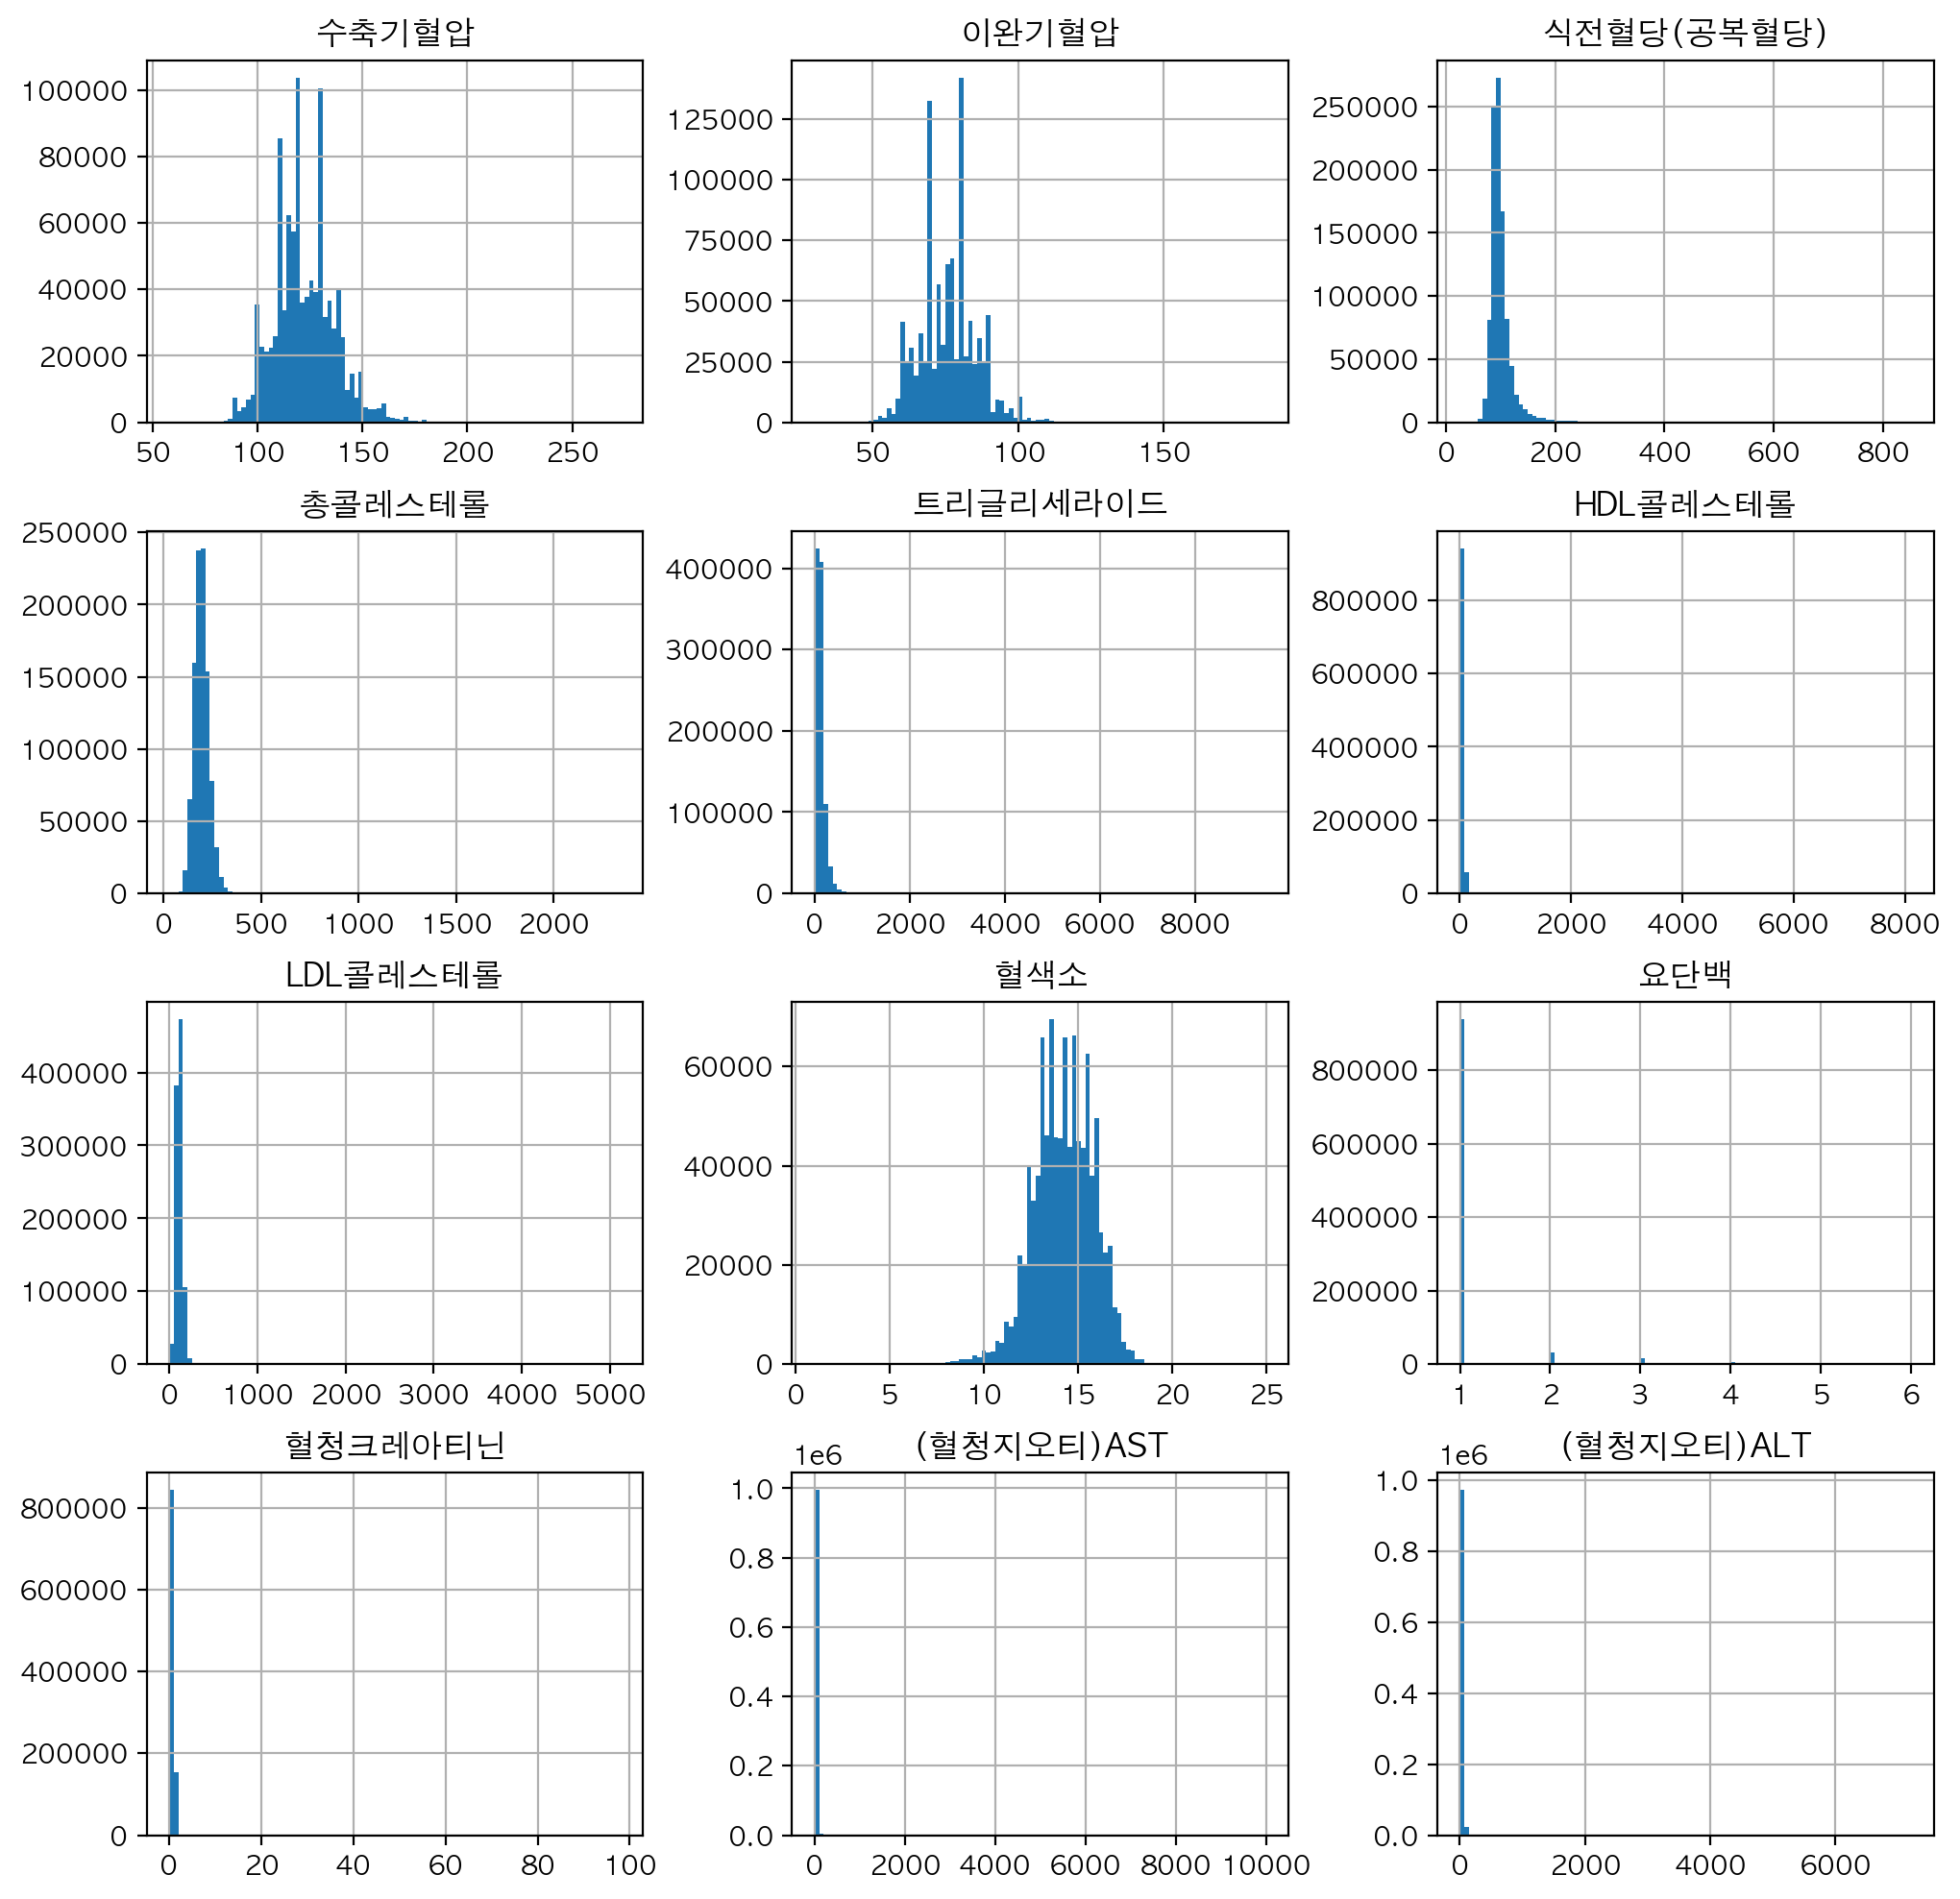

In [36]:
# 슬라이싱을 사용해 앞에서 12번째부터 23번째까지(12:24) 컬럼에 대한 데이터로 히스토그램을 그립니다.
h = df.iloc[:, 12:24].hist(figsize=(12, 12), bins=100)

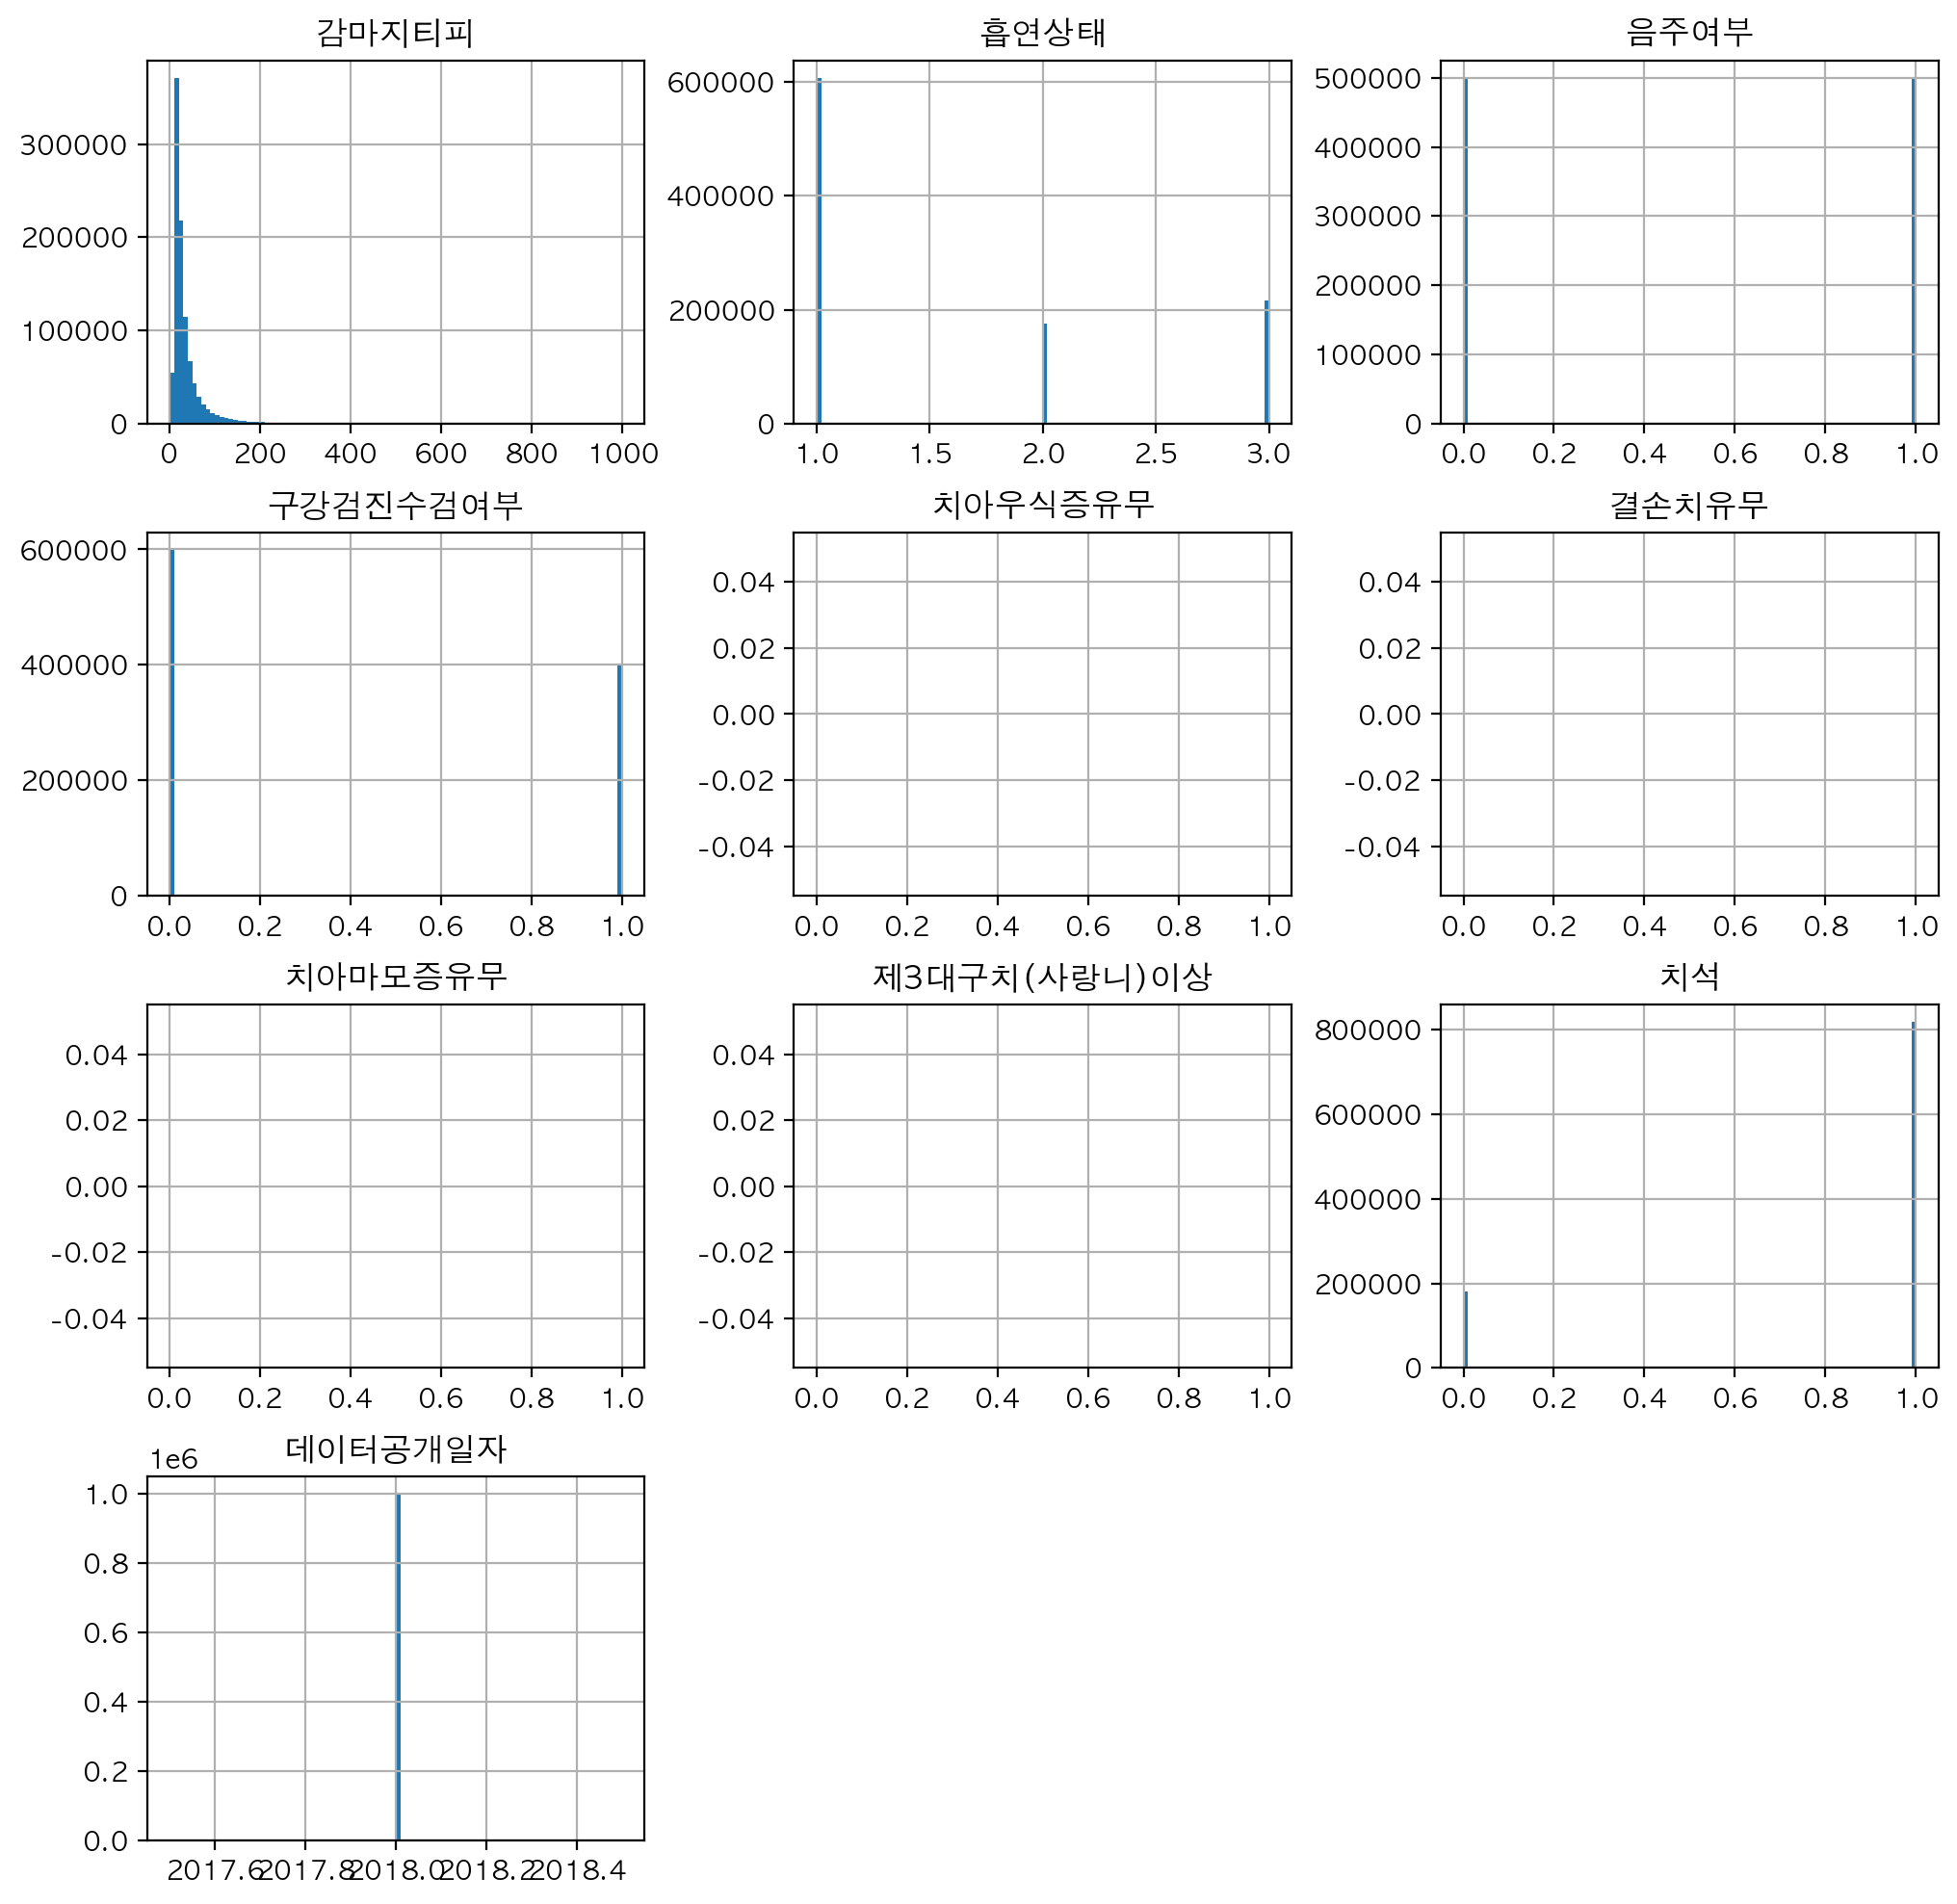

In [37]:
# 슬라이싱을 사용해 앞에서 24번째부터 마지막까지(24:) 컬럼에 대한 데이터로 히스토그램을 그립니다.
h = df.iloc[:, 24:].hist(figsize=(12, 12), bins=100)

## 12. 샘플데이터 추출하기
- seaborn의 그래프는 내부에서 수학적 연산이 되기 때문에 데이터가 많으면 속도가 오래걸립니다.
- 따라서 전체 데이터를 사용하면 너무 느리기 때문에 일부만 샘플링해서 사용합니다.

In [38]:
# df.sample을 통해 일부 데이터만 샘플데이터를 추출합니다.
# random_state를 사용해 샘플링되는 값을 고정할 수 있습니다.
# 실험을 통제하기 위해 random_state를 고정하기도 합니다.
# 여기에서는 1을 사용하겠습니다. 이 값은 높든 낮든 상관 없이 값을 고정시키는 역할만 합니다.
df_sample = df.sample(1000, random_state=1)
df_sample.shape

(1000, 34)

## 13. 데이터 시각화 도구 seaborn 사용하기
- https://seaborn.pydata.rog/
- seaborn은 https://matplotlib.org/ 을 사용하기 쉽게 만들어 졌으며, 간단하게 고급 통계 연산을 할 수 있습니다.

## 14. 범주형(카테고리) 데이터 시각화
- countplot은 범주형 데이터의 수를 더한 값을 그래프로 표현합니다.
- value_counts로 구한 값을 시각화 한다고 보면 됩니다.

### 14.1 countplot - 음주여부

<Axes: xlabel='음주여부'>

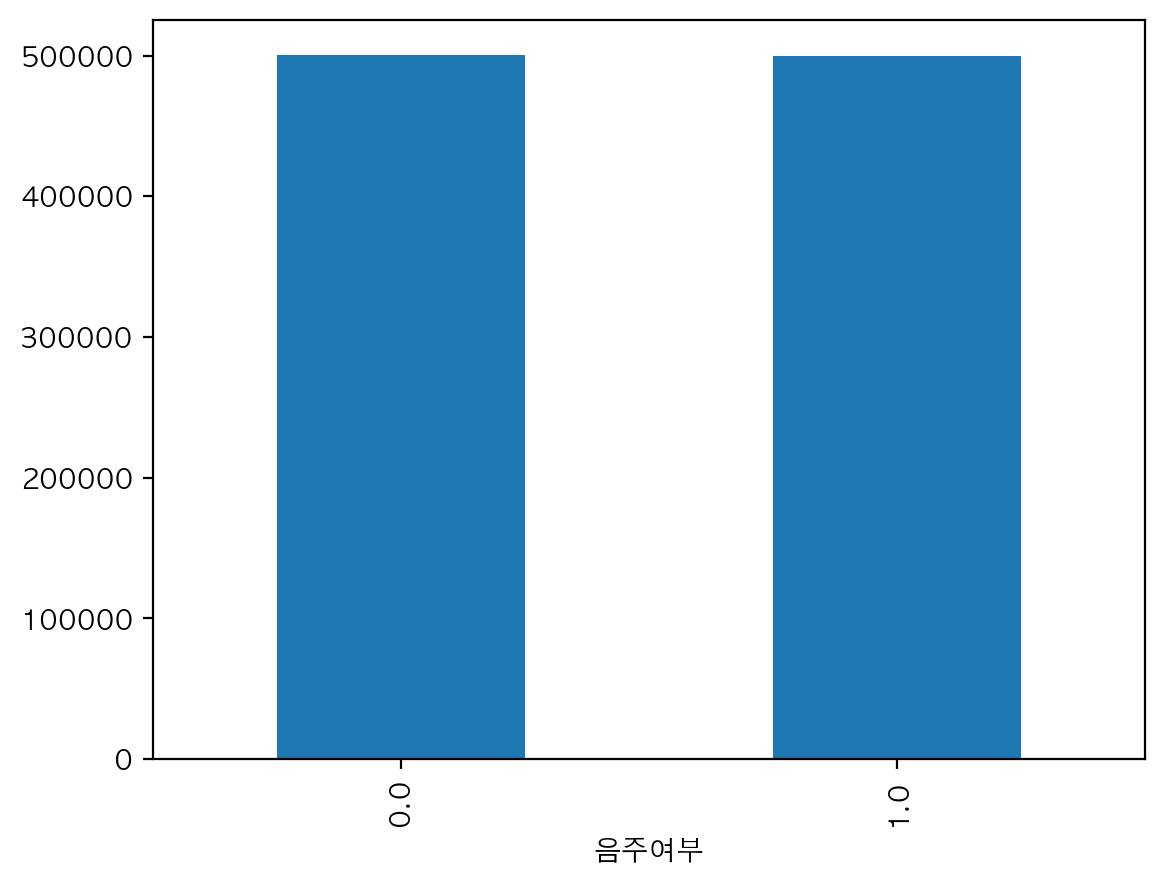

In [39]:
# 음주여부에 따른 countplot을 그립니다.
df['음주여부'].value_counts(normalize=False).plot.bar()

<Axes: xlabel='흡연상태', ylabel='count'>

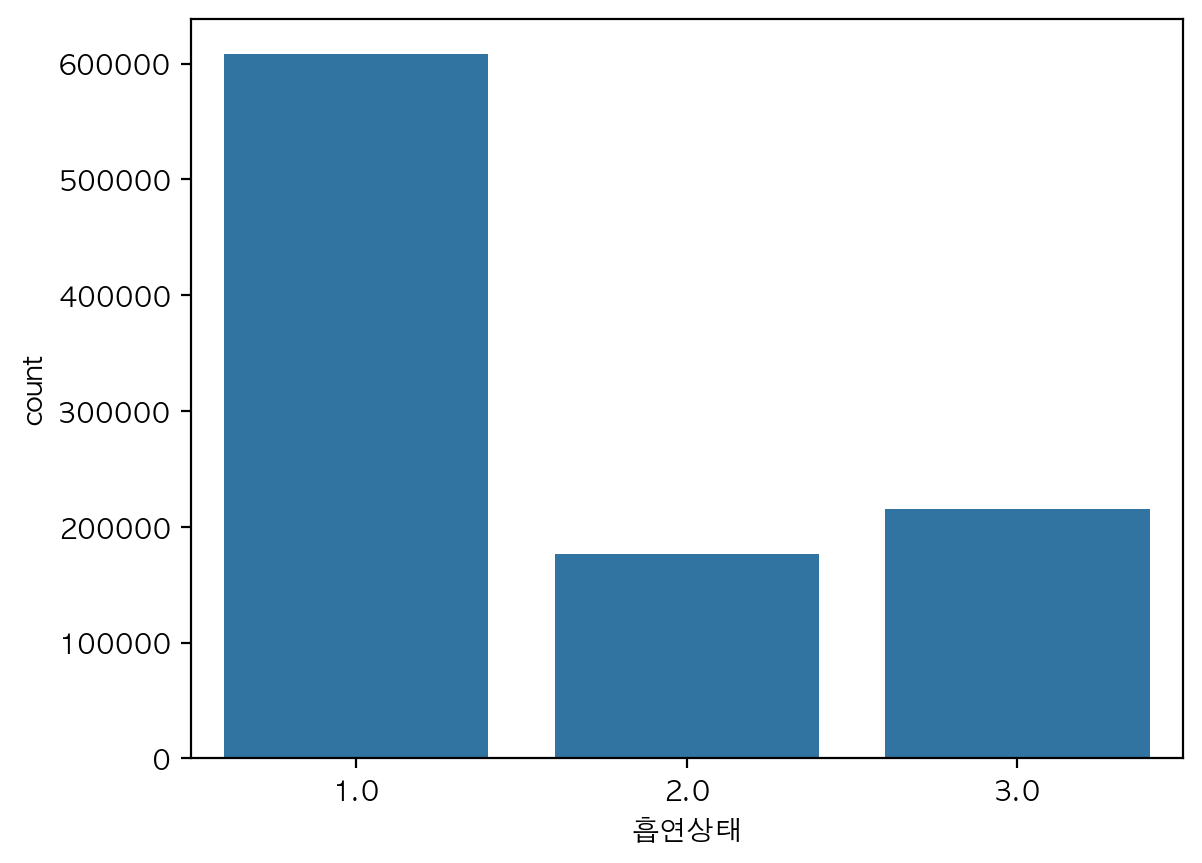

In [40]:
sns.countplot(data=df, x='흡연상태', )

### 14.2 hue 옵션 사용하기

<Axes: xlabel='음주여부', ylabel='count'>

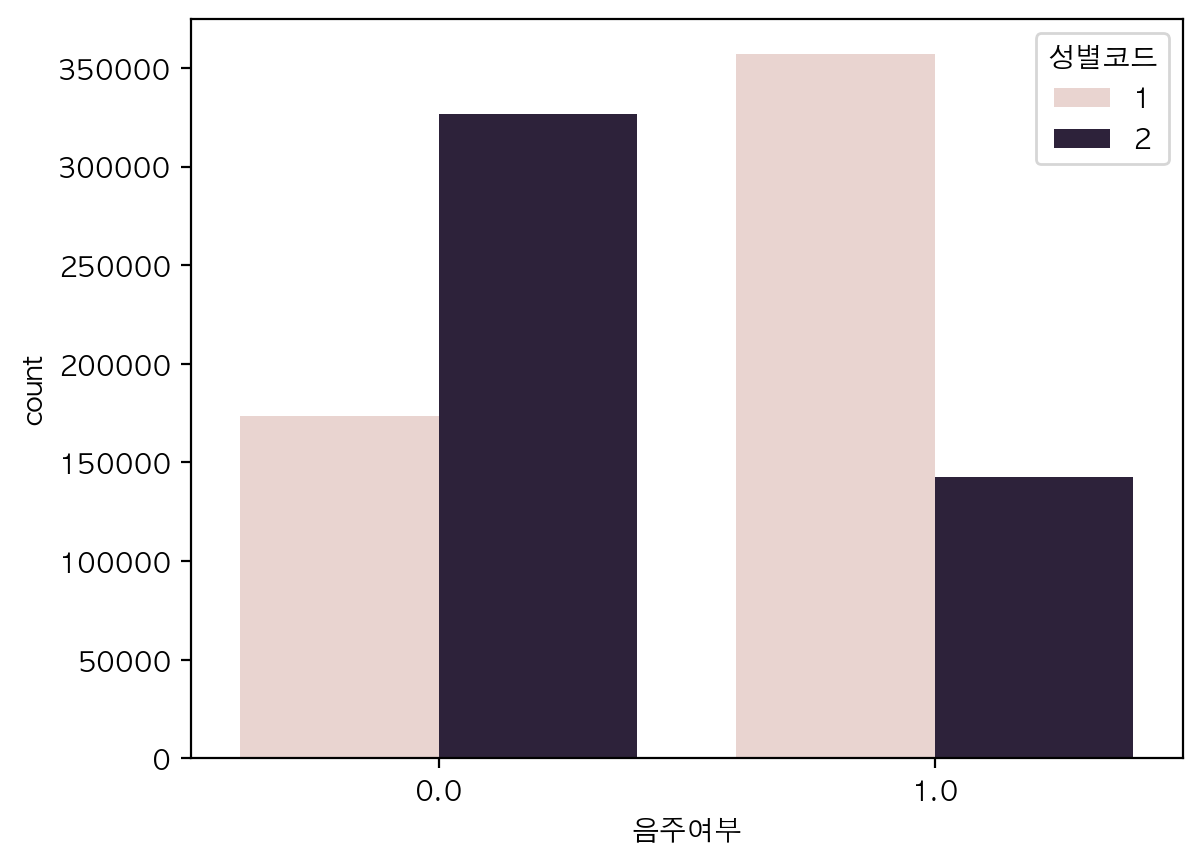

In [41]:
# 음주여부에 따른 countplot을 그리고 hue를 사용해 성별코드로 색상을 구분해 그립니다.
# 여기에서 hue는 포토샵에 있는 hue 메뉴를 떠올리면 됩니다. 색상을 의미합니다.
# 또, seaborn에서 제공하는 폰트 설정을 사용하실 수도 있습니다.
# 다만, 이 때 seaborn의 기본 스타일이 적용되는 것을 확인해 주시는 것이 좋습니다.
# Mac
# sns.set(font_scale=1.5, font='AppleGothic')
# Window
# sns.set(font_scale=1.5, font='Malgun Gothic')
sns.countplot(data=df, x='음주여부', hue='성별코드')

<Axes: xlabel='연령대코드(5세단위)', ylabel='count'>

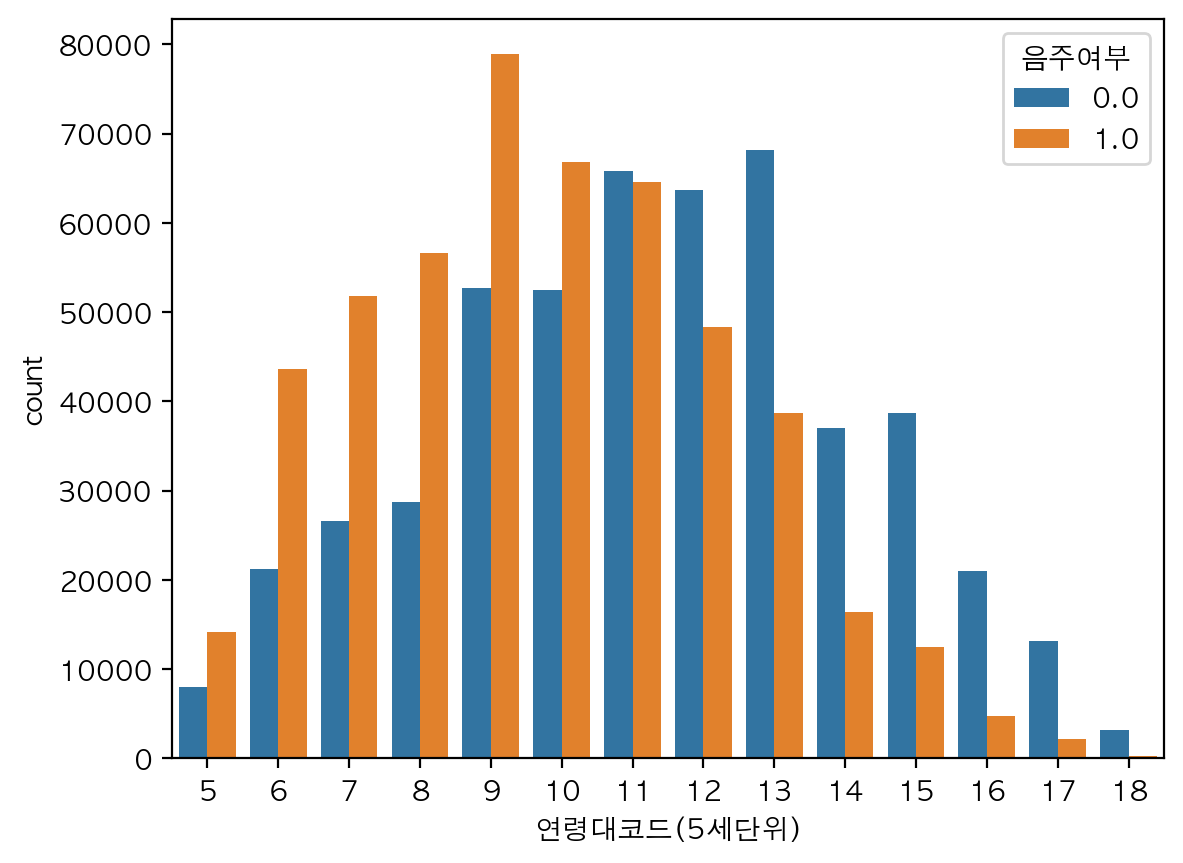

In [42]:
# countplot으로 연령대별 음주여부를 봅니다.
# hue를 사용해 다른 색상으로 표현합니다.
sns.countplot(data=df, x='연령대코드(5세단위)', hue='음주여부')

### 14.3 countplot - 키와 몸무게
- 키와 몸무게는 연속형 데이터라고 볼 수 있습니다.
- 하지만 이 데이터는 키는 5cm, 체중은 5kg 단위로 되어 있습니다.
- 이렇게 특정 범위로 묶게 되면 연속형 데이터라기 보다는 범주형 데이터라고 볼 수 있습니다.

<Axes: xlabel='신장(5Cm단위)', ylabel='count'>

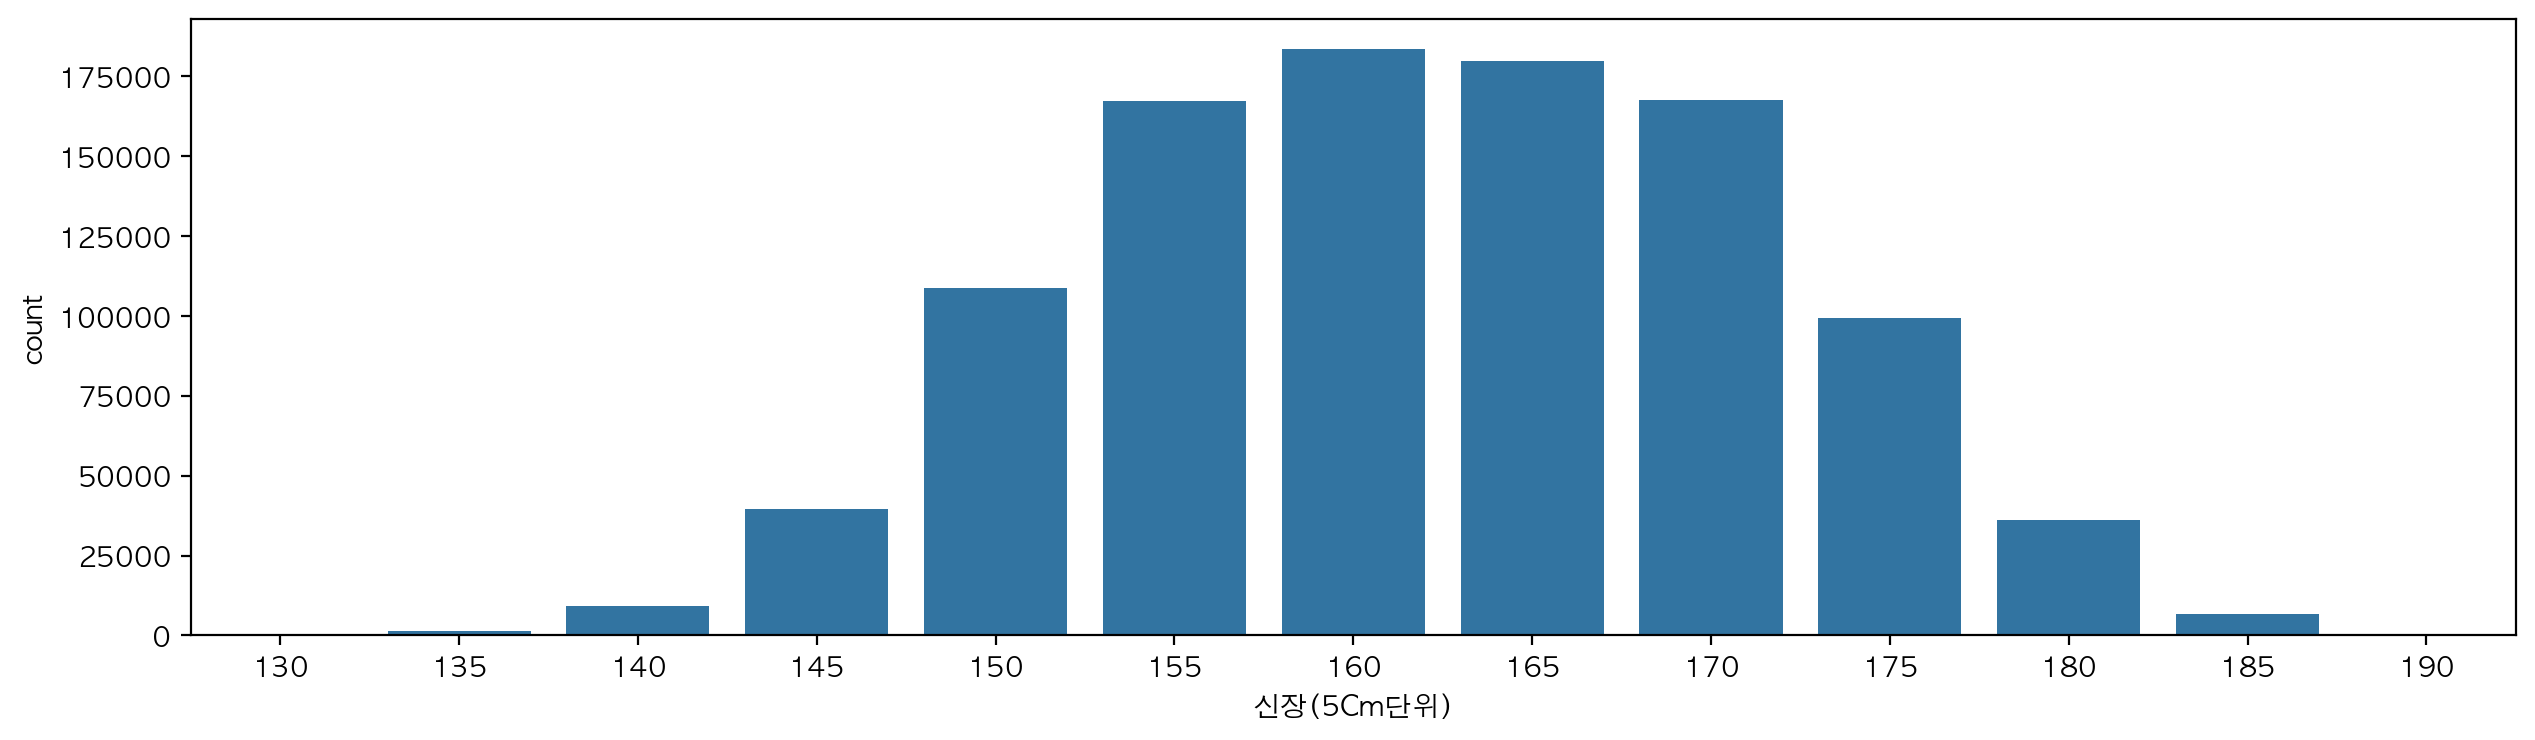

In [43]:
# countplot으로 키를 봅니다.
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='신장(5Cm단위)')

<Axes: xlabel='체중(5Kg단위)', ylabel='count'>

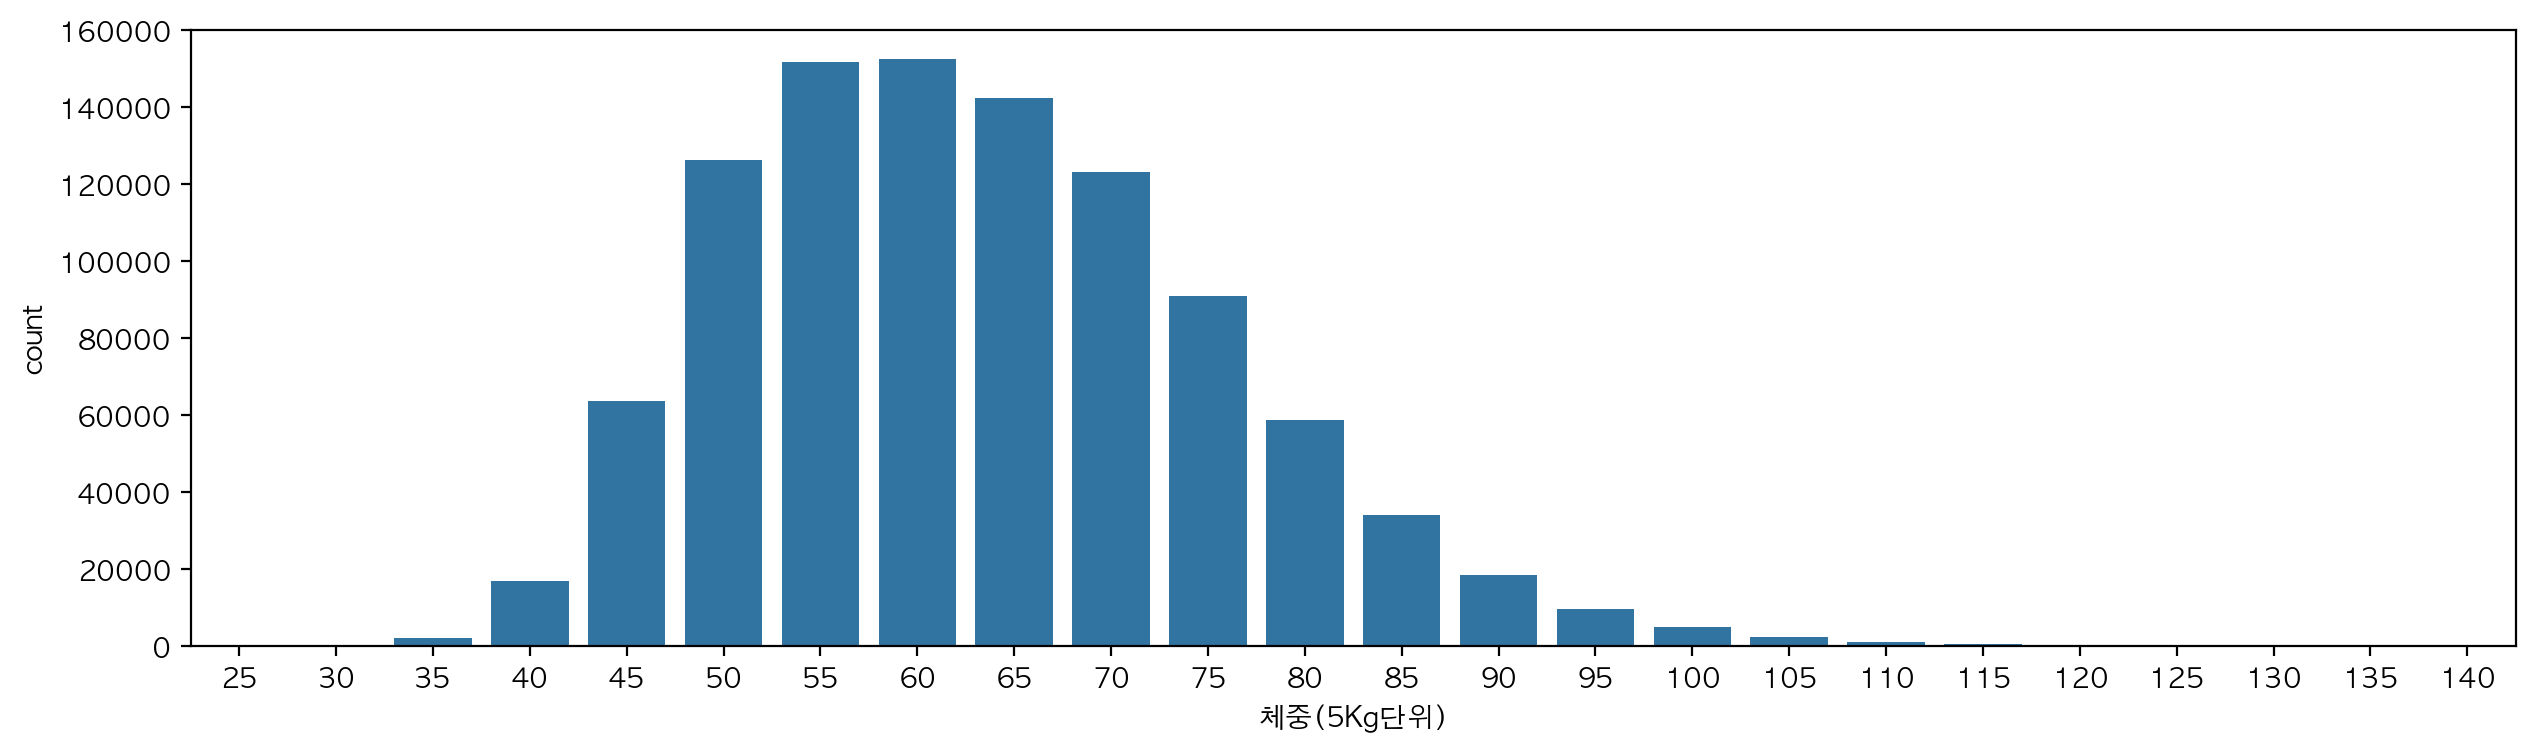

In [44]:
# countplot으로 체중을 봅니다.
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='체중(5Kg단위)')

<Axes: xlabel='신장(5Cm단위)', ylabel='count'>

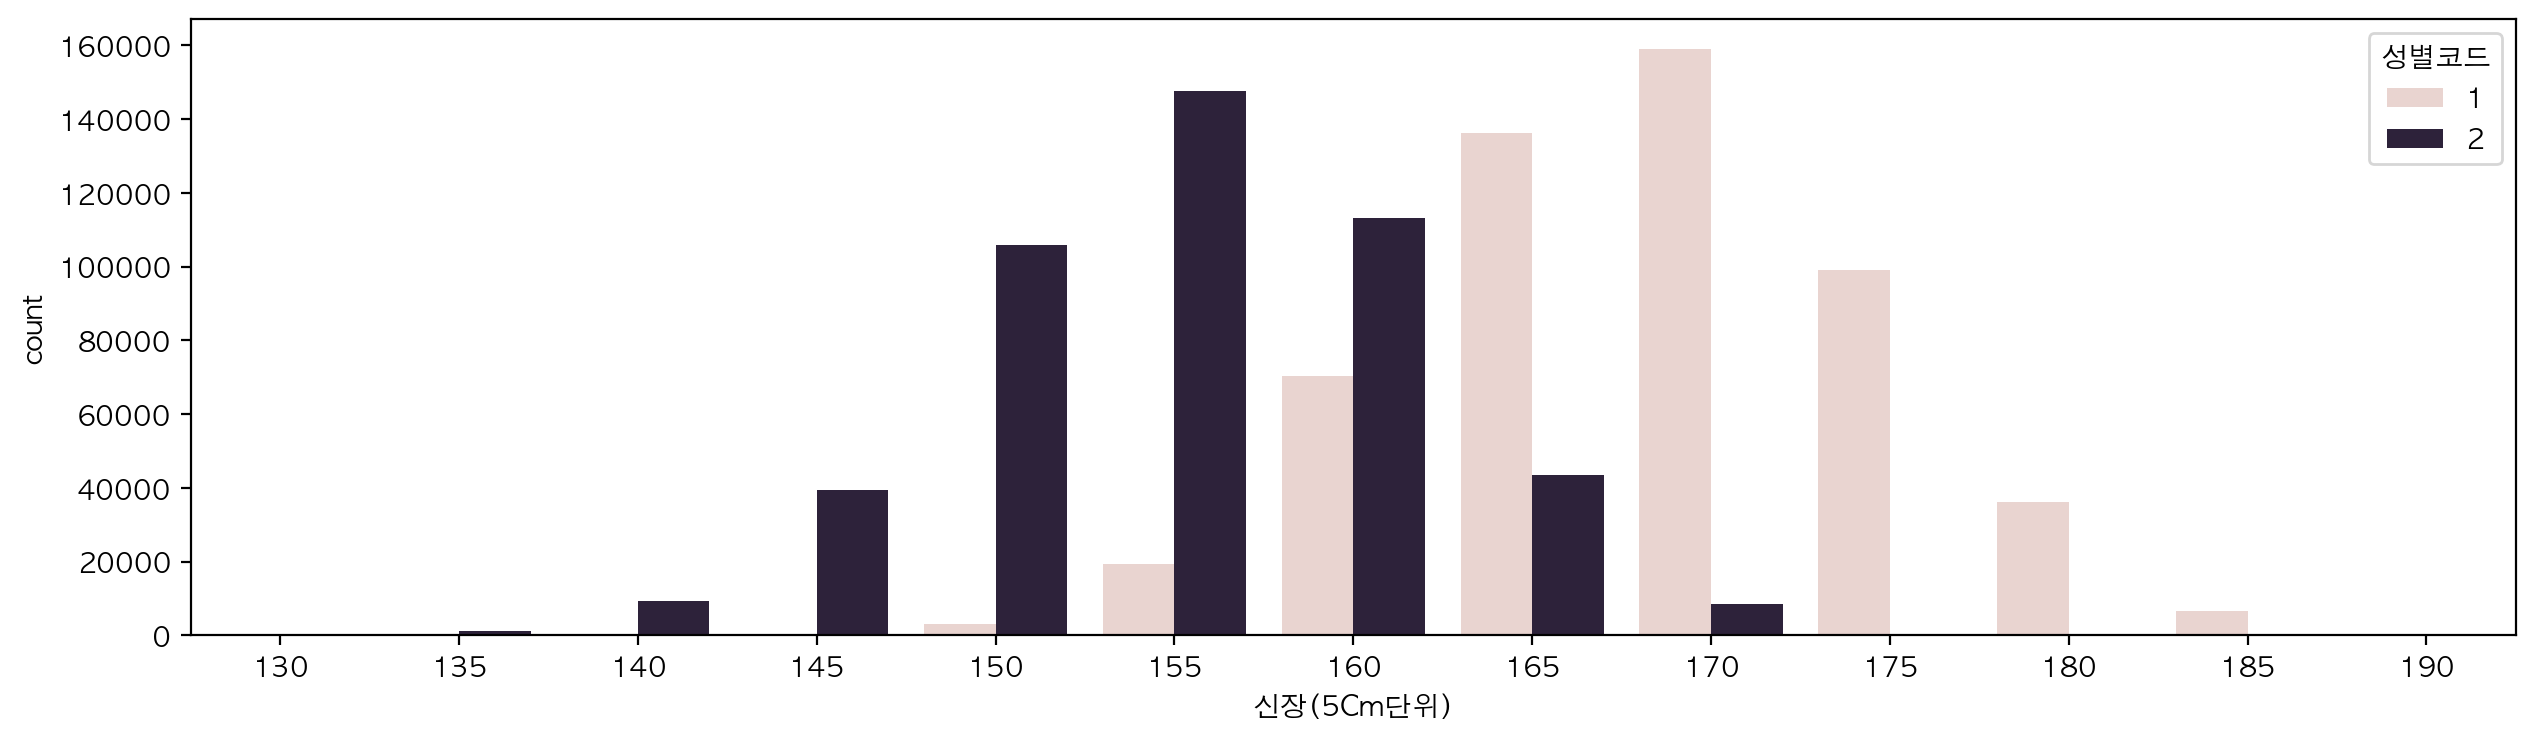

In [45]:
# countplot으로 신장(5Cm단위)를 봅니다.
# 성별에 따른 키의 차이를 봅니다.
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='신장(5Cm단위)', hue='성별코드')

<Axes: xlabel='체중(5Kg단위)', ylabel='count'>

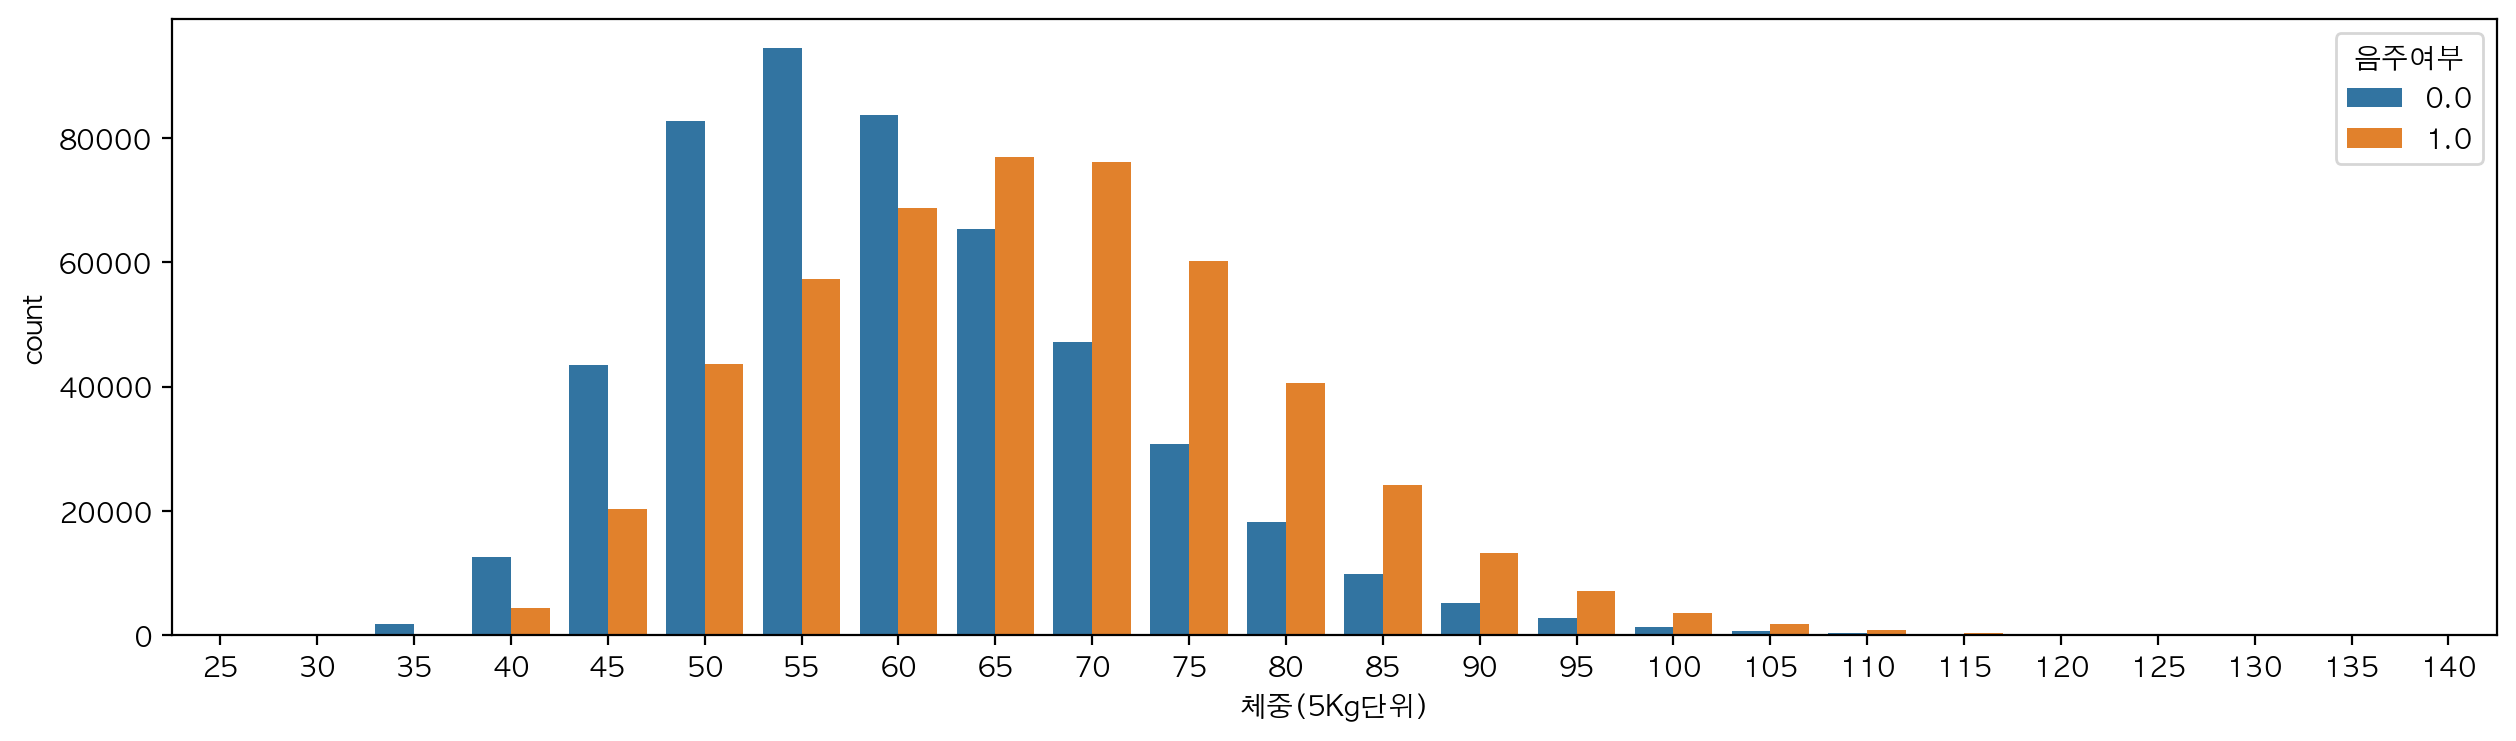

In [46]:
# 성별에 따른 체중의 차이를 봅니다.
plt.figure(figsize=(15, 4))
sns.countplot(data=df, x='체중(5Kg단위)', hue='음주여부')

### 14.4 barplot - 수치형 vs 범주형 데이터 시각화

<Axes: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

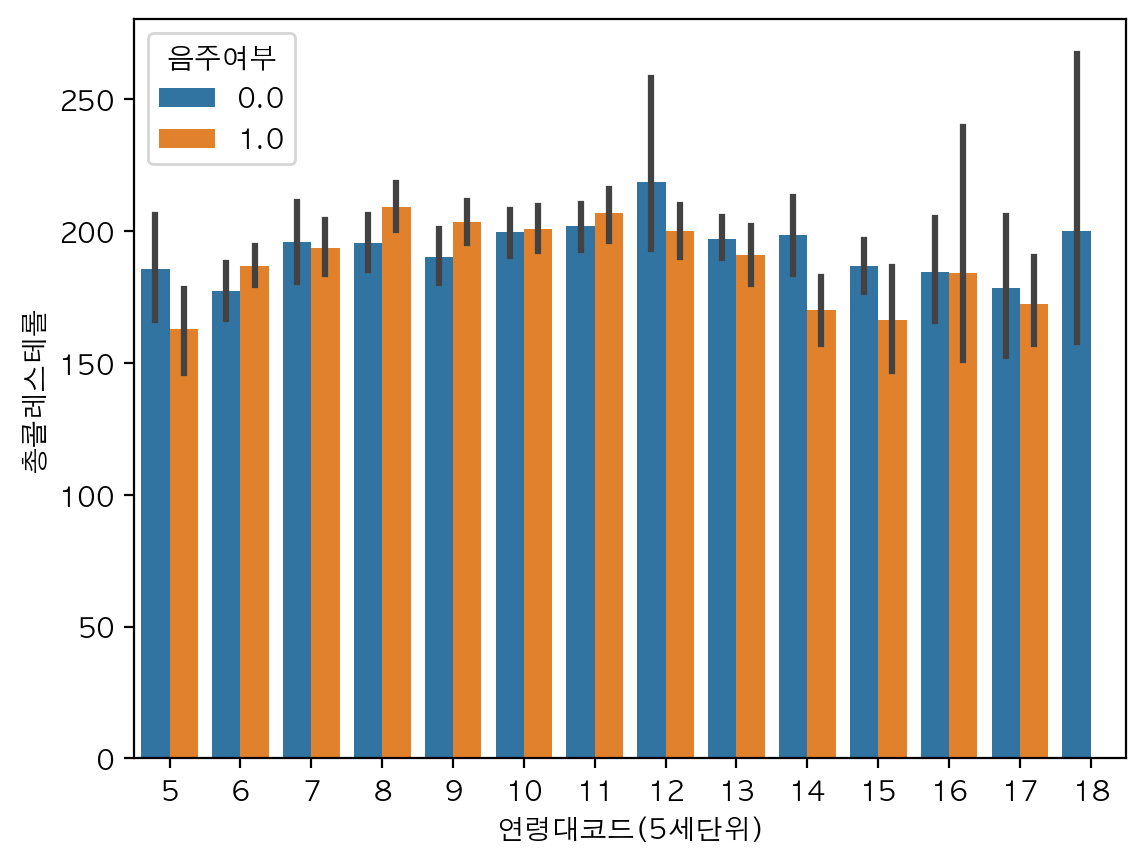

In [47]:
# 연령대코드와 총 콜레스테롤을 봅니다.
# hue로 색상을 다르게 표현할 수 있습니다. 음주여부를 함께 봅니다.
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='총콜레스테롤', estimator='mean', hue='음주여부')

<Axes: xlabel='연령대코드(5세단위)', ylabel='총콜레스테롤'>

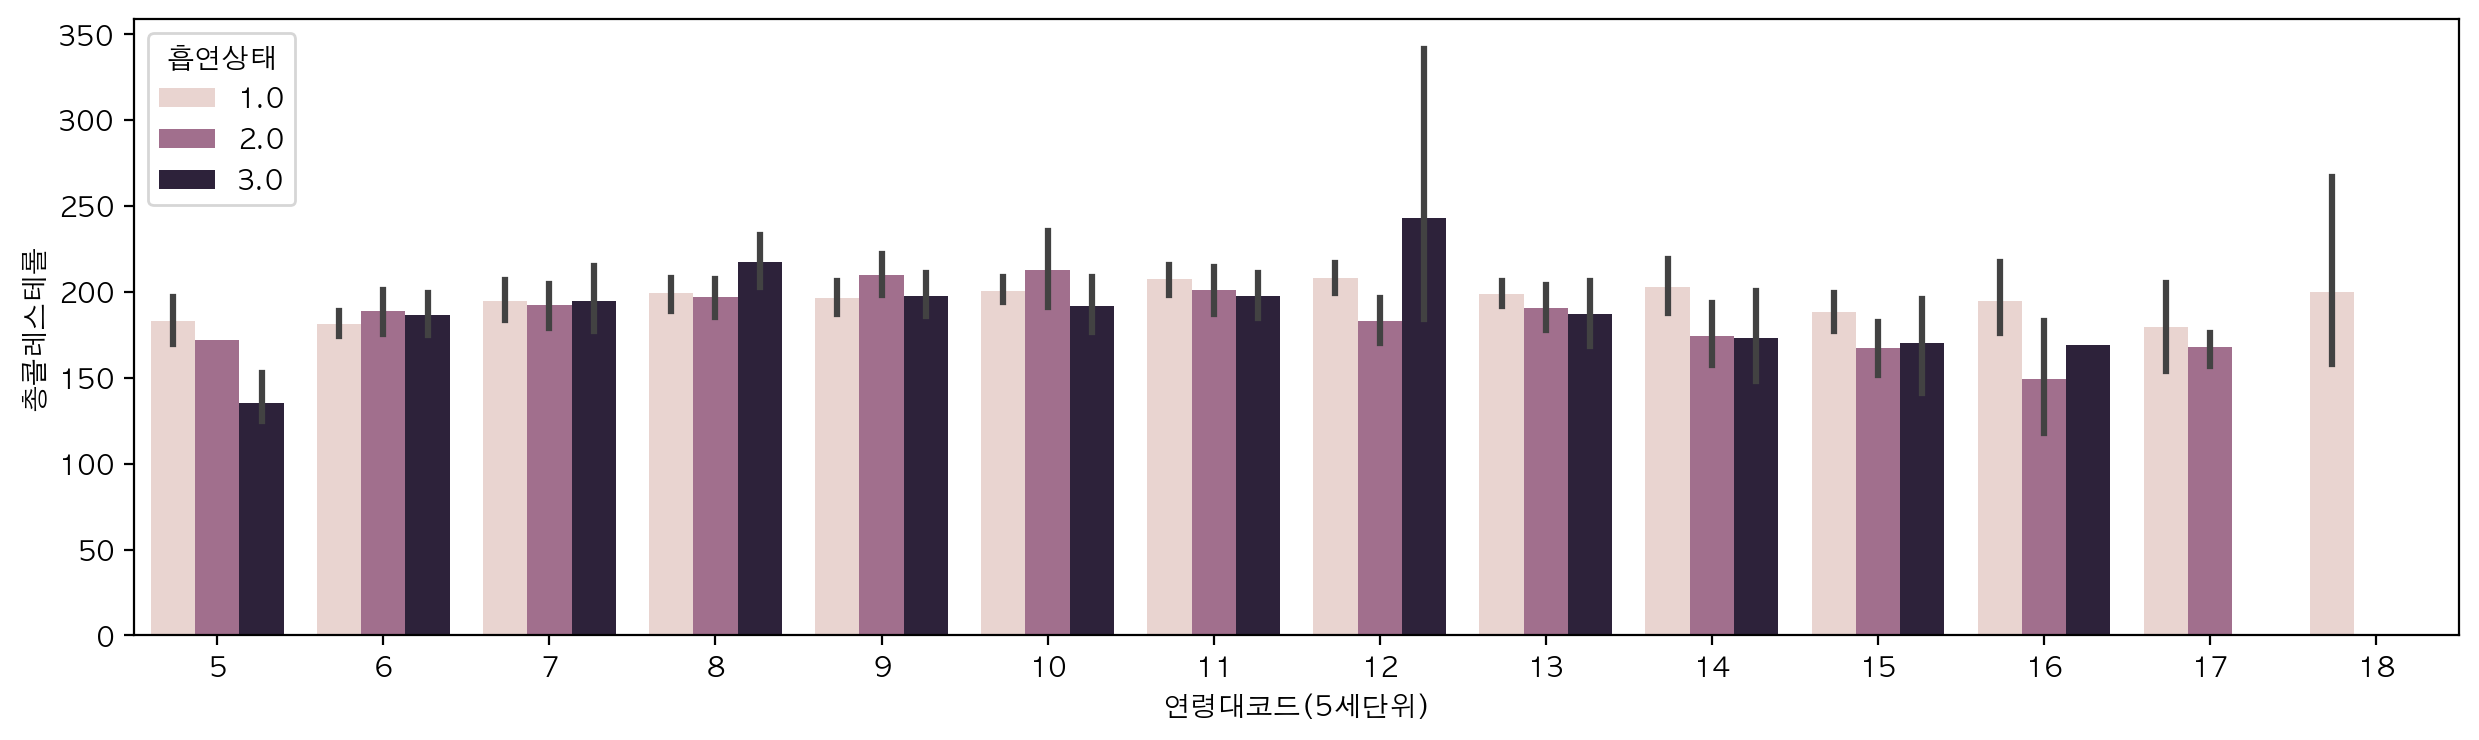

In [48]:
# 연령대코드와 총 콜레스테롤을 봅니다.
# 콜레스테롤과 연령대코드(5세단위)를 흡연상태에 따라 barplot으로 그립니다.
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='총콜레스테롤', estimator='mean', hue='흡연상태')

<Axes: xlabel='연령대코드(5세단위)', ylabel='트리글리세라이드'>

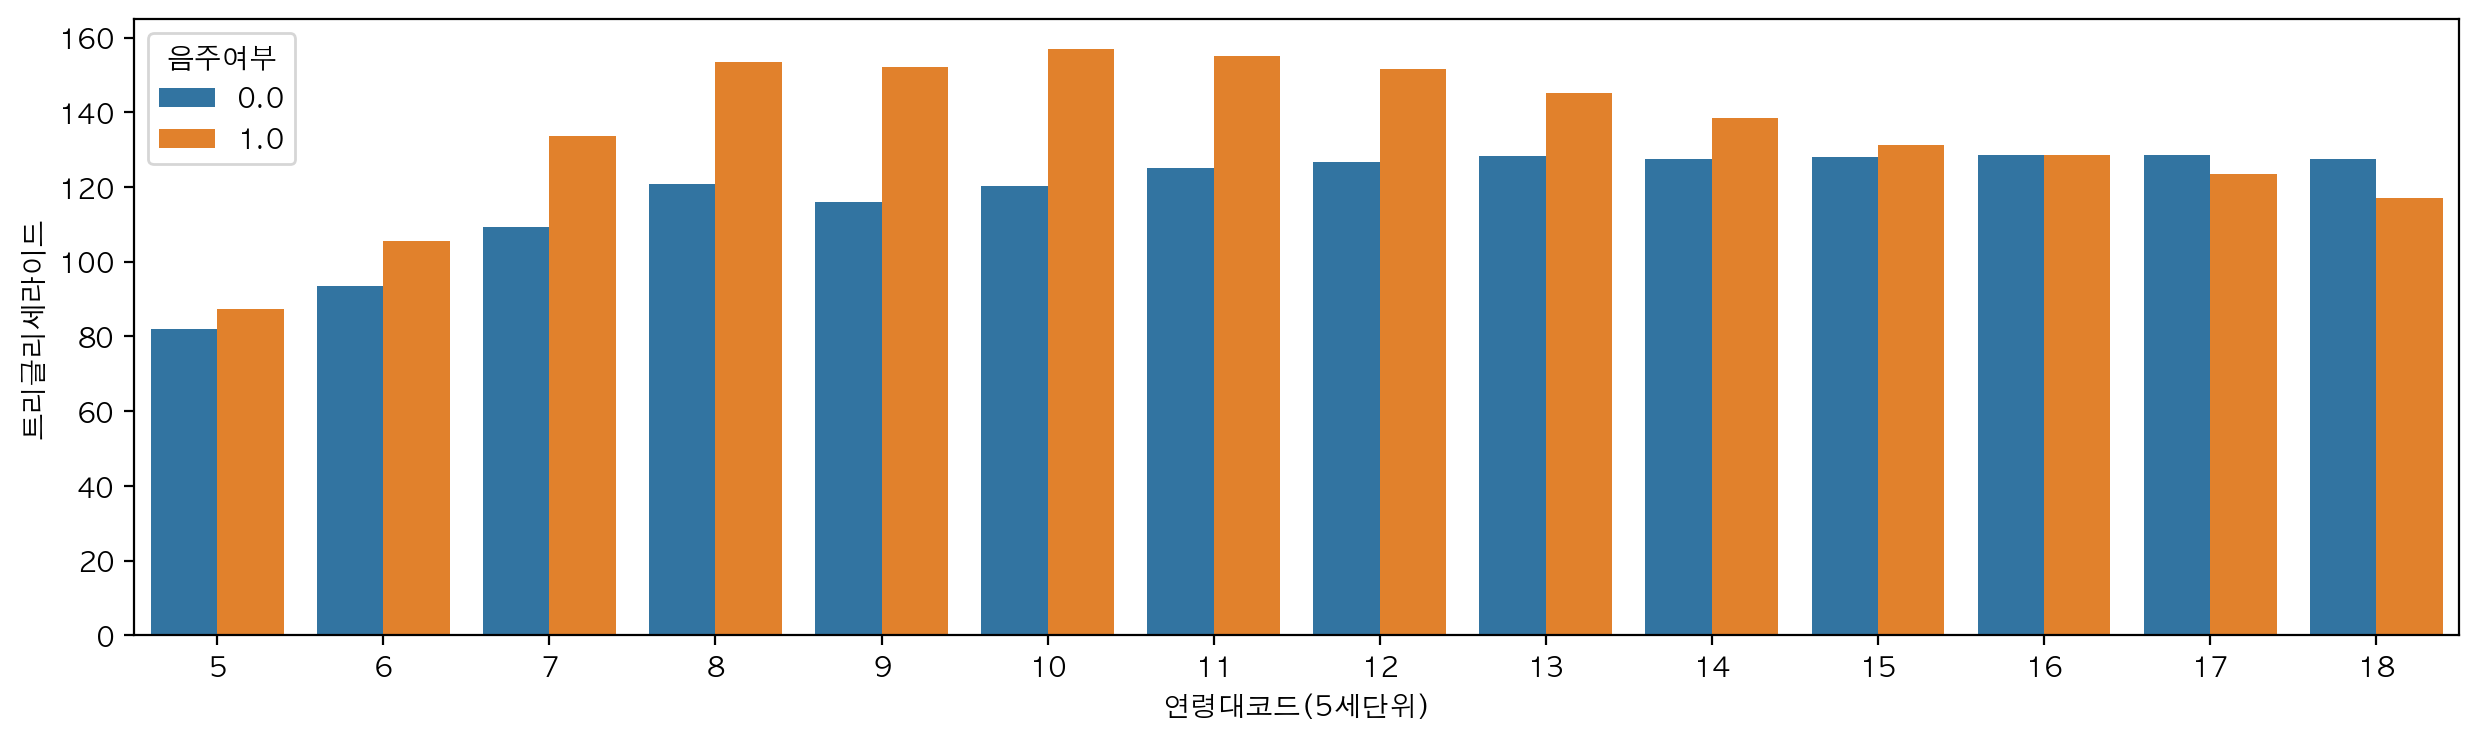

In [49]:
# 트리글리세라이드(중성지방)에 따른 연령대코드(5세단위)를 음주여부에 따라 barplot으로 그립니다.
plt.figure(figsize=(15, 4))
sns.barplot(data=df, x='연령대코드(5세단위)', y='트리글리세라이드', hue='음주여부', errorbar=None)

<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

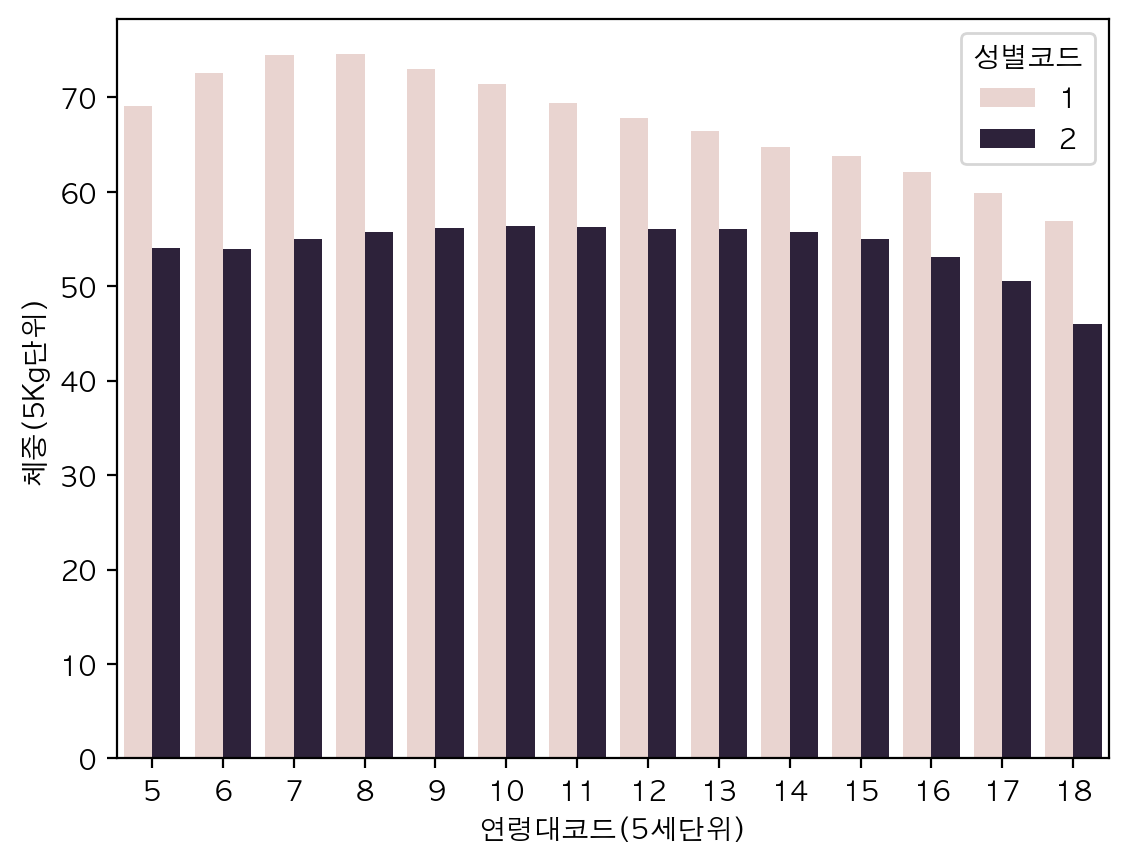

In [50]:
# 음주여부와 체중(5Kg단위)을 성별에 따라 봅니다.
sns.barplot(data=df, x='연령대코드(5세단위)', y='체중(5Kg단위)', hue='성별코드', errorbar=None)

<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

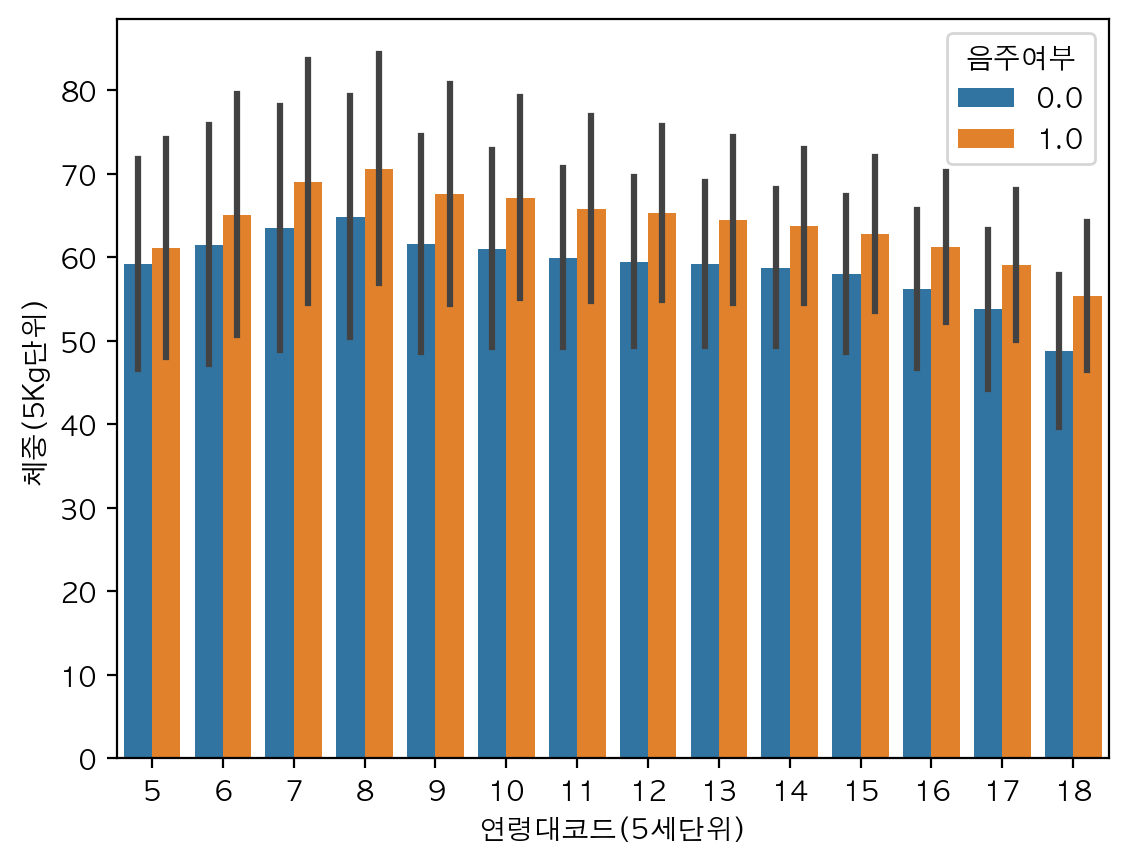

In [51]:
# 연령대코드(5세단위) 에 따른 체중(5Kg단위)을 음주여부에 따라 barplot으로 그립니다.
sns.barplot(data=df, x='연령대코드(5세단위)', y='체중(5Kg단위)', hue='음주여부', errorbar='sd')

### 14.5 lineplot and pointplot

<Axes: xlabel='연령대코드(5세단위)', ylabel='체중(5Kg단위)'>

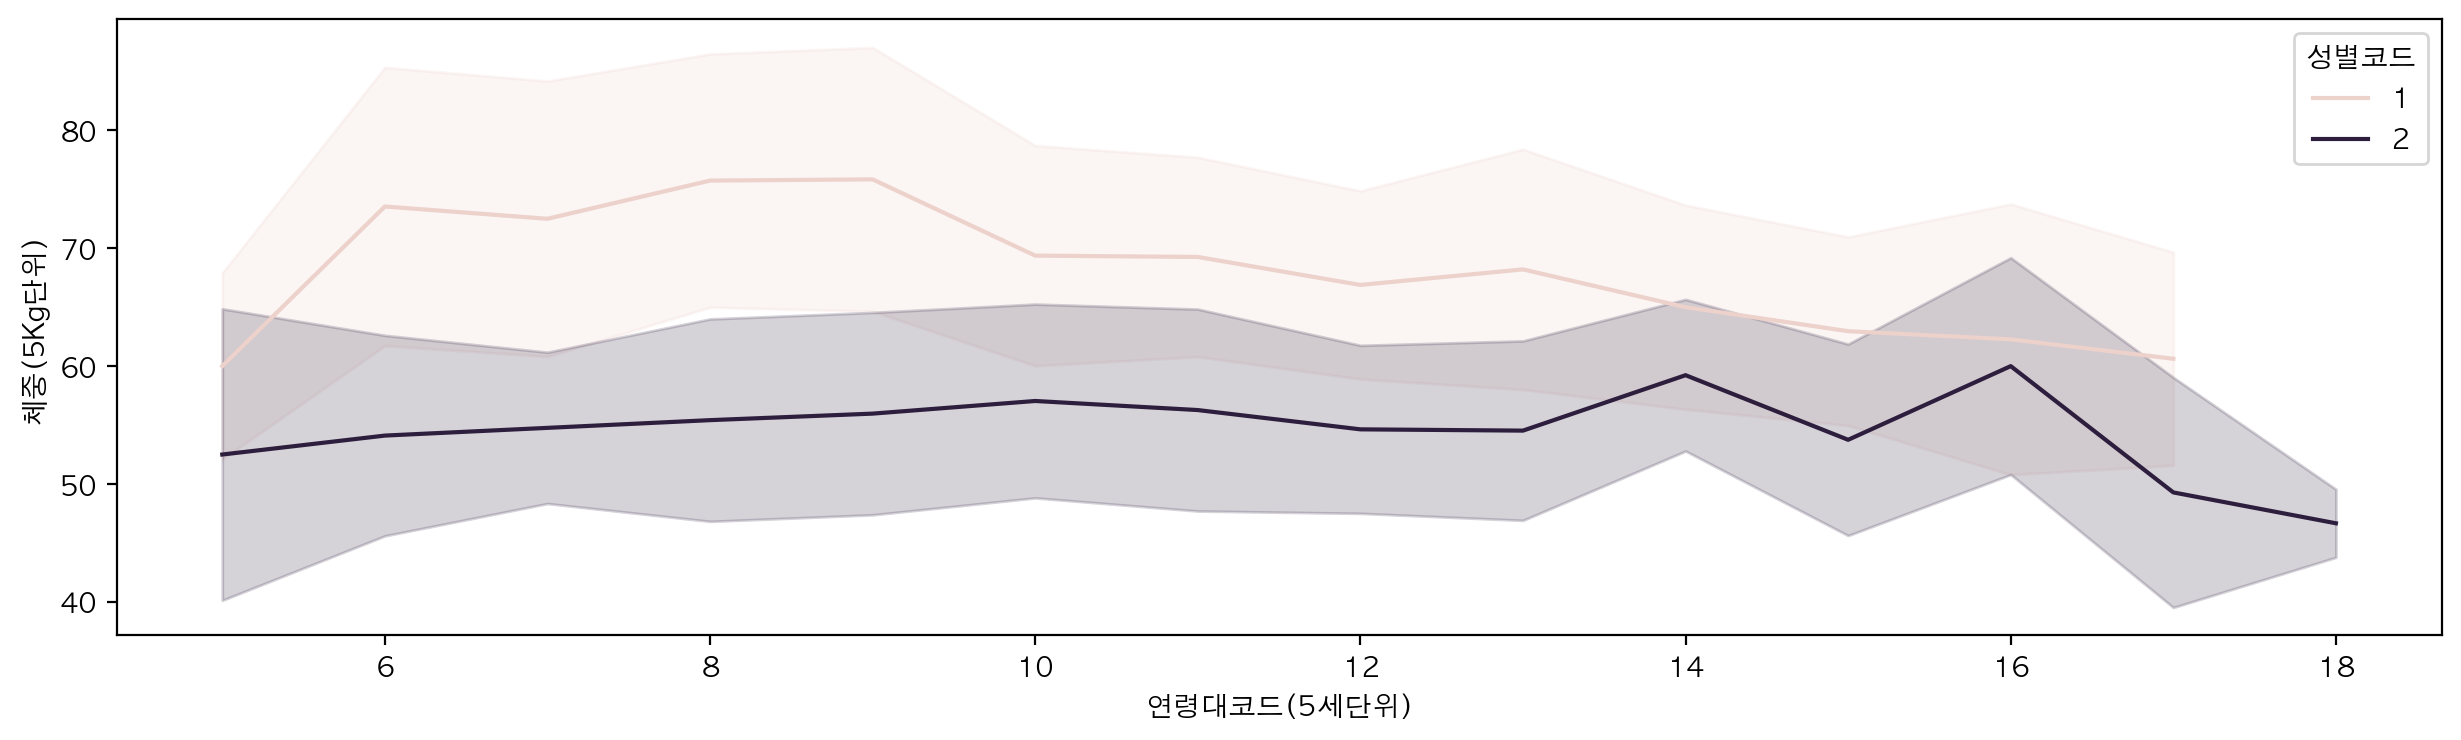

In [52]:
# 연령대코드(5세단위) 에 따른 체중(5Kg단위)을 성별코드에 따라 lineplot으로 그립니다.
# errorbar = ci
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x='연령대코드(5세단위)', y='체중(5Kg단위)', hue='성별코드', errorbar='sd')

<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

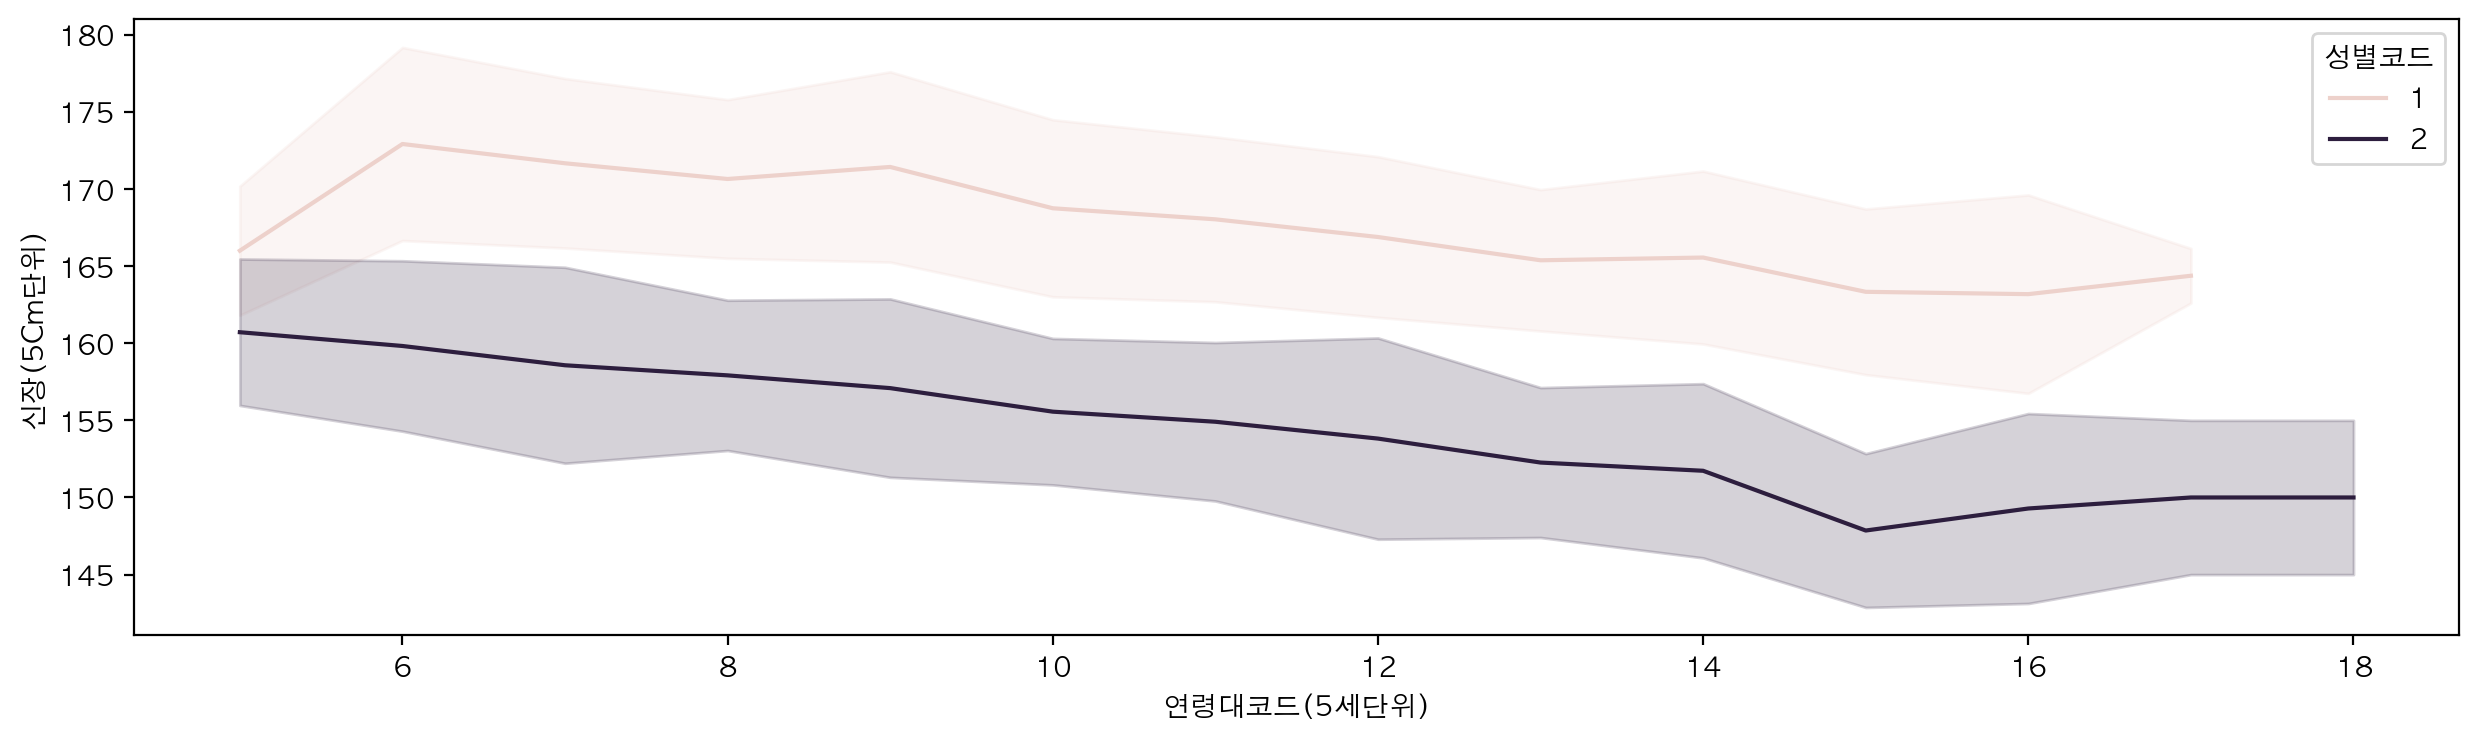

In [53]:
# 연령대코드(5세단위) 에 따른 신장(5Cm단위)을 성별코드에 따라 lineplot으로 그립니다.
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_sample, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='성별코드', errorbar='sd')

<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

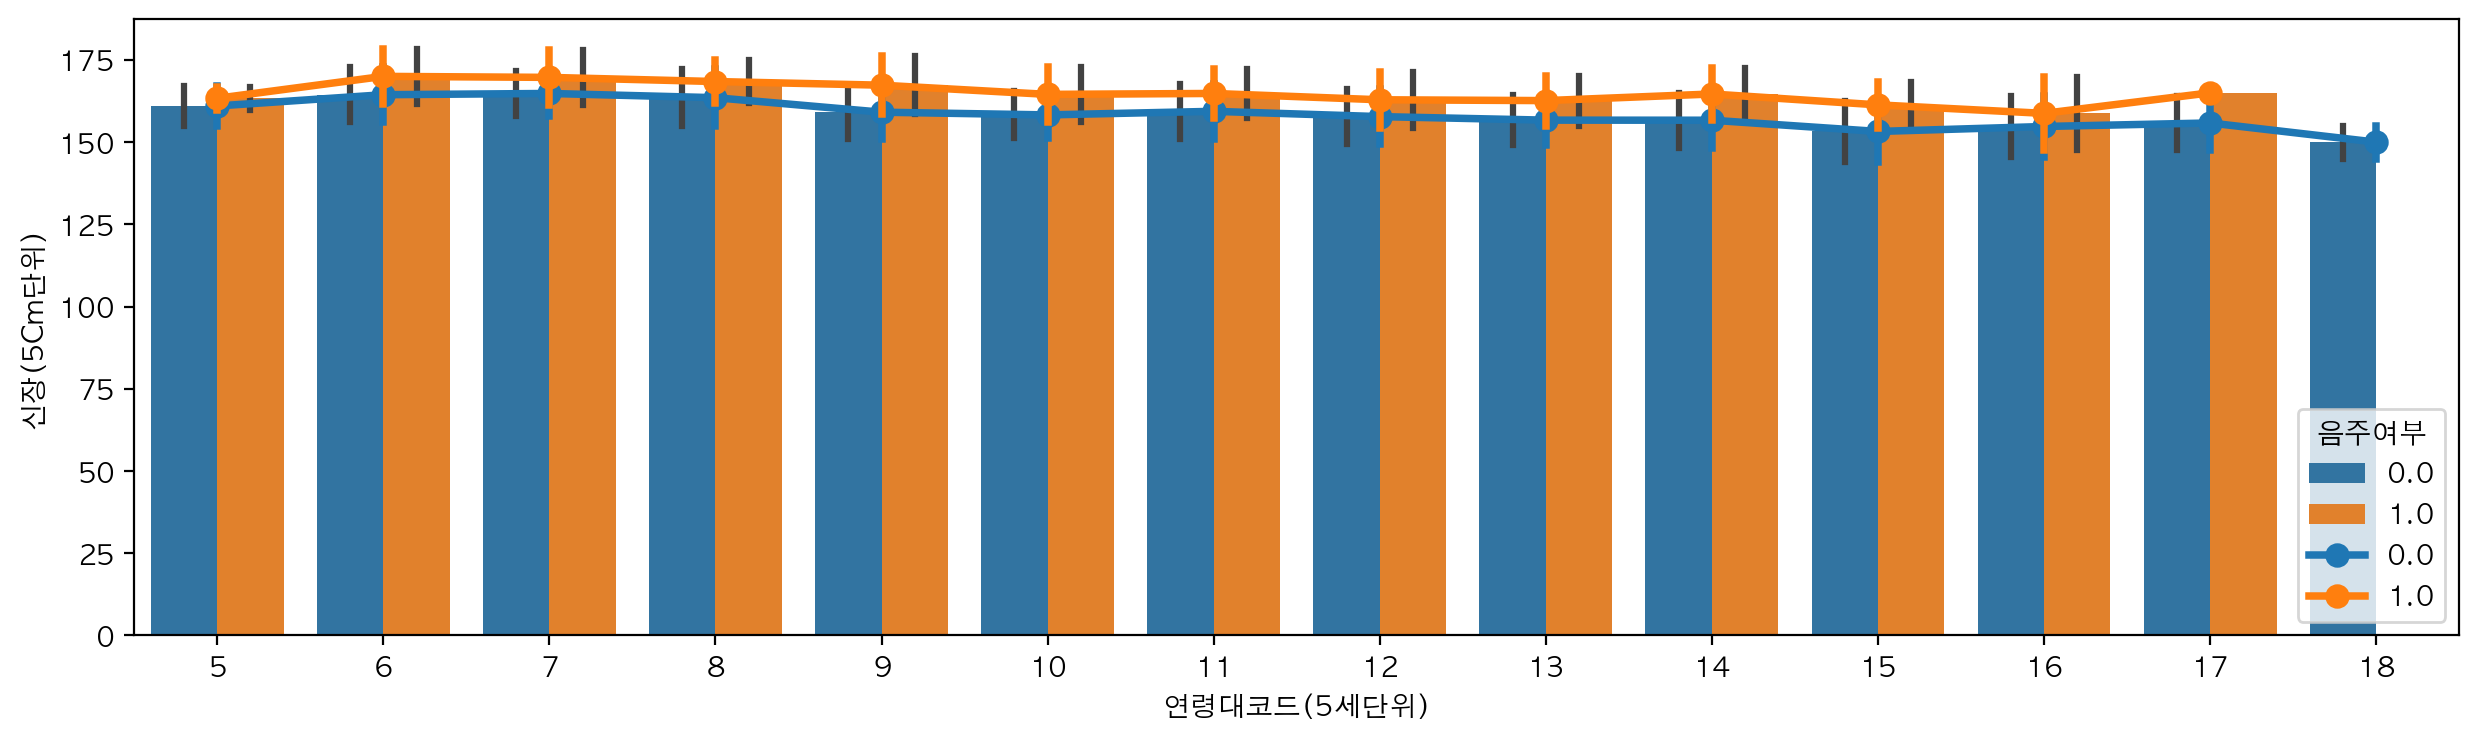

In [54]:
# 연령대코드(5세단위) 에 따른 신장(5Cm단위)을 음주여부에 따라 pointplot과 barplot으로 그립니다.
plt.figure(figsize=(15, 4))
sns.barplot(data=df_sample, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='음주여부', errorbar='sd')
sns.pointplot(data=df_sample, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='음주여부', errorbar='sd')

<Axes: xlabel='연령대코드(5세단위)', ylabel='신장(5Cm단위)'>

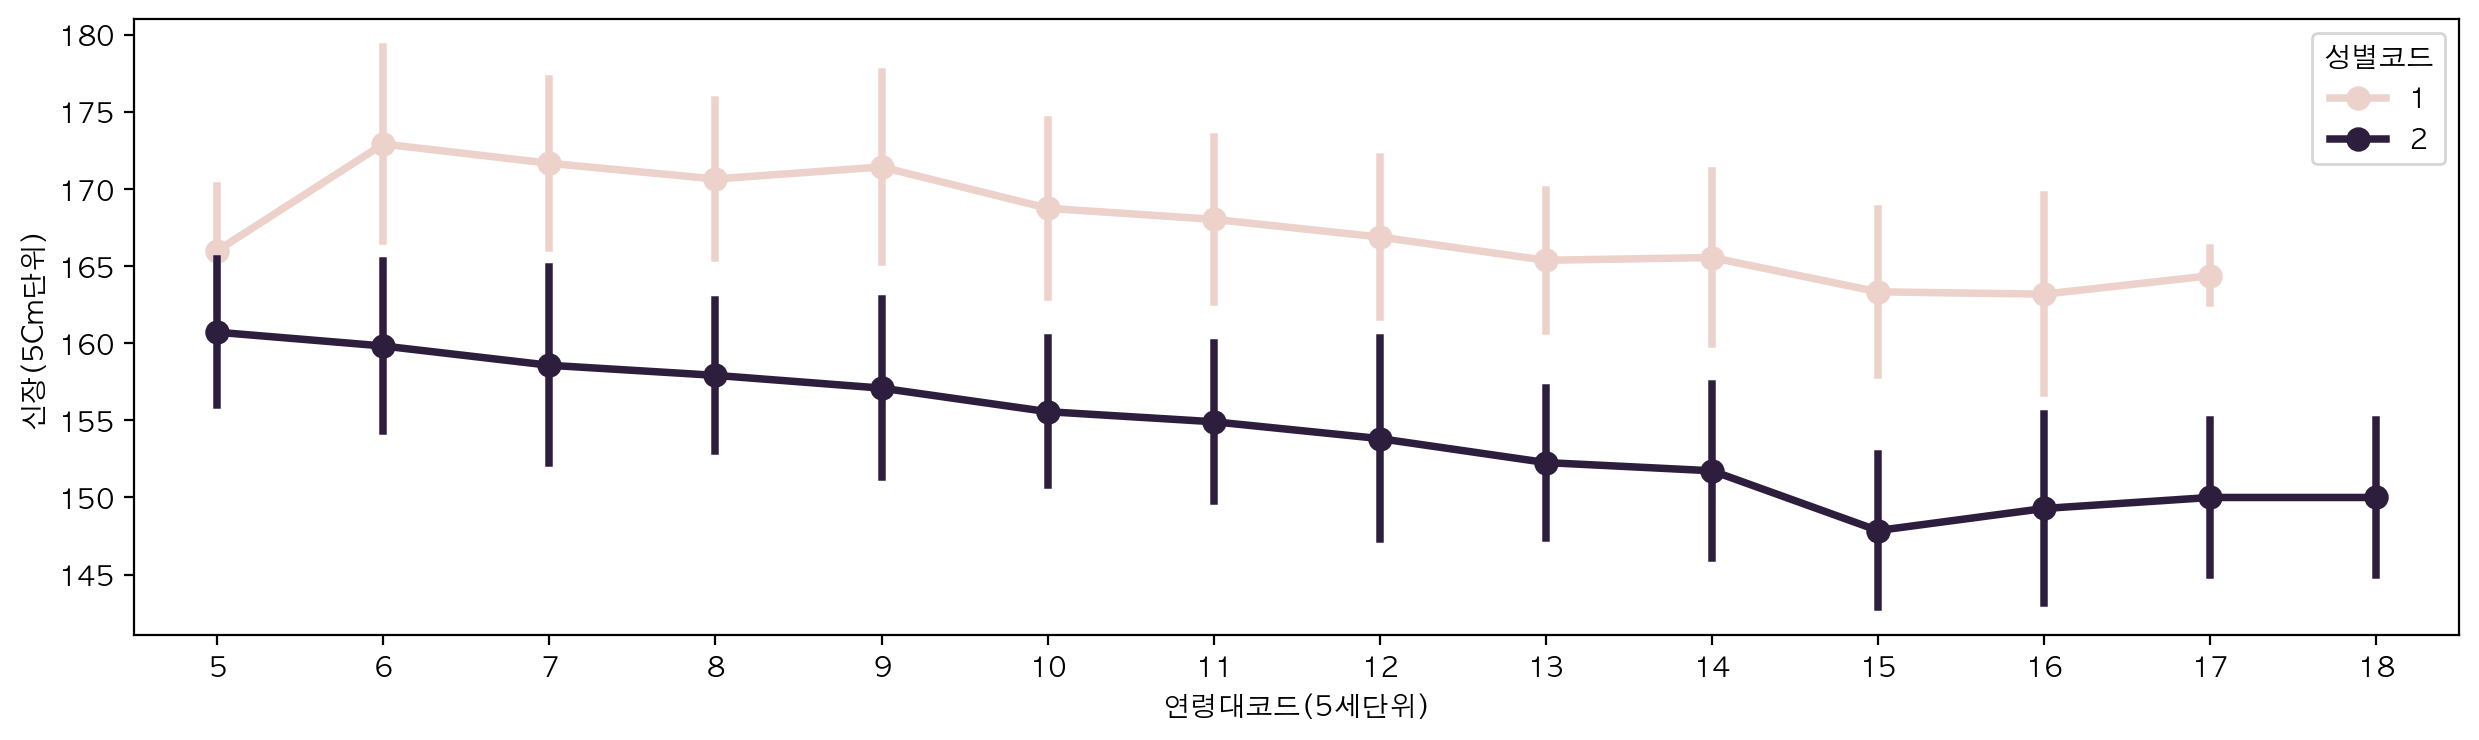

In [55]:
# 연령대코드(5세단위) 에 따른 신장(5Cm단위)을 성별코드에 따라 pointplot으로 그립니다.
plt.figure(figsize=(15, 4))
sns.pointplot(data=df_sample, x='연령대코드(5세단위)', y='신장(5Cm단위)', hue='성별코드', errorbar='sd')

<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

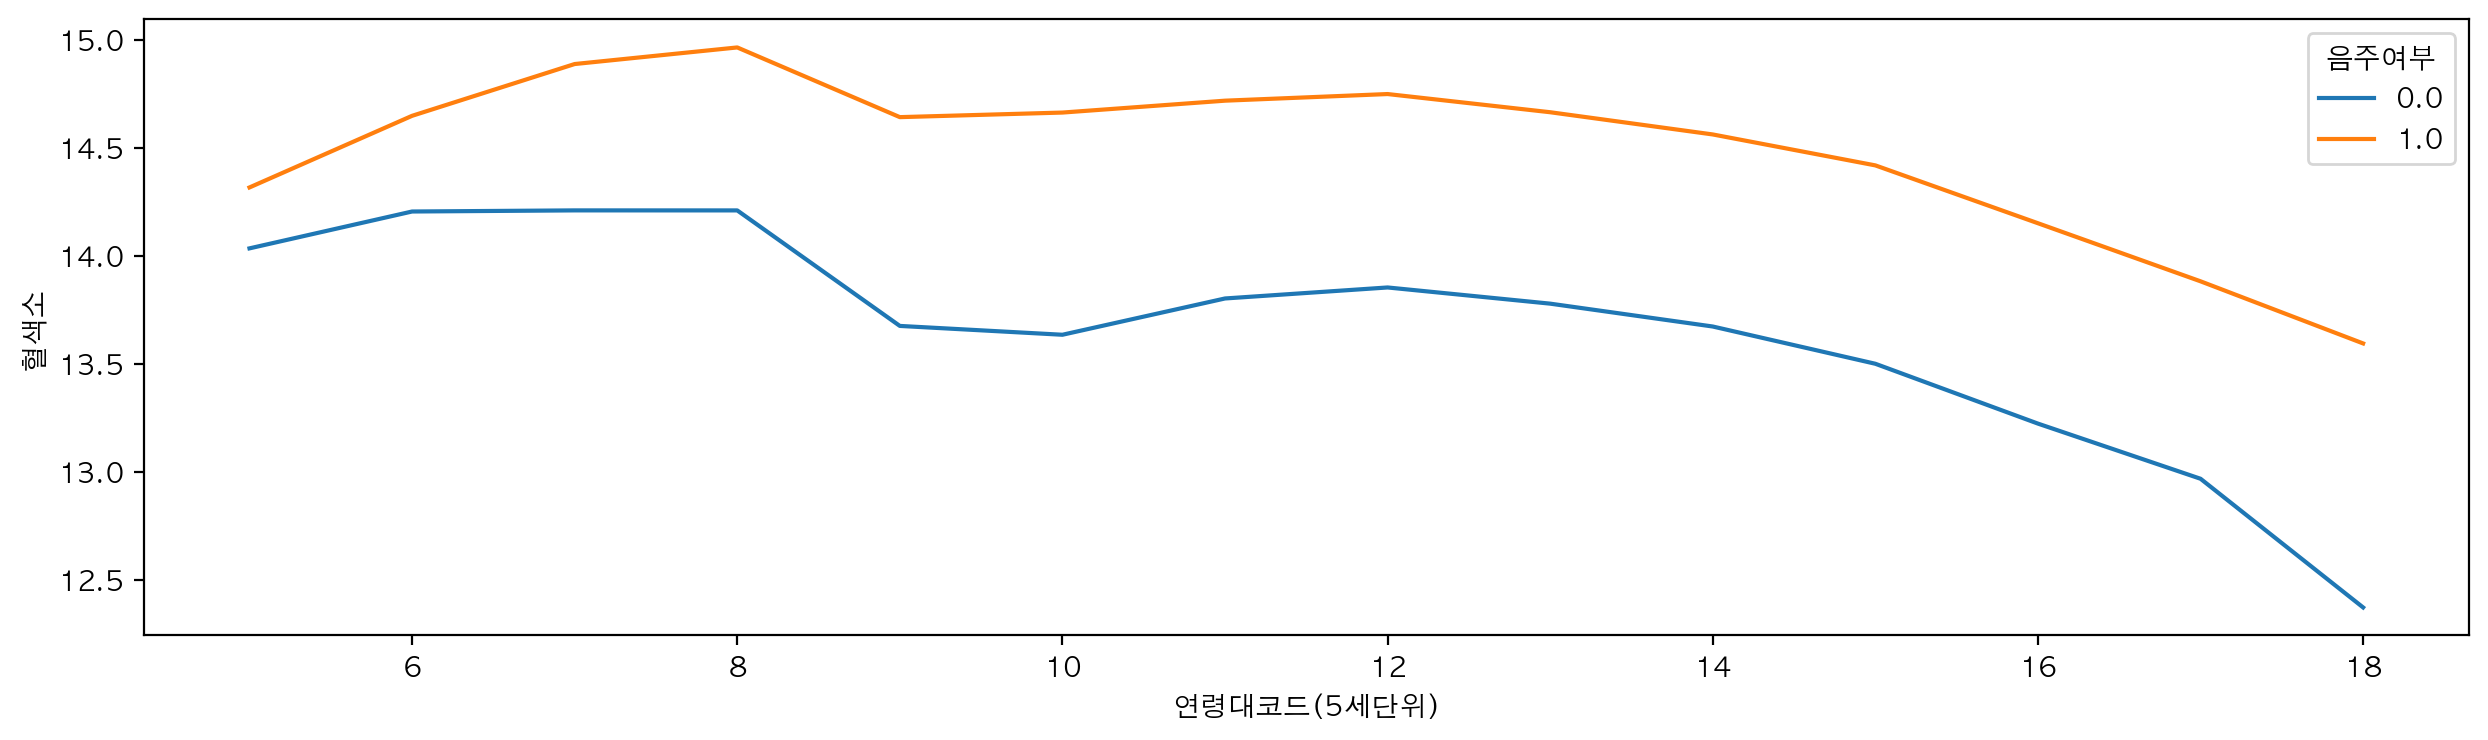

In [56]:
# 연령대코드(5세단위) 에 따른 혈색소를 음주여부에 따라 lineplot으로 그립니다.
plt.figure(figsize=(15, 4))
sns.lineplot(data=df, x='연령대코드(5세단위)', y='혈색소', hue='음주여부', errorbar=None)

### 14.6 boxplot
- https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html
- https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.boxplot.html
- https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC
- 가공하지 않은 자료 그대로를 이용하여 그린 것이 아니라, 자료로부터 얻어낸 통계량인 5가지 요약 수치로 그린다.
- 5가지 요약 수치란 기술통계학에서 자료의 정보를 알려주는 아래의 다섯 가지 수치를 의미한다.

1. 최솟값
2. 제 1사분위수
3. 제 2사분위수(), 즉 중앙값
4. 제 3사분위수()
5. 최댓값
6. Box plot 이해하기

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

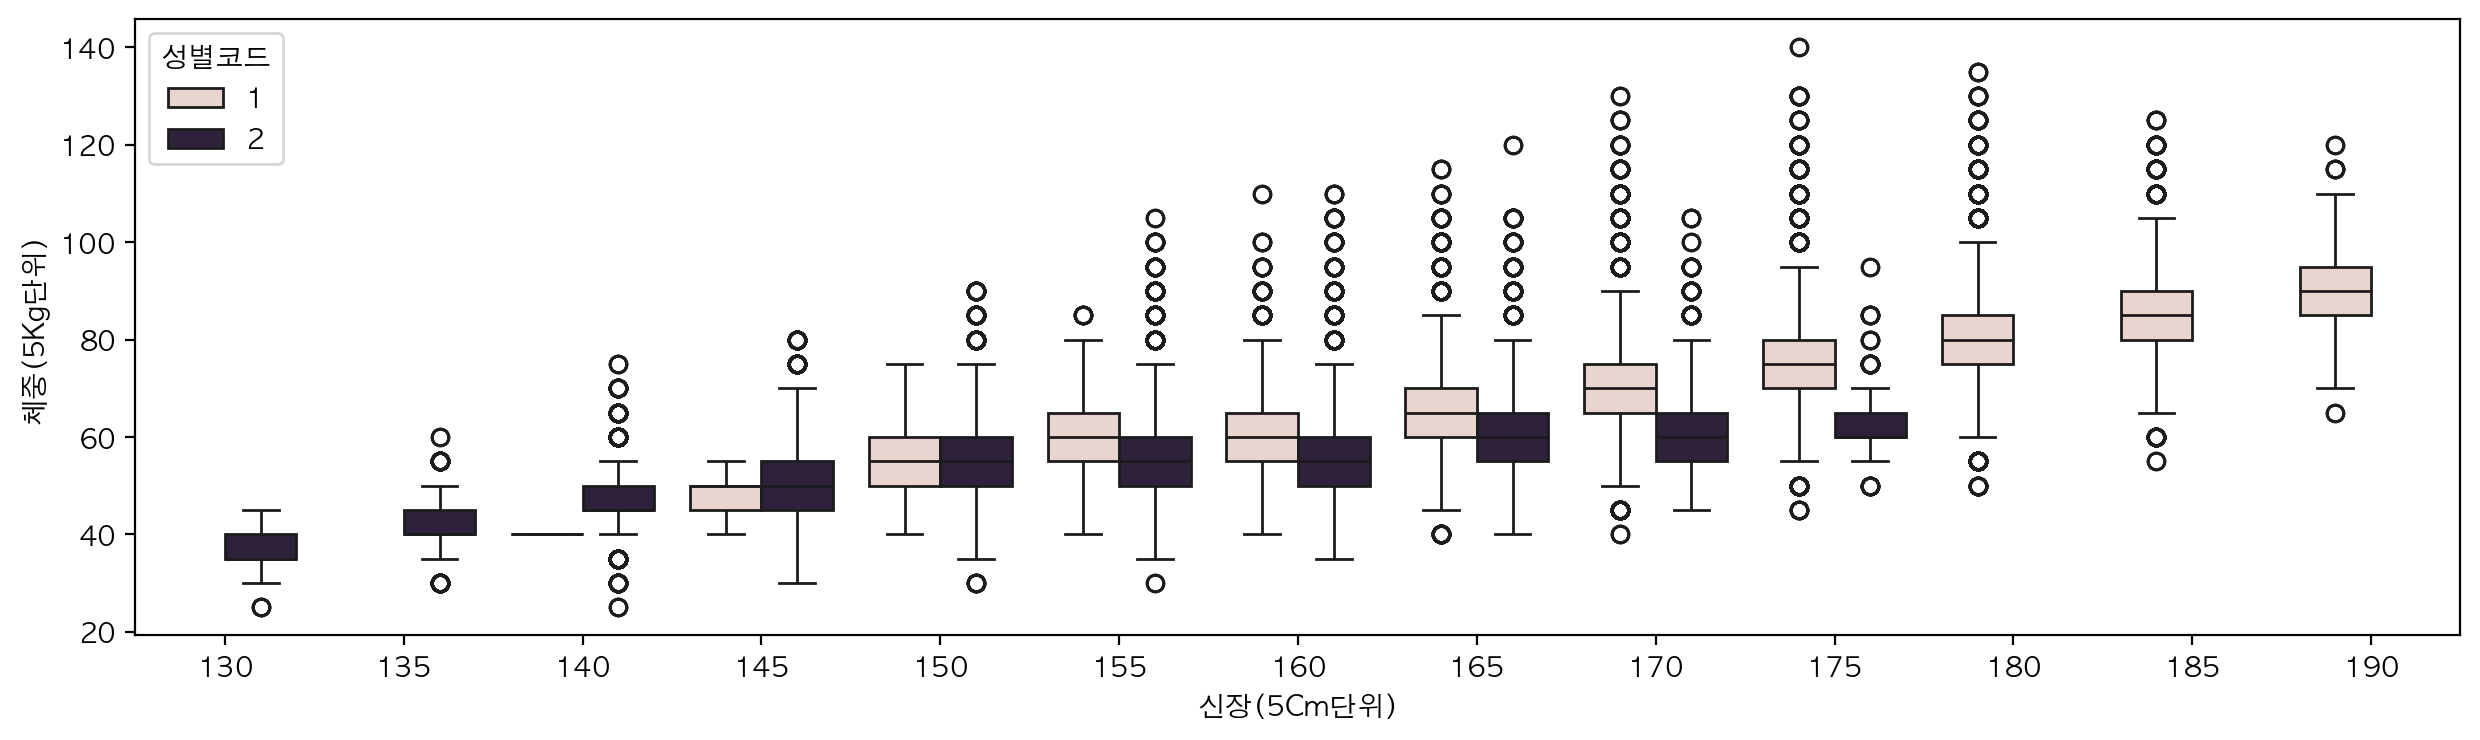

In [57]:
# boxplot으로 신장(5Cm단위)에 따른 체중(5Kg단위)을 그리며, 성별코드에 따라 다른 색상으로 표현되게 합니다.
plt.figure(figsize=(15, 4))
sns.boxplot(data=df, x='신장(5Cm단위)', y='체중(5Kg단위)', hue='성별코드')

### 14.7 violinplot

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

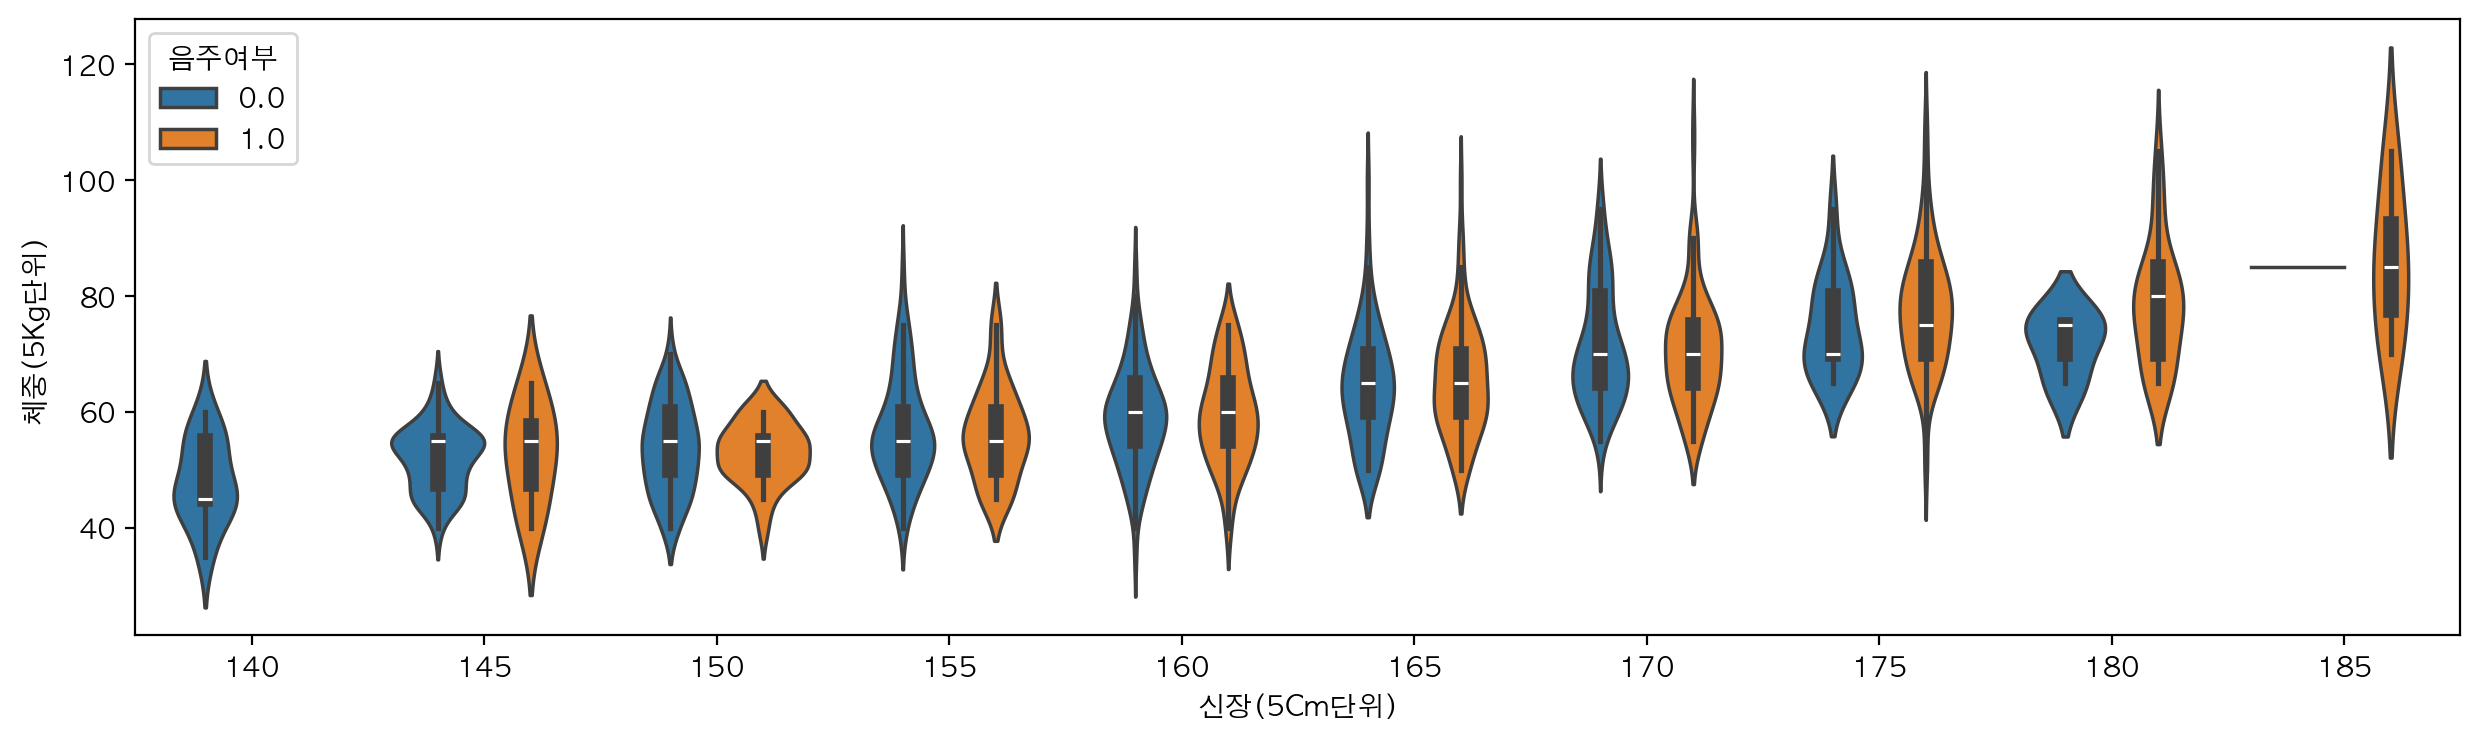

In [58]:
# violinplot 신장(5Cm단위)에 따른 체중(5Kg단위)을 그리며, 음주여부에 따라 다른 색상으로 표현하게 합니다.
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x='신장(5Cm단위)', y='체중(5Kg단위)', hue='음주여부')

<Axes: xlabel='신장(5Cm단위)', ylabel='체중(5Kg단위)'>

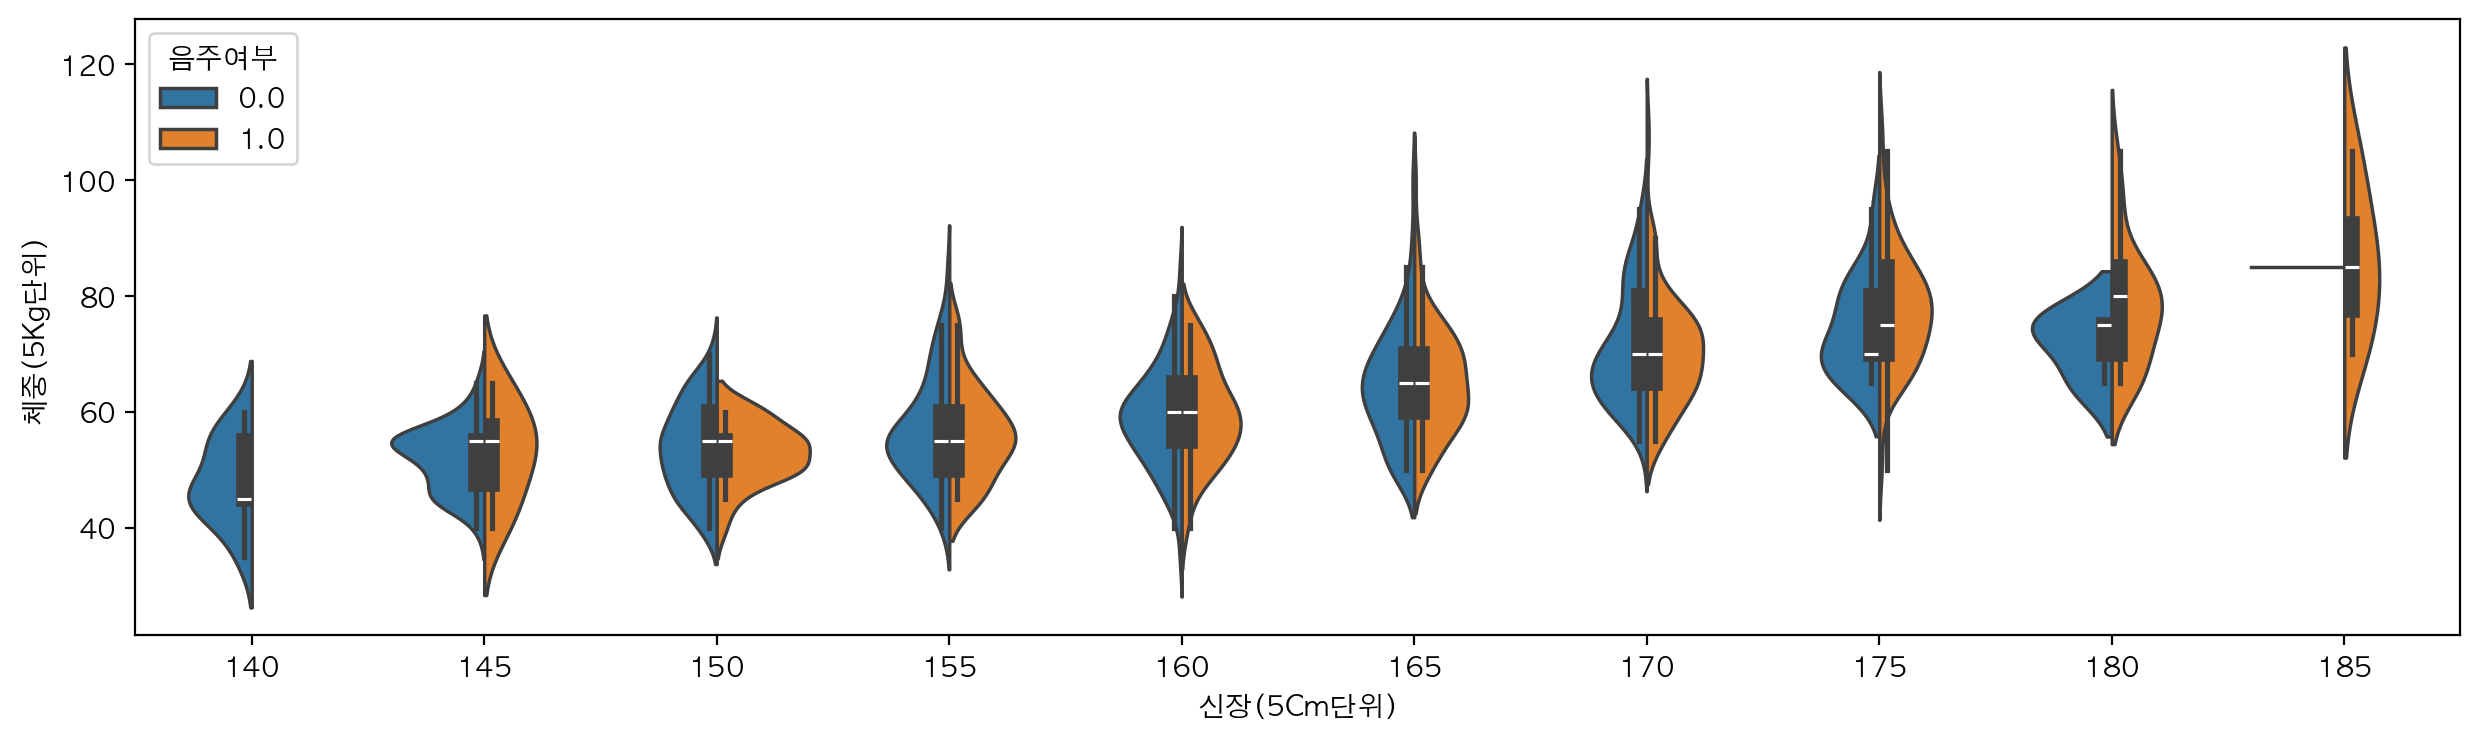

In [59]:
# violinplo의 split 기능을 사용해 봅니다.
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x='신장(5Cm단위)', y='체중(5Kg단위)', hue='음주여부', split=True)

<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

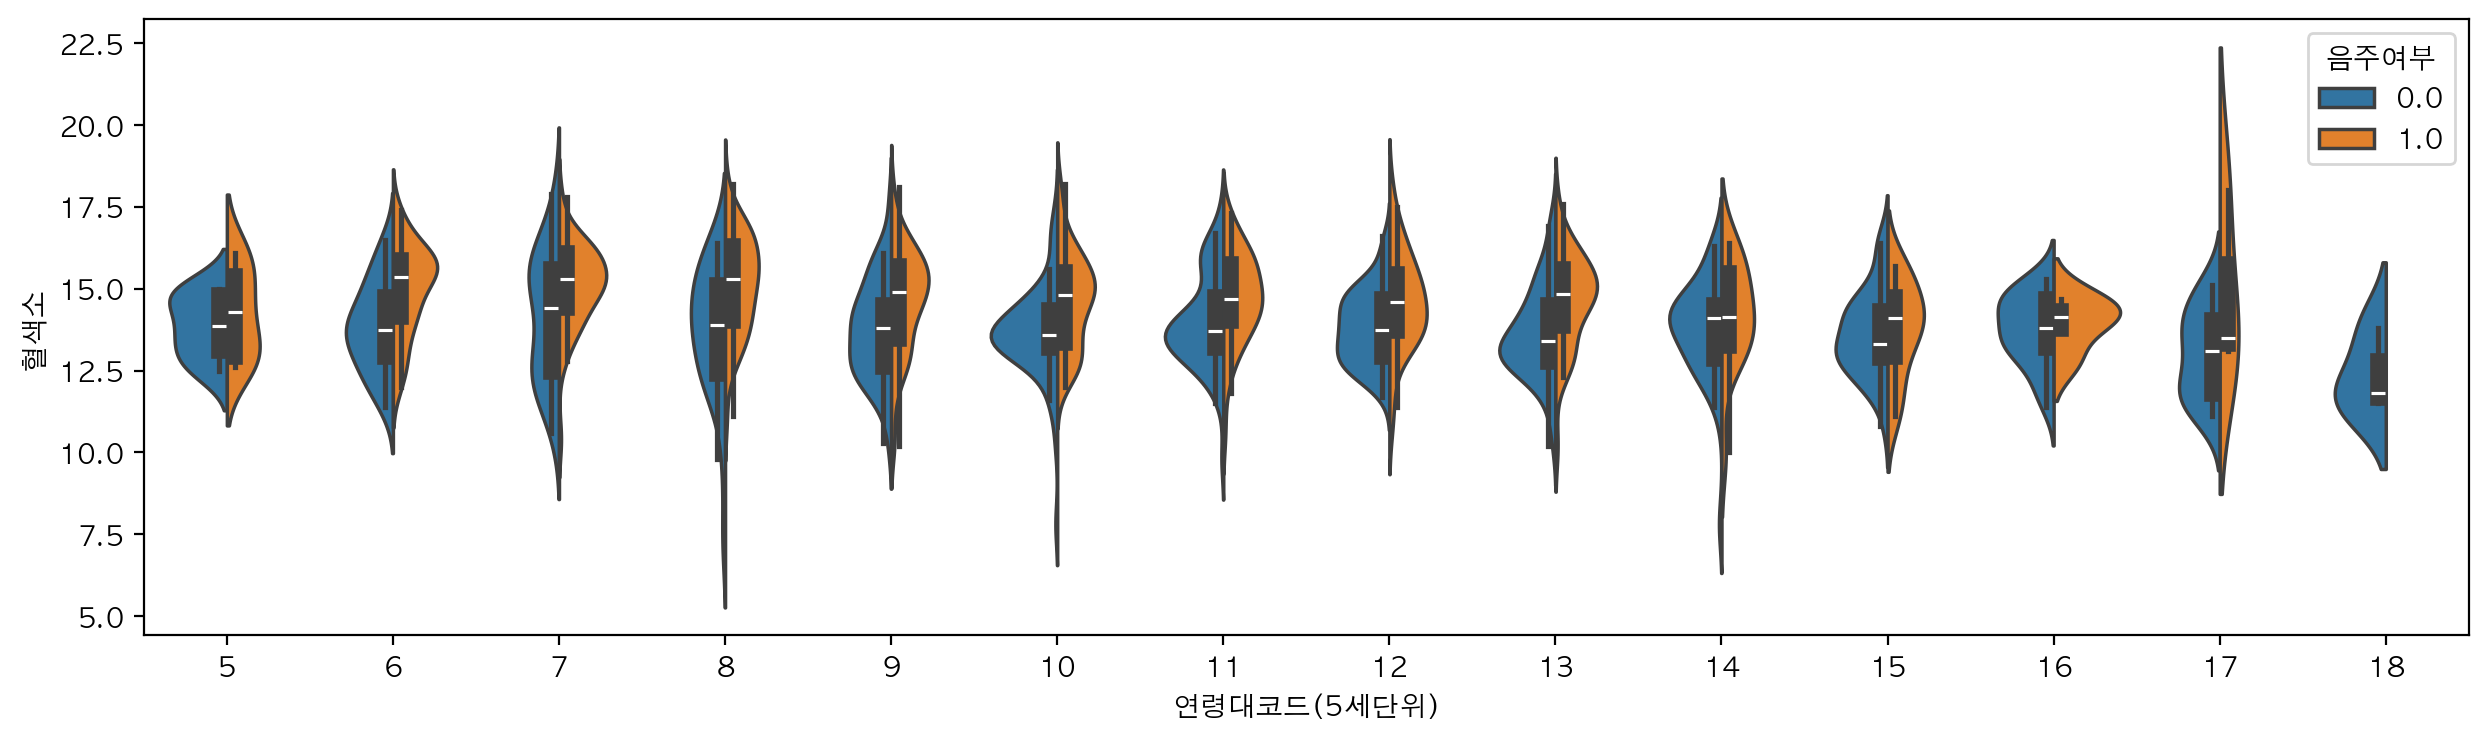

In [60]:
# violinplot 연령대코드(5세단위)에 따른 혈색소를 그리며, 음주여부에 따라 다른 색상으로 표현되게 합니다.
plt.figure(figsize=(15, 4))
sns.violinplot(data=df_sample, x='연령대코드(5세단위)', y='혈색소', hue='음주여부', split=True)

### 14.8 swarm plot
- 범주형 데이터를 산점도로 시각화하고자 할 때 사용합니다.

/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 36.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 43.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 48.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/macos/anaconda3/envs/dl/lib/python

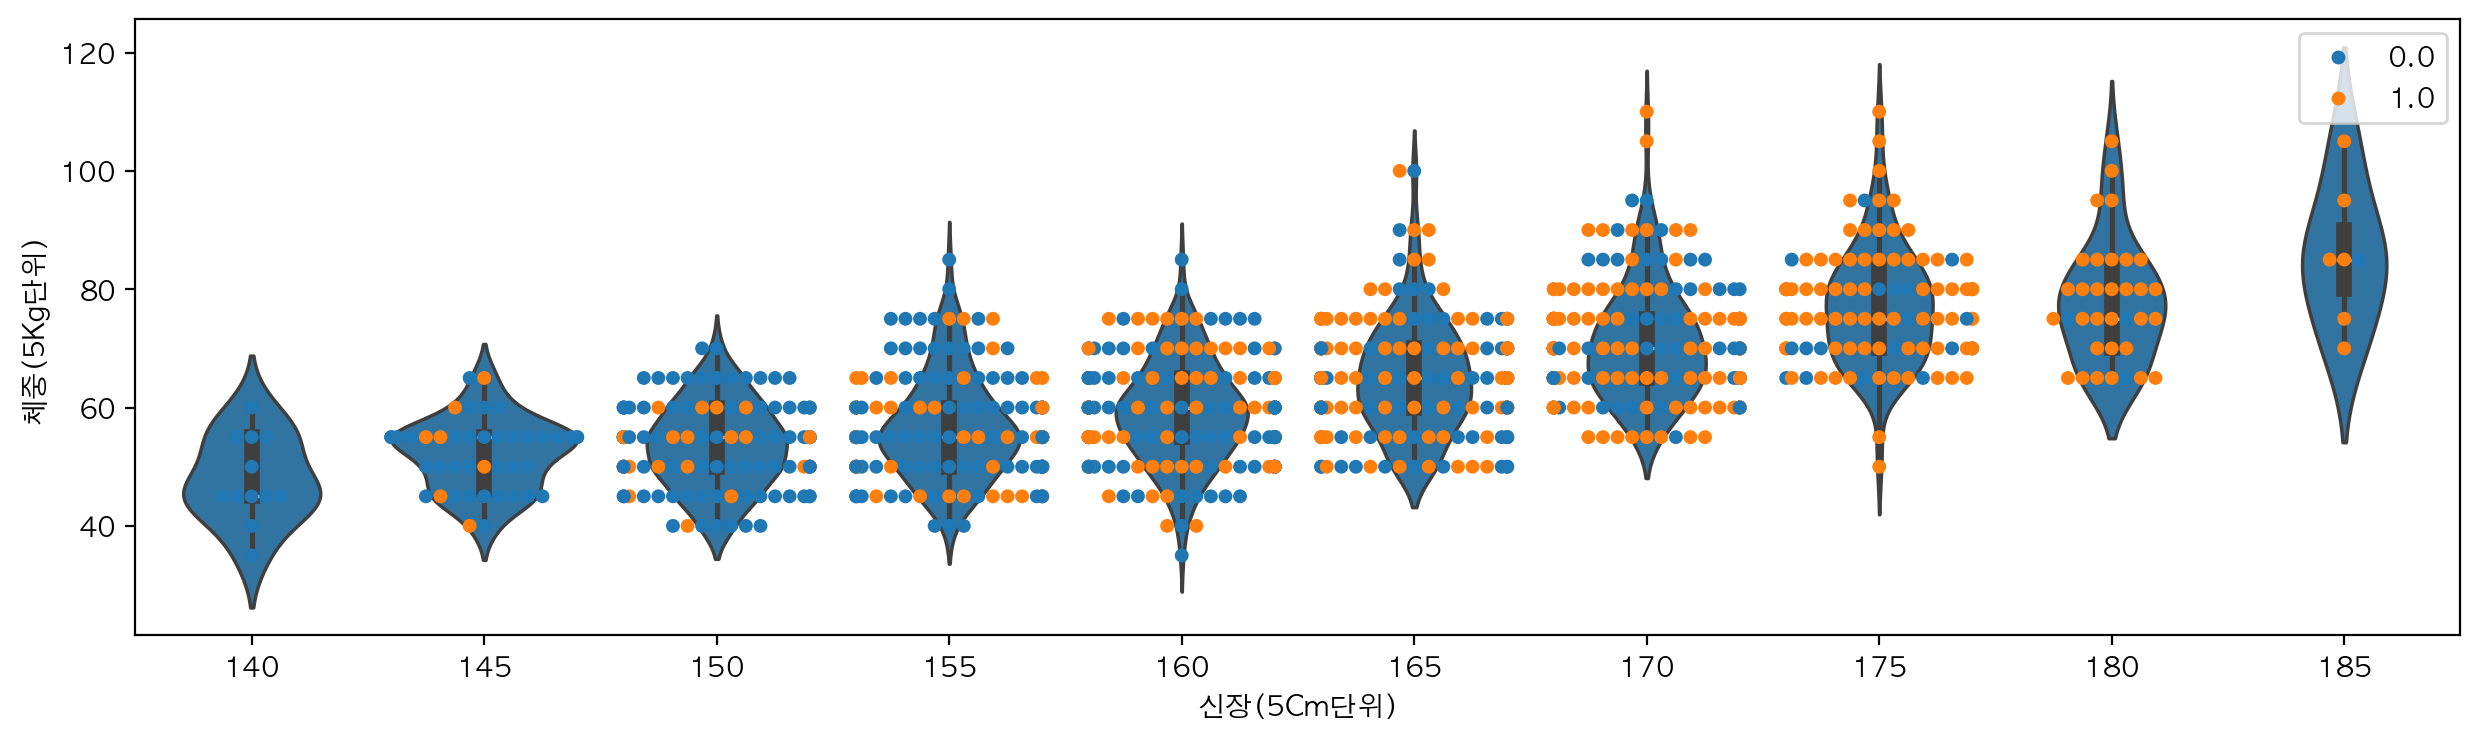

In [61]:
# swarmplot으로 신장(5Cm단위)에 따른 체중(5Kg)단위을 그리며, 음주여부에 따라 다른 색상으로 표현되게 합니다.
# 점을 하나씩 찍기 때문에 오래 걸리는 코드는 전체로 그려보기 전에 일부만 가져와 그립니다.
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x='신장(5Cm단위)', y='체중(5Kg단위)', hue='음주여부');
sns.violinplot(data=df_sample, x='신장(5Cm단위)', y='체중(5Kg단위)');

/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 10.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 15.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 8.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/macos/anaconda3/envs/dl/lib/python3

<Axes: xlabel='연령대코드(5세단위)', ylabel='혈색소'>

/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 13.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 7.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/seaborn/categorical.py:3370: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


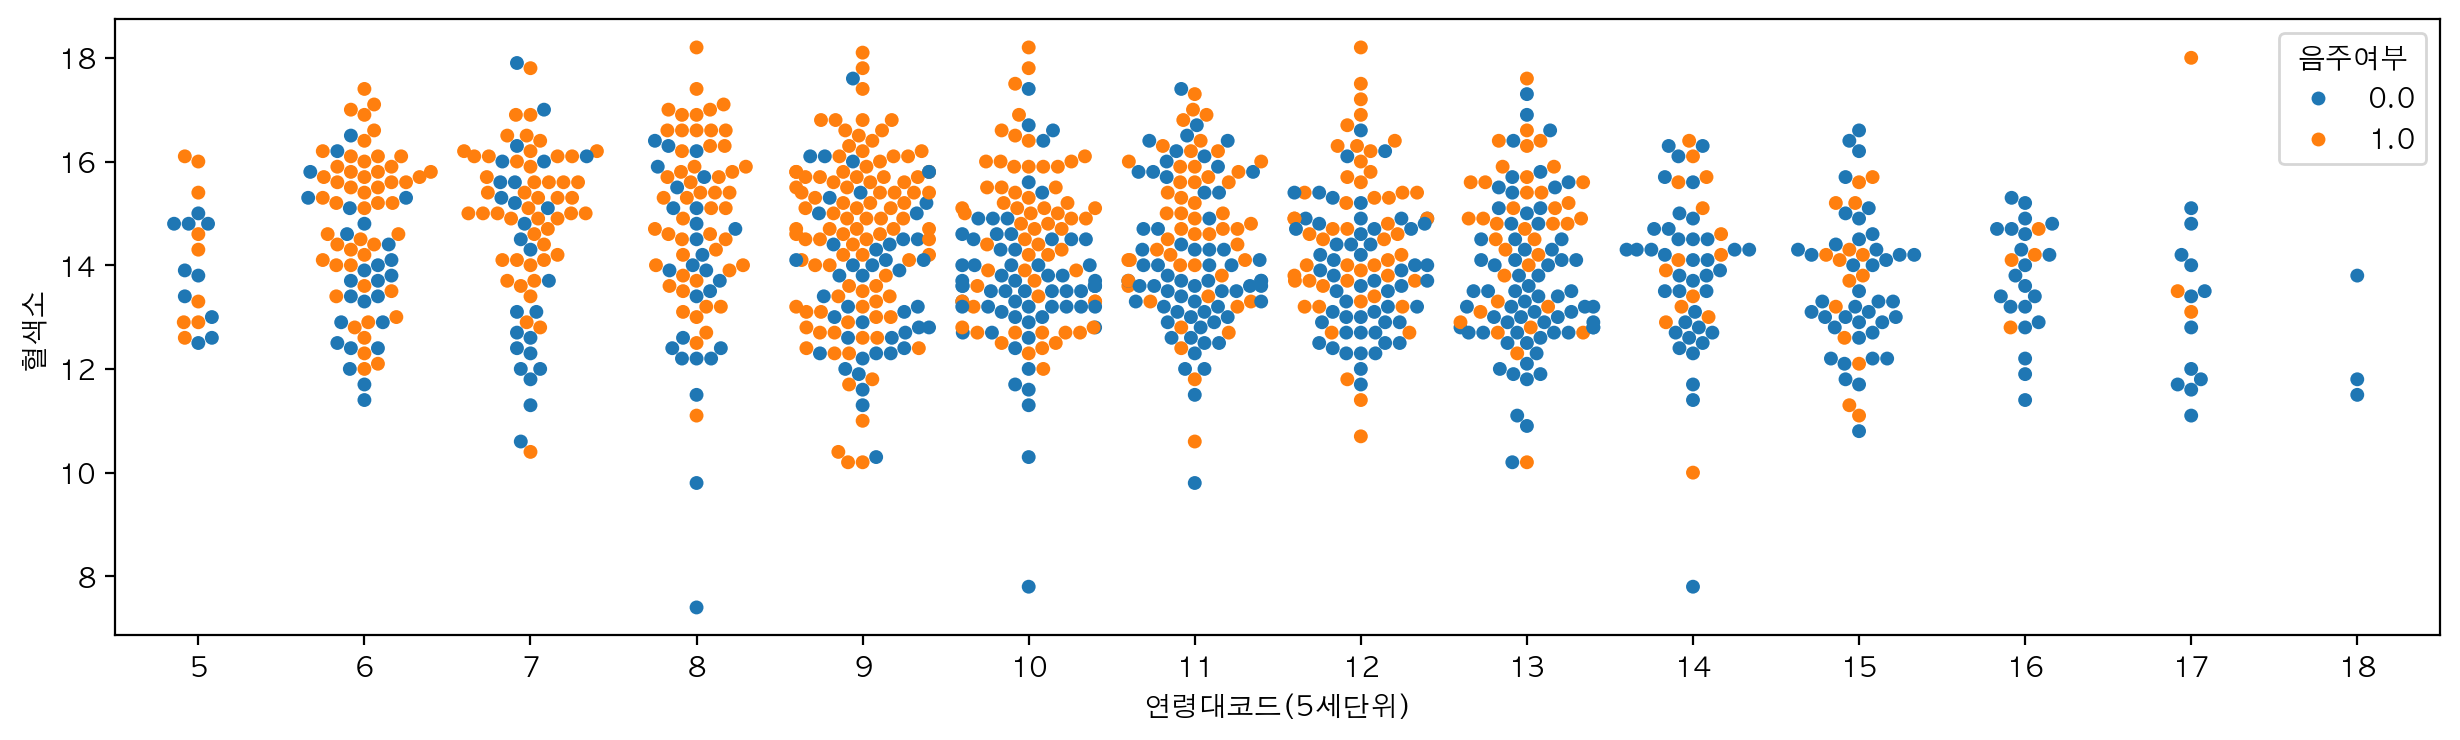

In [62]:
# swarmplot으로 연령대코드(5세단위)에 따른 음주여부 그리며, 성별코드에 따라 다른 색상으로 표현되게 합니다.
# 점을 하나씩 찍기 때문에 오래 걸리는 코드는 전체로 그려보기 전에 일부만 가져와 그립니다.
plt.figure(figsize=(15, 4))
sns.swarmplot(data=df_sample, x='연령대코드(5세단위)', y='혈색소', hue='음주여부')

/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


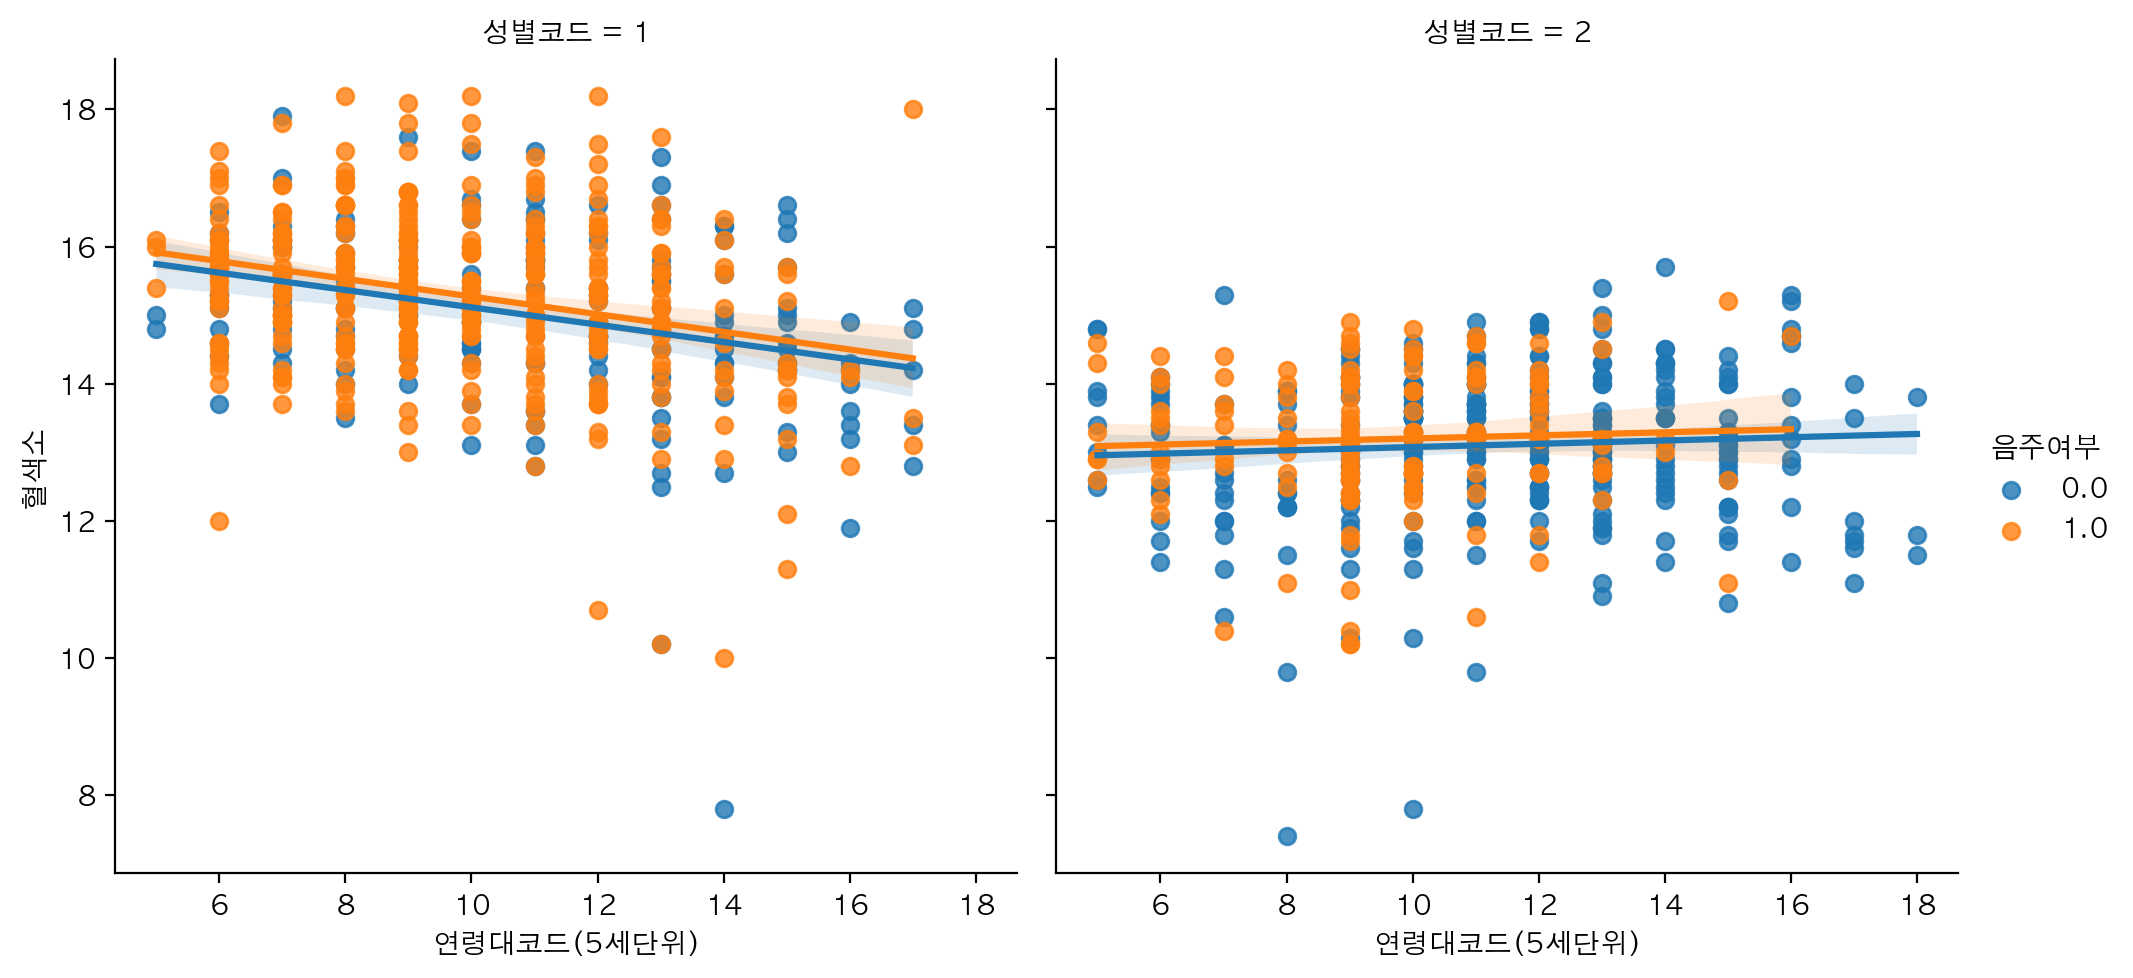

In [63]:
# lmplot으로 그리기
sns.lmplot(data=df_sample, x='연령대코드(5세단위)', y='혈색소', hue='음주여부', col='성별코드')

## 15. 수치형 데이터 시각화

### 15.1 scatterplot - 산점도
- 수치형 vs 수치형 데이터의 상관관계를 볼 때 주로 사용합니다.
- 점의 크기를 데이터의 수치에 따라 다르게 볼 수 있습니다.

<Axes: xlabel='(혈청지오티)AST', ylabel='(혈청지오티)ALT'>

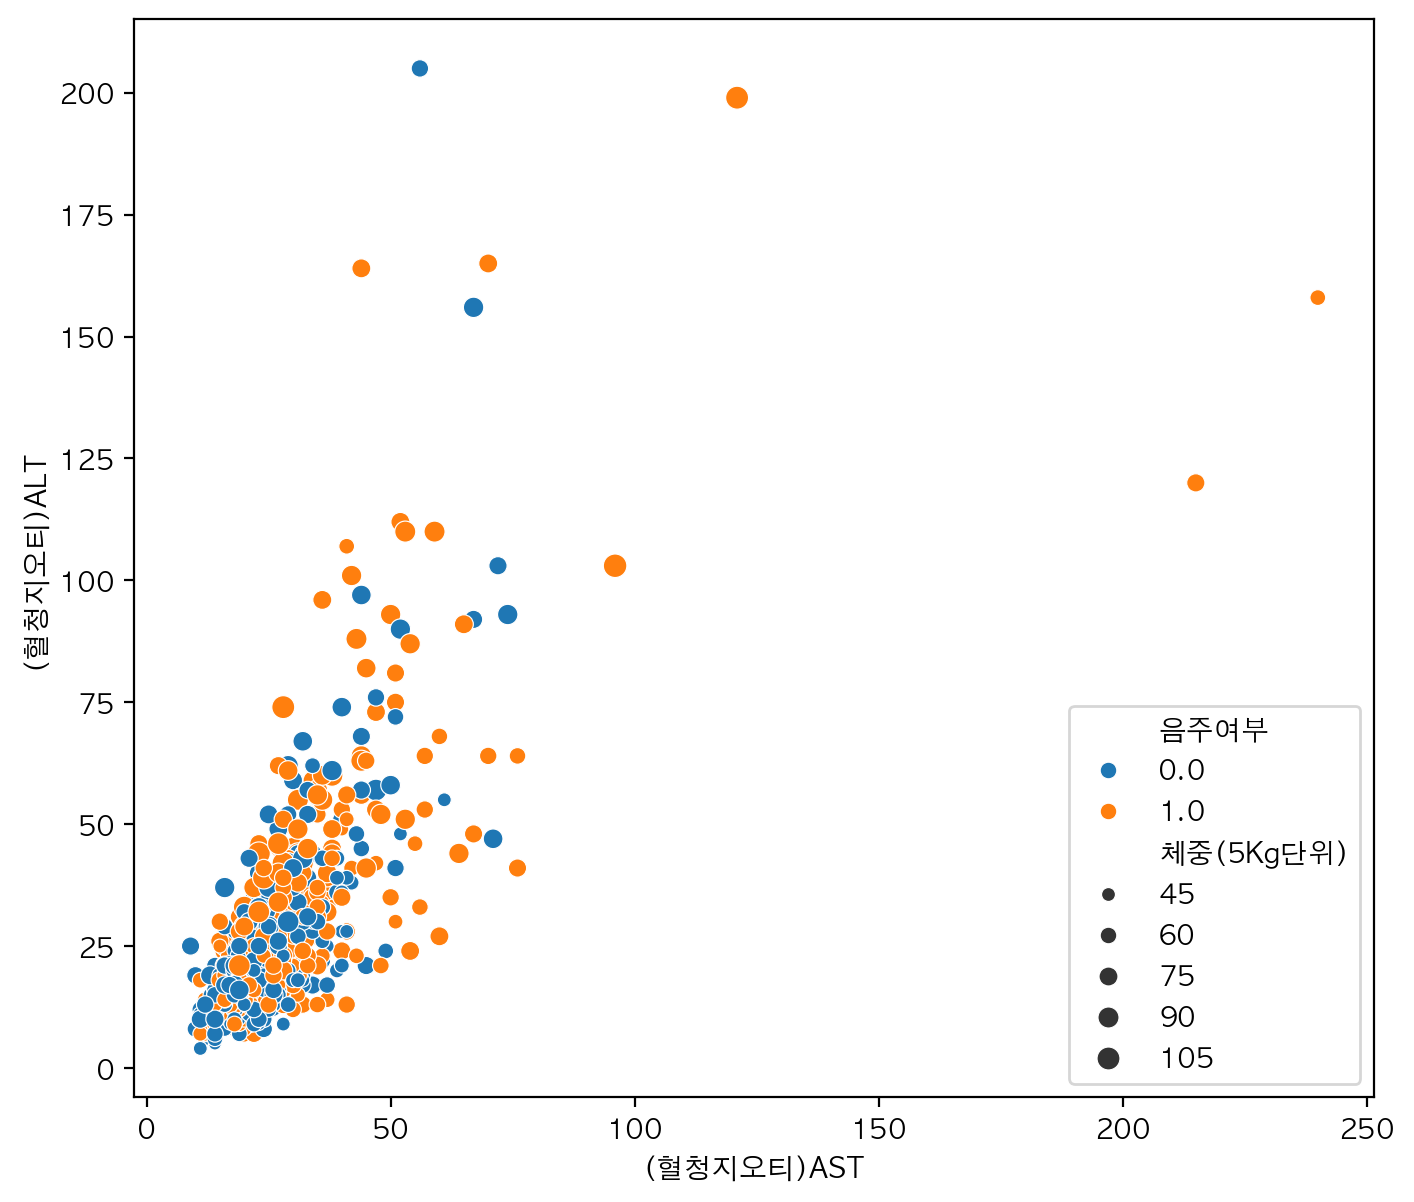

In [64]:
# scatterplot으로 '(혈청지오티)AST', '(혈청지오티)ALT'을 그리고 음주여부에 따라 다른 색상으로 표현되게 합니다.
plt.figure(figsize=(8, 7))
sns.scatterplot(data=df_sample, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부', size='체중(5Kg단위)')

### 15.2 lmplot - 상관 관계를 보기

/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x700 with 0 Axes>

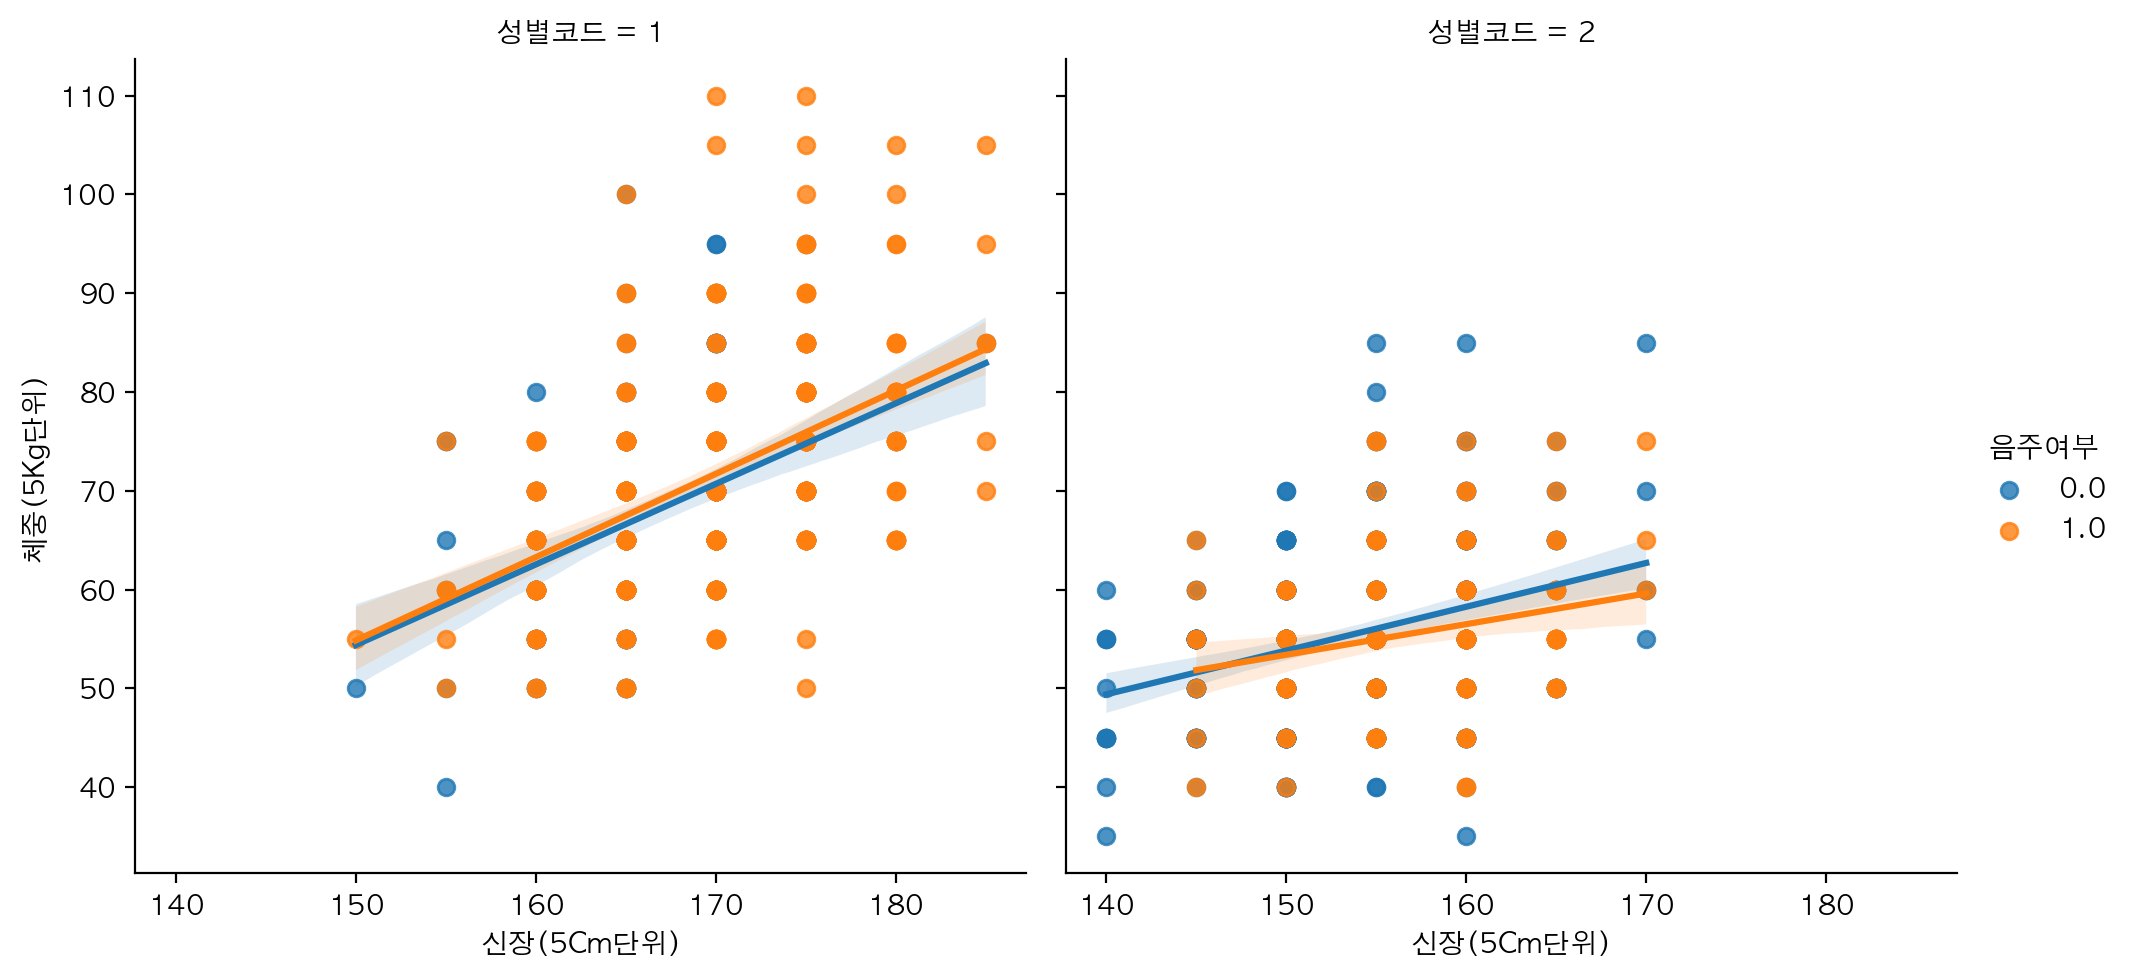

In [65]:
# lmplot으로 신장(5Cm단위)에 따른 체중(5Kg단위)을 그리며, 음주여부에 따라 다른 색상으로 표현되게 합니다.
plt.figure(figsize=(8, 7))
sns.lmplot(data=df_sample, x='신장(5Cm단위)', y='체중(5Kg단위)', hue='음주여부', col='성별코드')

/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 800x700 with 0 Axes>

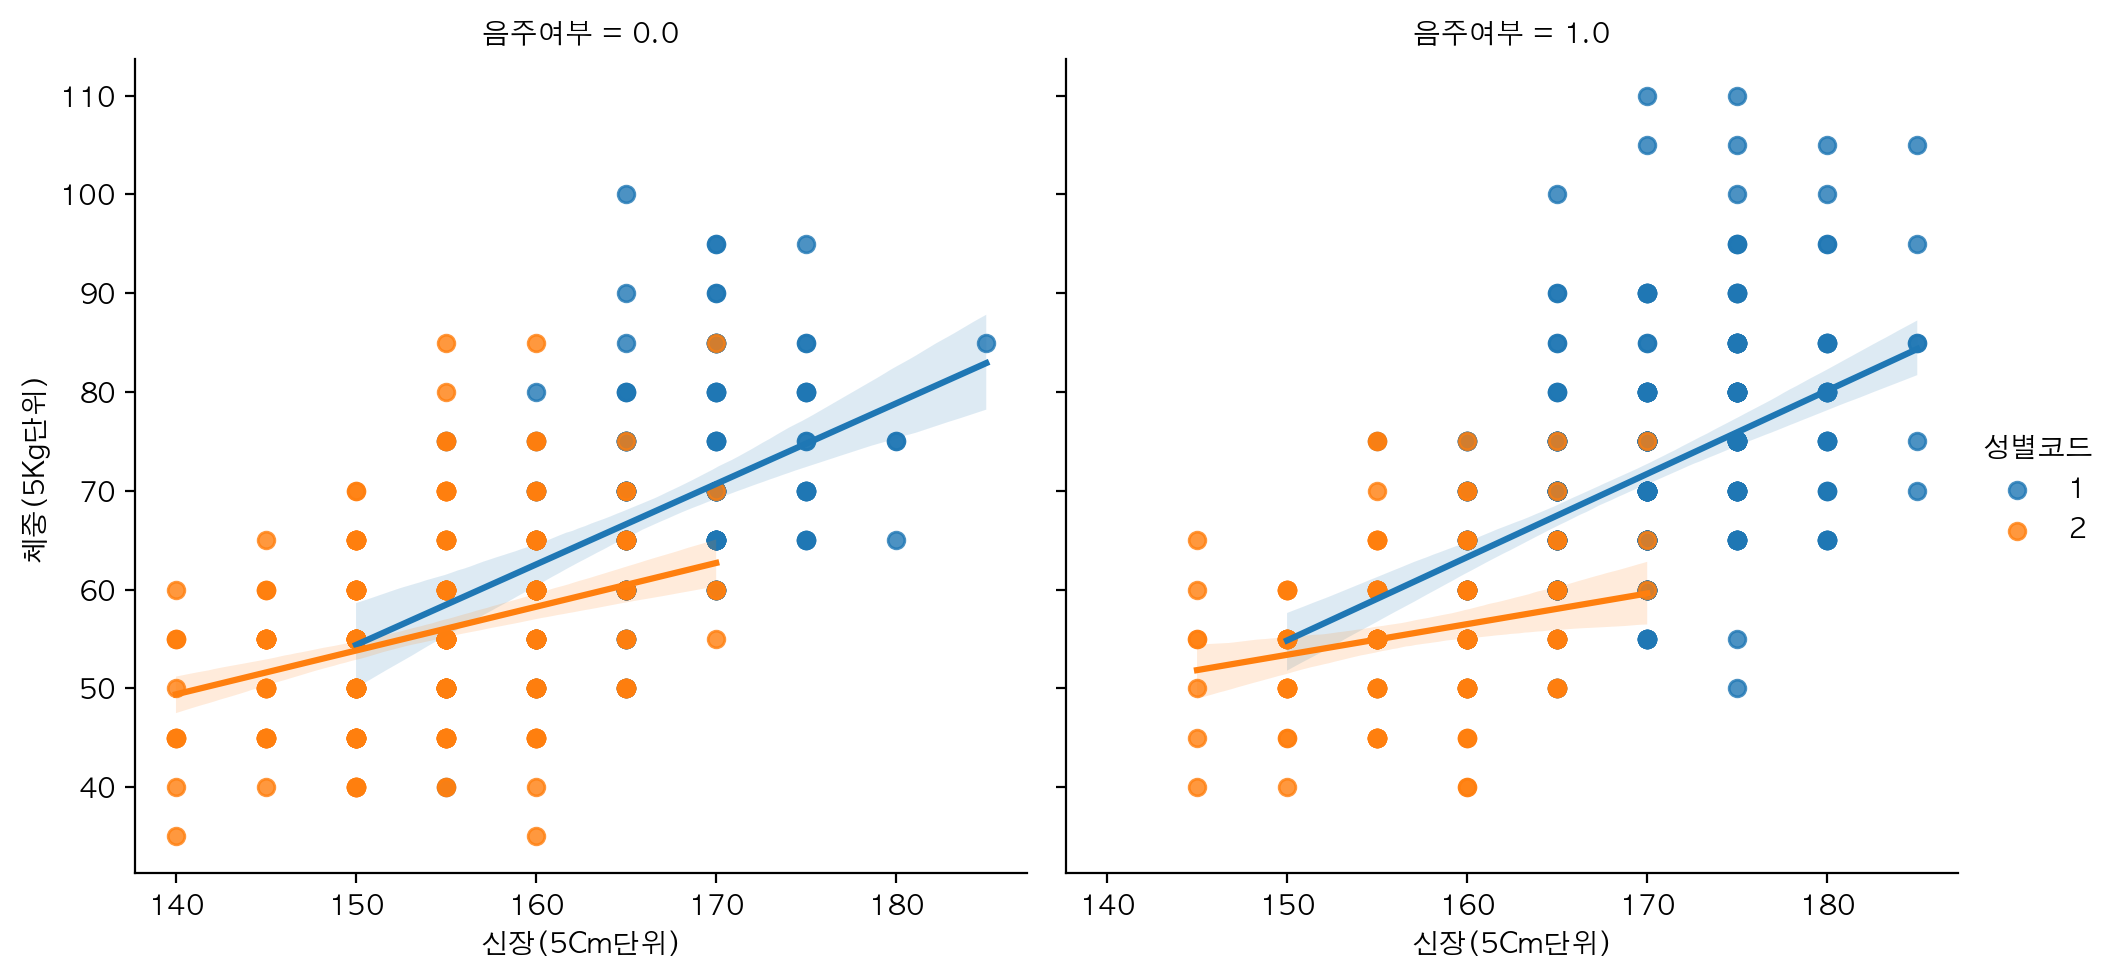

In [66]:
# lmplot의 col기능을 통해 음주여부에 따라 서브플롯을 그려봅니다.
plt.figure(figsize=(8, 7))
sns.lmplot(data=df_sample, x='신장(5Cm단위)', y='체중(5Kg단위)', hue='성별코드', col='음주여부')

/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


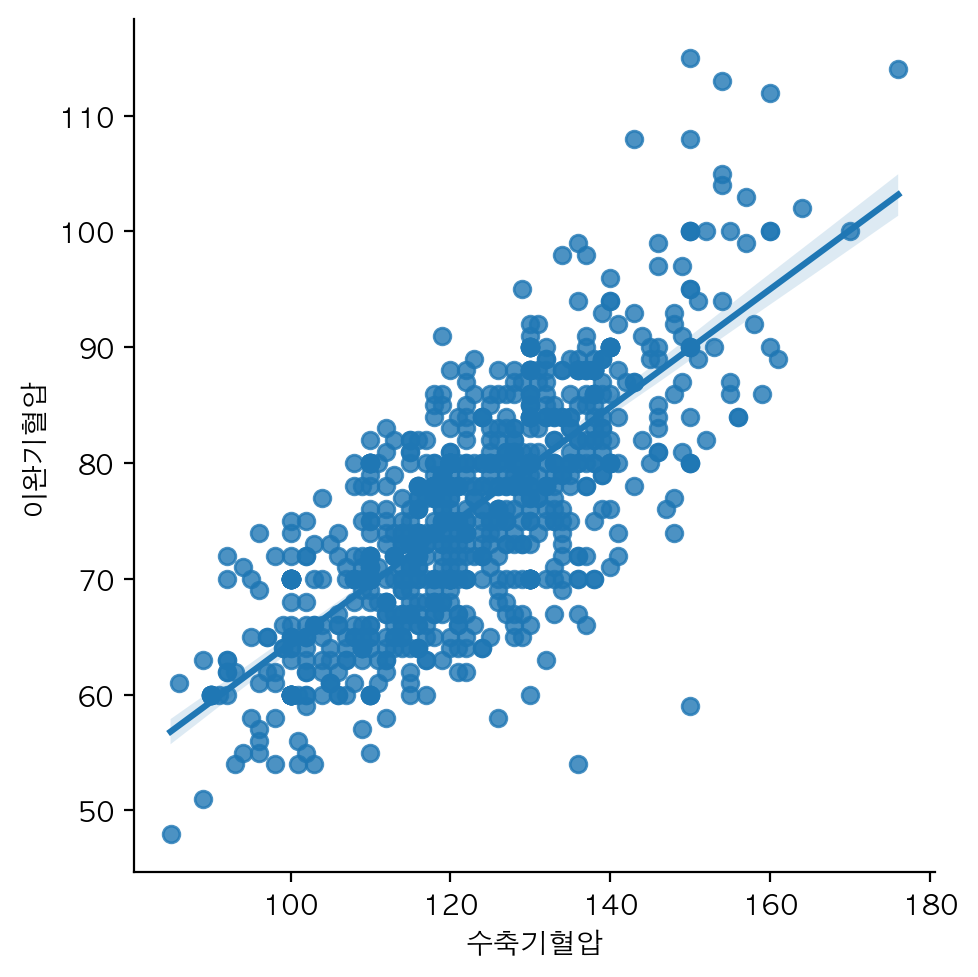

In [67]:
# lmplot 으로 수축기, 이완기혈압을 그리고 음주여부에 따라 다른 색상으로 표현되게 합니다.
sns.lmplot(data=df_sample, x='수축기혈압', y='이완기혈압')

/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


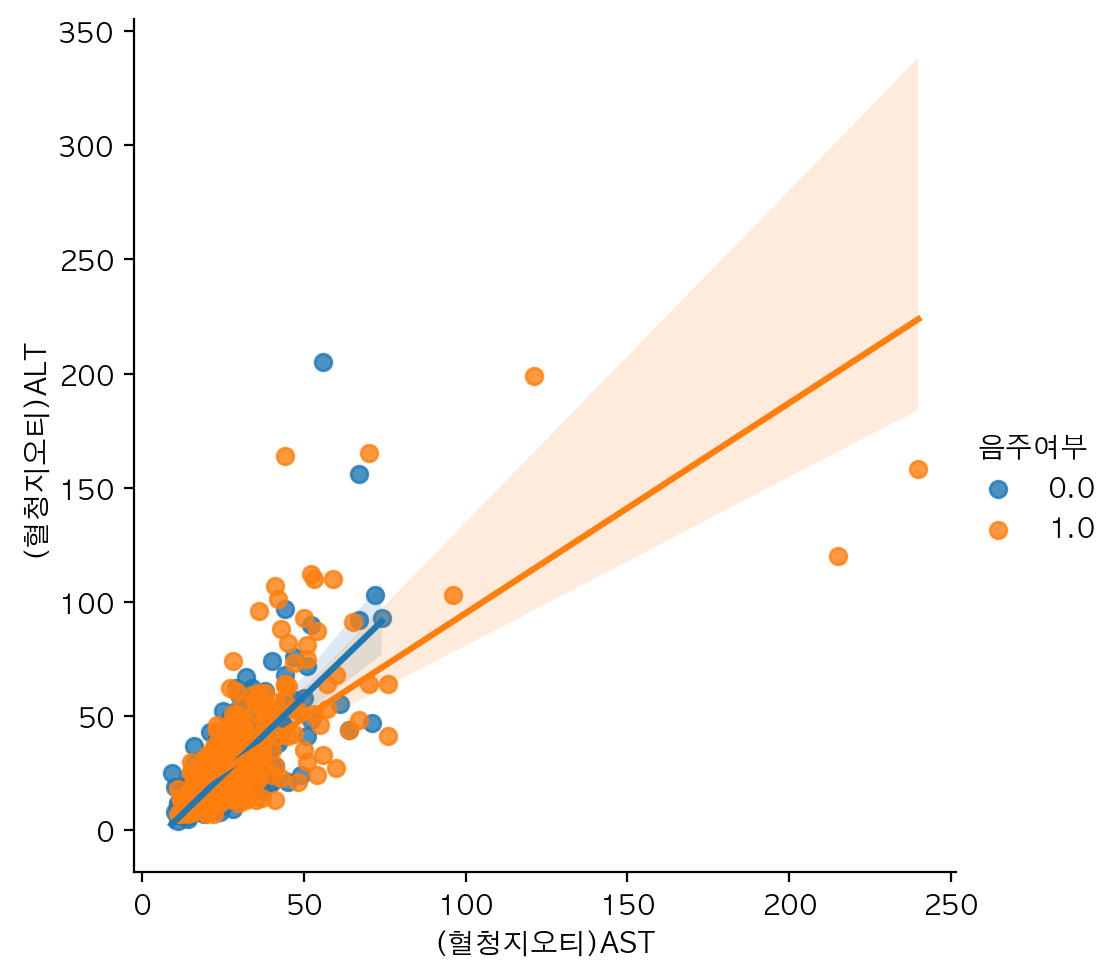

In [73]:
# lmplot으로 (혈청지오티)AST, (혈청지오티)ALT 을 그리고 음주여부에 따라 다른 색상으로 표현되게 합니다.
sns.lmplot(data=df_sample, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부')

### 15.3 이상치 다루기
- 이상치가 있으면 데이터가 자세히 보이지 않거나 이상치로 인해 회귀선이 달라지기도 합니다.
- 시각화를 통해 찾은 이상치를 제거하고 보거나 이상치만 따로 모아 보도록 합니다.

In [85]:
# "(혈청지오티)AST", "(혈청지오티)ALT" 가 400 이하인 값만 데이터프레임 형태로 추출해서
# df_ASLT라는 변수에 담습니다.
num = 400
c1 = df_sample["(혈청지오티)AST"] < num
c2 = df_sample["(혈청지오티)ALT"] < num
df_ASLT = df_sample[(c1) & (c2)]

/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


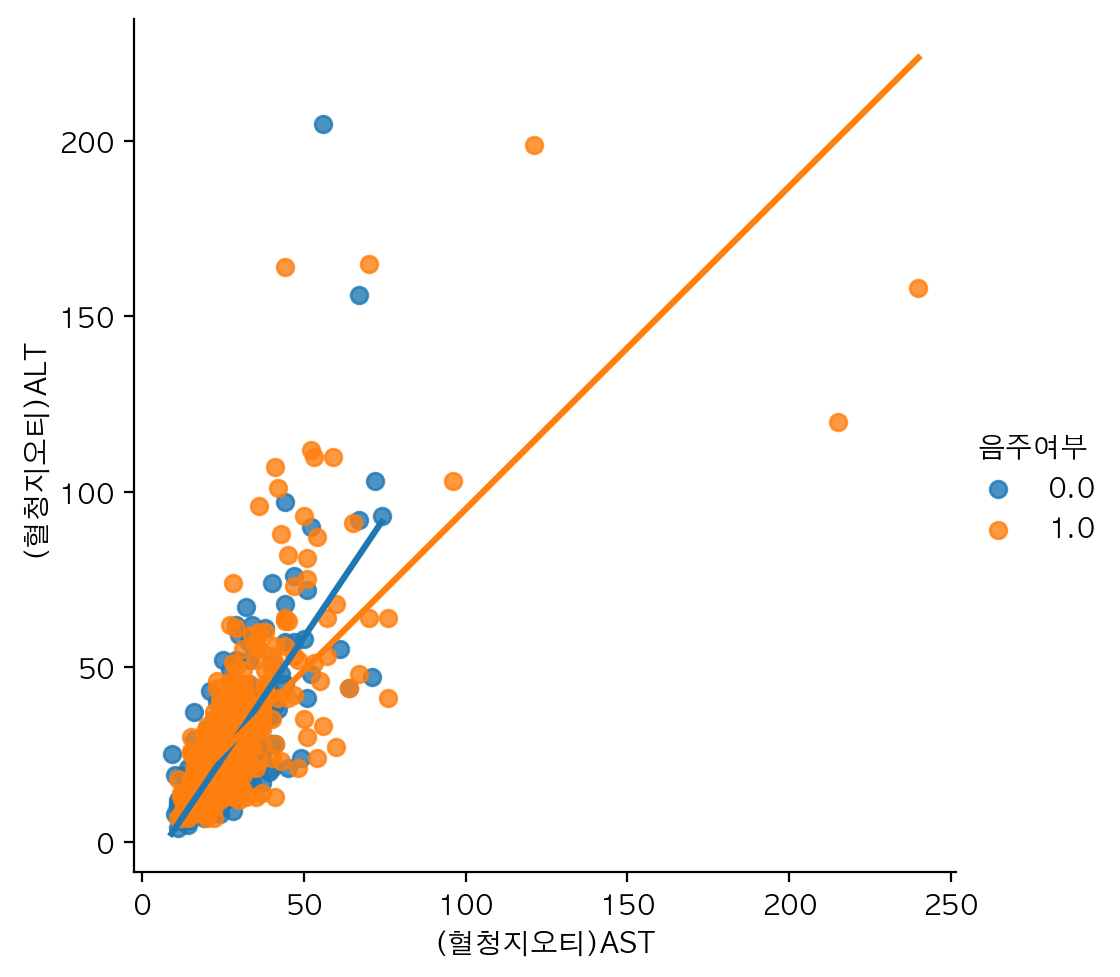

In [86]:
# 이상치를 제거한 "(혈청지오티)AST"와 "(혈청지오티)ALT"를 lmplot으로 그리며
# 음주여부에 따라 다른 색으로 표현합니다.
sns.lmplot(data=df_ASLT, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부', ci=None)

In [92]:
# "(혈청지오티)AST"와 "(혈청지오티)ALT"가 400 이상인 값만 데이터프레임 형태로 추출해서
# df_ASLT_high라는 변수에 담습니다.
num = 400
c1 = df["(혈청지오티)AST"] > num
c2 = df["(혈청지오티)ALT"] > num
df_ASLT_high = df[(c1) | (c2)]

/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


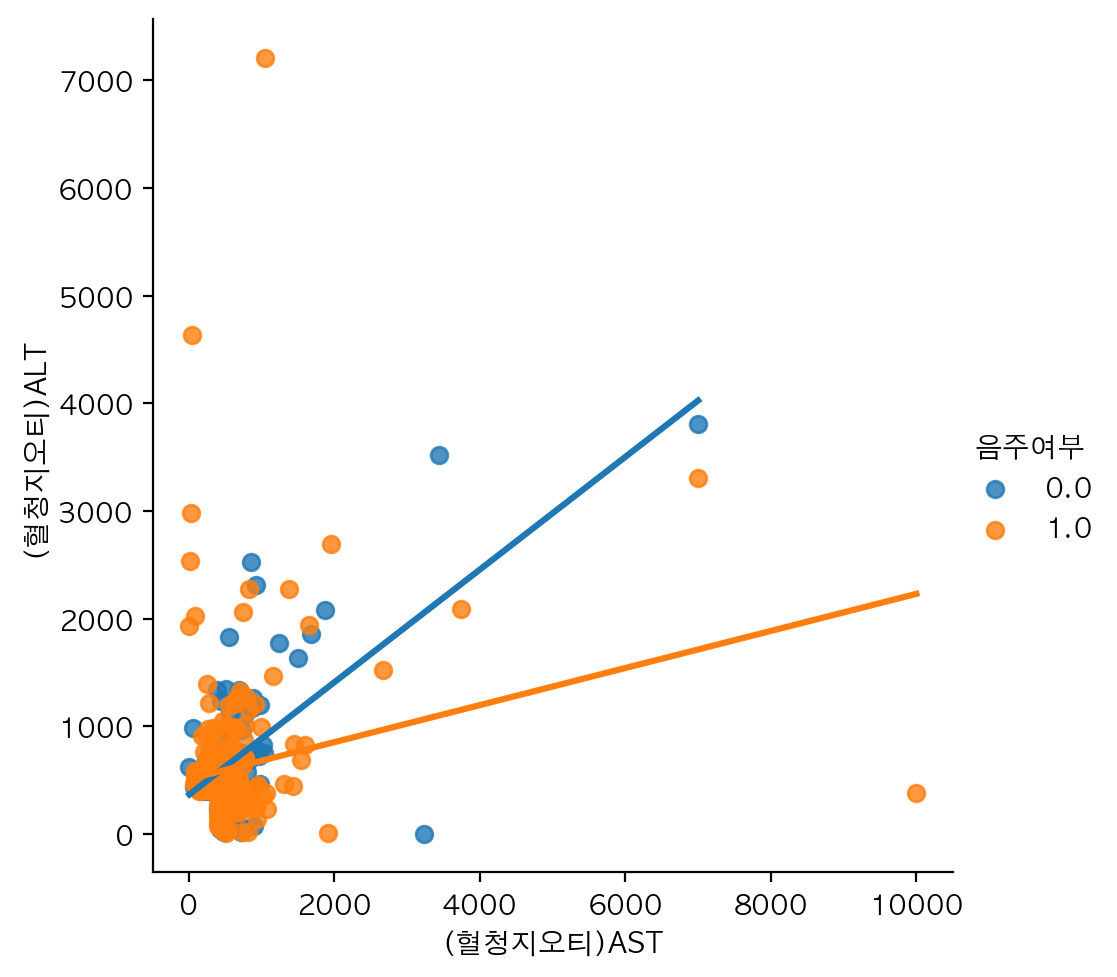

In [94]:
# 위에서 구한 df_ASLT_high 데이터 프레임에 담겨진 혈청지오티가 높은 데이터만 따로 봅니다.
sns.lmplot(data=df_ASLT_high, x='(혈청지오티)AST', y='(혈청지오티)ALT', hue='음주여부', ci=None)

In [97]:
df_ASLT_high_8000 = df_ASLT_high[df_ASLT_high["(혈청지오티)AST"] > 8000]
df_ASLT_high_8000.iloc[:, 10:27]

청력(좌)  청력(우)  수축기혈압  이완기혈압  식전혈당(공복혈당)  총콜레스테롤  트리글리세라이드  HDL콜레스테롤  \
541757    1.0    1.0   96.0   74.0        93.0   161.0      67.0      78.0   

        LDL콜레스테롤   혈색소  요단백  혈청크레아티닌  (혈청지오티)AST  (혈청지오티)ALT  감마지티피  흡연상태  \
541757      69.0  15.4  1.0      1.2      9999.0       380.0  419.0   3.0   

        음주여부  
541757   1.0

### 15.4 distplot
- 결측치가 존재하면 에러 발생
- series 형태로 값을 넣어줘야 함

In [99]:
# 수치형 데이터로 된 컬럼을 찾기 위해 컬럼명만 따로 출력합니다.

df.columns

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자'],
      dtype='object')

In [103]:
df_chol = df.loc[df['총콜레스테롤'].notnull(), '총콜레스테롤']
df_chol.head()

0    193.0
1    228.0
2    136.0
3    201.0
4    199.0
Name: 총콜레스테롤, dtype: float64

In [109]:
df_chol.describe()

count    999957.000000
mean        195.548251
std          38.718205
min          30.000000
25%         169.000000
50%         193.000000
75%         219.000000
max        2344.000000
Name: 총콜레스테롤, dtype: float64

/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


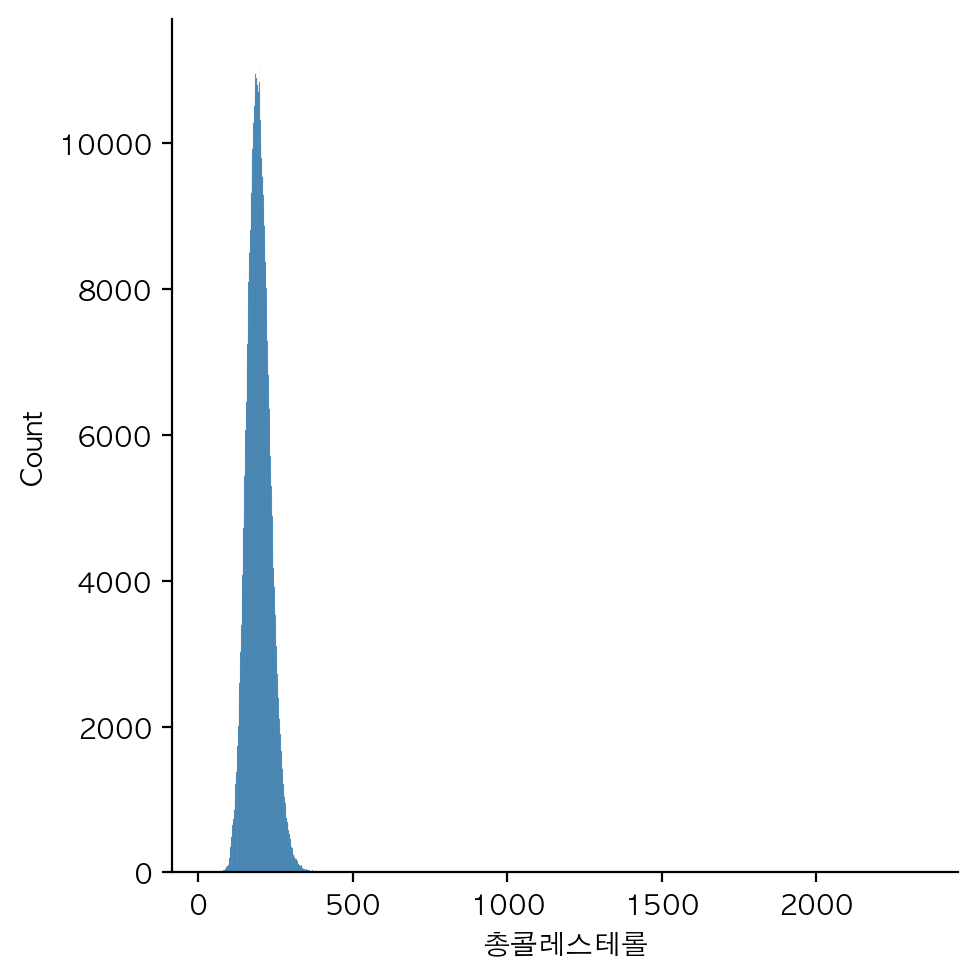

In [108]:
# "총콜레스테롤"에 따른 distplot을 그립니다.
sns.displot(df_chol)

/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


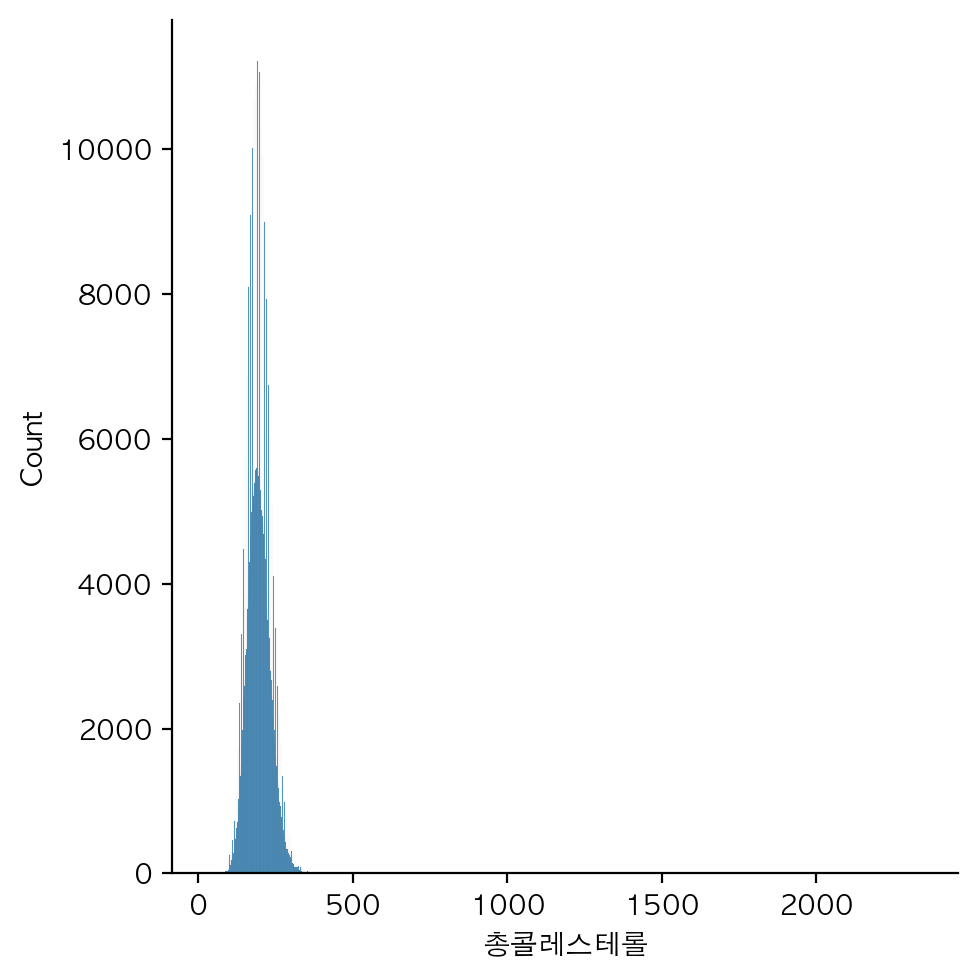

In [114]:
# 음주여부가 1인 값에 대한 "총콜레스테롤"을 distplot으로 그립니다.

sns.displot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부'] == 1), '총콜레스테롤'])

/Users/macos/anaconda3/envs/dl/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


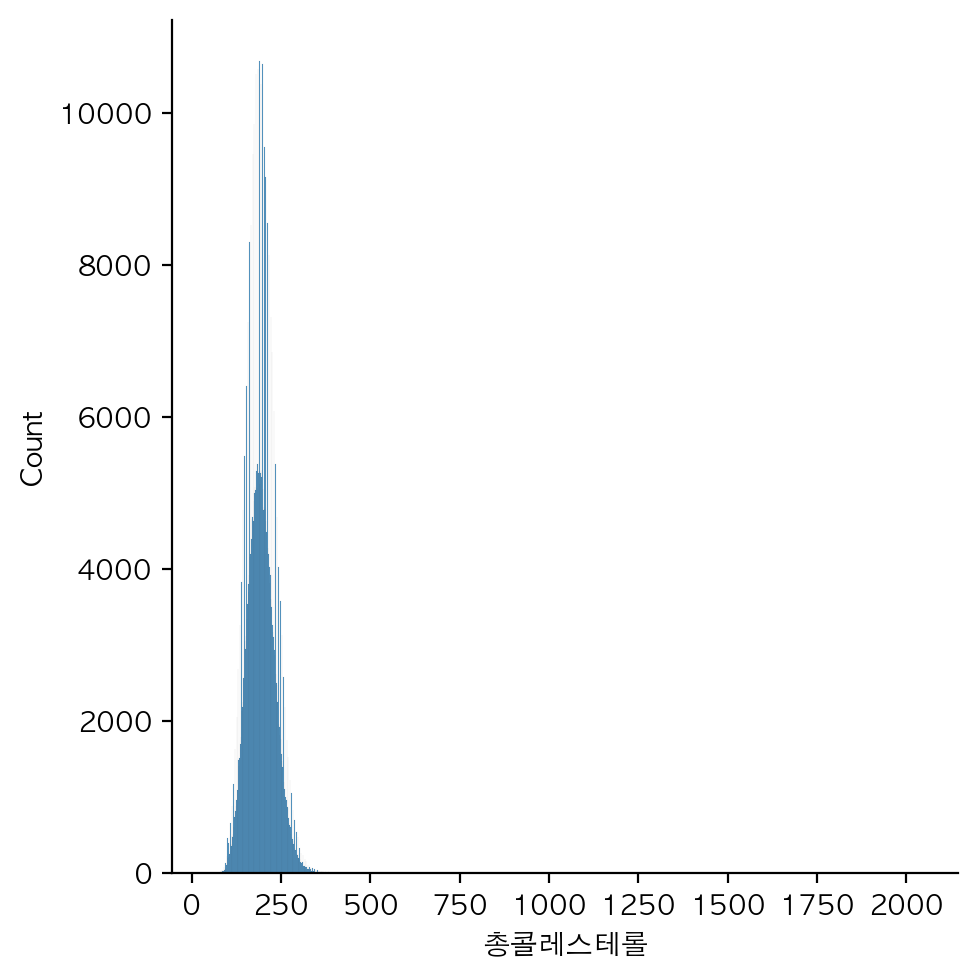

In [115]:
# 음주여부가 0인 값에 대한 "총콜레스테롤"을 distplot으로 그립니다.
sns.displot(df.loc[df['총콜레스테롤'].notnull() & (df['음주여부'] == 0), '총콜레스테롤'])

<Axes: xlabel='총콜레스테롤', ylabel='Density'>

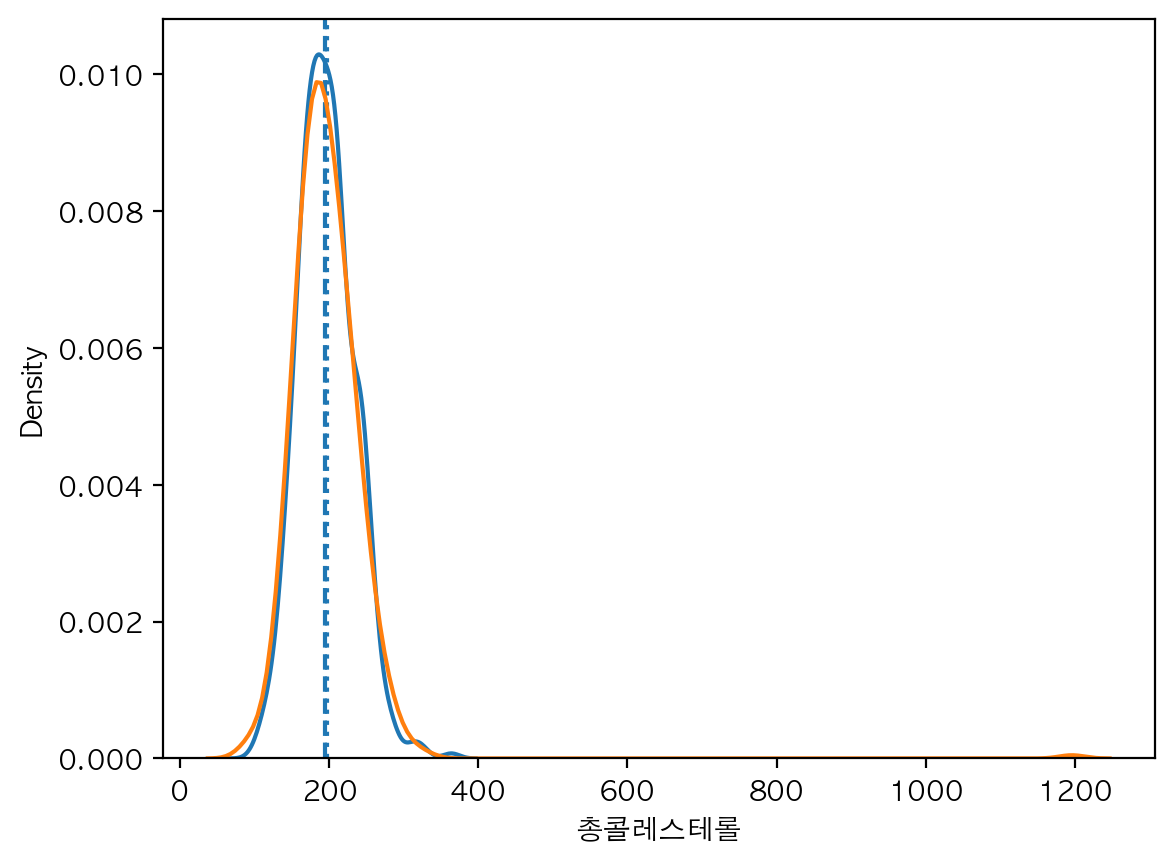

In [126]:
# 음주여부 값에 대한 "총콜레스테롤"을 distplot으로 그리며, 하나의 그래프에 표시되도록 합니다.
plt.axvline(df_sample['총콜레스테롤'].mean(), linestyle=":")
plt.axvline(df_sample['총콜레스테롤'].median(), linestyle="--")
sns.kdeplot(df_sample.loc[df['총콜레스테롤'].notnull() & (df['음주여부'] == 1), '총콜레스테롤'], label='음주 중')
sns.kdeplot(df_sample.loc[df['총콜레스테롤'].notnull() & (df['음주여부'] == 0), '총콜레스테롤'], label='음주 안 함')

<Axes: xlabel='감마지티피', ylabel='Density'>

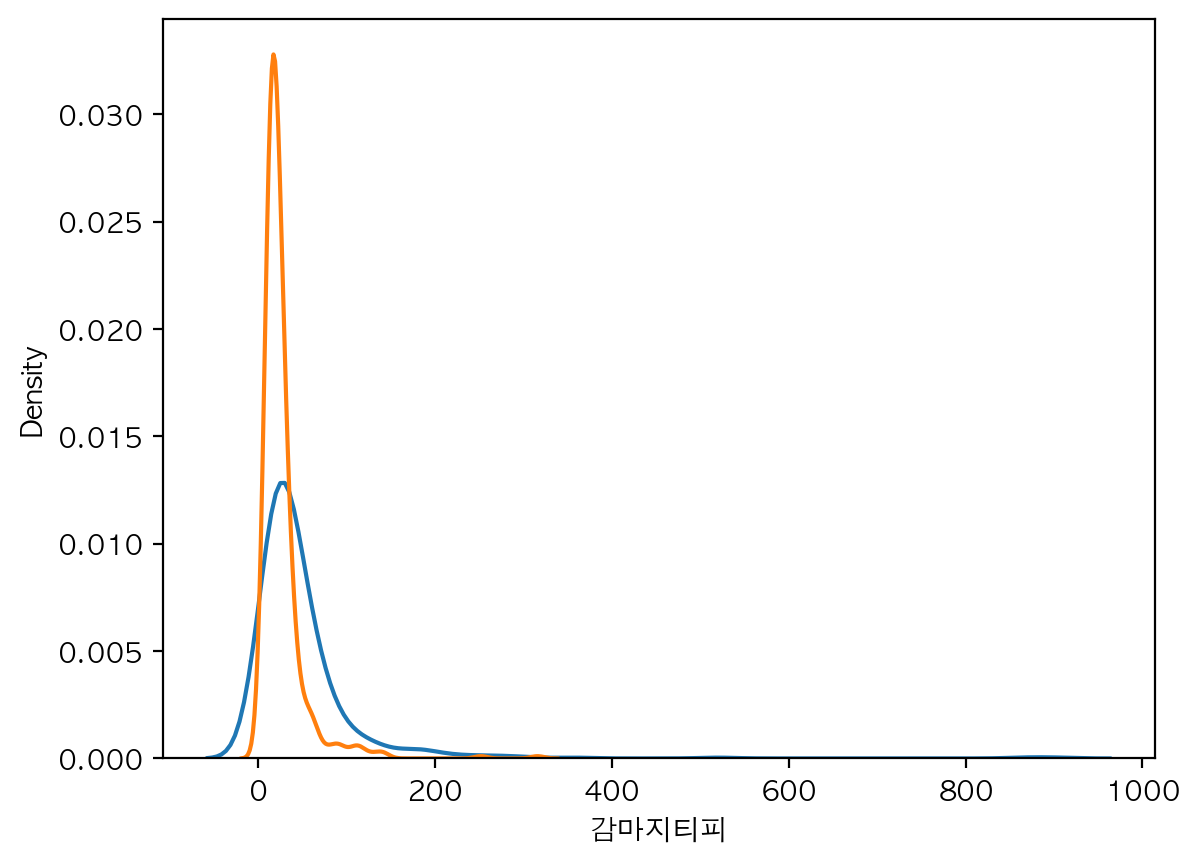

In [133]:
# 감마지티피 값에 따라 음주여부를 시각화 합니다.
s_1 = df_sample.loc[df_sample['음주여부'] == 1, '감마지티피']
s_0 = df_sample.loc[df_sample['음주여부'] == 0, '감마지티피']

sns.kdeplot(s_1, label='음주 중')
sns.kdeplot(s_0, label='음주 안 함')

## 16. 상관 분석

In [148]:
# 상관계수에 사용할 컬럼을 변수에 담습니다.
columns = ['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상', '치석',
       '데이터공개일자']
columns

['기준년도',
 '가입자일련번호',
 '성별코드',
 '연령대코드(5세단위)',
 '시도코드',
 '신장(5Cm단위)',
 '체중(5Kg단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부',
 '구강검진수검여부',
 '치아우식증유무',
 '결손치유무',
 '치아마모증유무',
 '제3대구치(사랑니)이상',
 '치석',
 '데이터공개일자']

### 16.1 상관계수 구하기

In [152]:
# 샘플컬럼만 가져와서 df_small이라는 데이터프레임에 담은 뒤 상관계수를 구합니다.
df_small = df_sample[columns]
df_corr = df_small.corr()
df_corr

기준년도   가입자일련번호      성별코드  연령대코드(5세단위)      시도코드  신장(5Cm단위)  \
기준년도           NaN       NaN       NaN          NaN       NaN        NaN   
가입자일련번호        NaN  1.000000  0.011604    -0.008701  0.009251  -0.045786   
성별코드           NaN  0.011604  1.000000     0.095413 -0.035540  -0.746638   
연령대코드(5세단위)    NaN -0.008701  0.095413     1.000000 -0.004458  -0.380239   
시도코드           NaN  0.009251 -0.035540    -0.004458  1.000000   0.012970   
신장(5Cm단위)      NaN -0.045786 -0.746638    -0.380239  0.012970   1.000000   
체중(5Kg단위)      NaN  0.009230 -0.603975    -0.200336  0.009210   0.665067   
허리둘레           NaN -0.023395 -0.431738     0.159797 -0.000767   0.312230   
시력(좌)          NaN  0.029987 -0.168235    -0.217613  0.035907   0.202426   
시력(우)          NaN  0.039214 -0.211323    -0.308829 -0.007020   0.236260   
청력(좌)          NaN -0.039543 -0.019111     0.233960  0.029592  -0.064044   
청력(우)          NaN -0.034870 -0.004242     0.264549 -0.017537  -0.074738   
수축기혈압          NaN -0.001607 -0.180369     0.222408  0.037585   0.063929   
이완기혈압          NaN  0.031821 -0.228559     0.091006  0.040576   0.157810   
식전혈당(공복혈당)     NaN  0.020847 -0.107628     0.215097  0.023215   0.005997   
총콜레스테롤         NaN  0.002905  0.035714    -0.008847  0.017103  -0.004133   
트리글리세라이드       NaN -0.000252 -0.183028     0.037474  0.024771   0.135087   
HDL콜레스테롤       NaN -0.006734  0.333060    -0.095972 -0.110483  -0.207537   
LDL콜레스테롤       NaN -0.009826 -0.003315     0.008560  0.046834   0.008146   
혈색소            NaN  0.015393 -0.665420    -0.178977  0.013586   0.541155   
요단백            NaN  0.041329 -0.050040     0.058702 -0.009841  -0.007699   
혈청크레아티닌        NaN -0.021453 -0.322770     0.044958  0.028772   0.212811   
(혈청지오티)AST     NaN -0.036342 -0.196303     0.129357 -0.031223   0.055783   
(혈청지오티)ALT     NaN  0.006068 -0.262922    -0.009871 -0.032959   0.159199   
감마지티피          NaN -0.033022 -0.249141    -0.015357  0.012384   0.185091   
흡연상태           NaN  0.008123 -0.608288    -0.121132  0.049591   0.512294   
음주여부           NaN -0.016288 -0.375005    -0.275285 -0.013106   0.410946   
구강검진수검여부       NaN  0.002729 -0.079699    -0.198779 -0.068677   0.106946   
치아우식증유무        NaN       NaN       NaN          NaN       NaN        NaN   
결손치유무          NaN       NaN       NaN          NaN       NaN        NaN   
치아마모증유무        NaN       NaN       NaN          NaN       NaN        NaN   
제3대구치(사랑니)이상   NaN       NaN       NaN          NaN       NaN        NaN   
치석             NaN  0.006725  0.035993     0.070314  0.029183  -0.070799   
데이터공개일자        NaN       NaN       NaN          NaN       NaN        NaN   

              체중(5Kg단위)      허리둘레     시력(좌)     시력(우)  ...     감마지티피  \
기준년도                NaN       NaN       NaN       NaN  ...       NaN   
가입자일련번호        0.009230 -0.023395  0.029987  0.039214  ... -0.033022   
성별코드          -0.603975 -0.431738 -0.168235 -0.211323  ... -0.249141   
연령대코드(5세단위)   -0.200336  0.159797 -0.217613 -0.308829  ... -0.015357   
시도코드           0.009210 -0.000767  0.035907 -0.007020  ...  0.012384   
신장(5Cm단위)      0.665067  0.312230  0.202426  0.236260  ...  0.185091   
체중(5Kg단위)      1.000000  0.785950  0.122194  0.168929  ...  0.246924   
허리둘레           0.785950  1.000000  0.017355  0.030809  ...  0.234831   
시력(좌)          0.122194  0.017355  1.000000  0.346265  ...  0.111903   
시력(우)          0.168929  0.030809  0.346265  1.000000  ...  0.035304   
청력(좌)         -0.043727  0.050644 -0.039499 -0.072118  ... -0.025004   
청력(우)         -0.047717  0.073086 -0.081000 -0.102880  ... -0.024936   
수축기혈압          0.288983  0.349219 -0.012888 -0.036395  ...  0.191333   
이완기혈압          0.324783  0.329256  0.027854  0.001282  ...  0.200150   
식전혈당(공복혈당)     0.164926  0.235417 -0.041152 -0.043653  ...  0.115353   
총콜레스테롤         0.050713  0.036389 -0.052320  0.016831  ...  0.053055   
트리글리세라이드       0.260689  0.267643  0.032493  0.070753  ...  0.271554   
HDL콜레스테롤      -0.330577 -0.311478 -0.045579 -0.068572  ..

In [156]:
# 키에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.
df_corr.loc[df_corr['신장(5Cm단위)'] > 0.1, '신장(5Cm단위)']

신장(5Cm단위)     1.000000
체중(5Kg단위)     0.665067
허리둘레          0.312230
시력(좌)         0.202426
시력(우)         0.236260
이완기혈압         0.157810
트리글리세라이드      0.135087
혈색소           0.541155
혈청크레아티닌       0.212811
(혈청지오티)ALT    0.159199
감마지티피         0.185091
흡연상태          0.512294
음주여부          0.410946
구강검진수검여부      0.106946
Name: 신장(5Cm단위), dtype: float64

In [157]:
# 음주여부에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.
df_corr.loc[df_corr['음주여부'] > 0.1, '음주여부']

신장(5Cm단위)     0.410946
체중(5Kg단위)     0.290207
허리둘레          0.134891
시력(우)         0.158678
이완기혈압         0.108679
트리글리세라이드      0.134188
혈색소           0.312005
(혈청지오티)AST    0.125927
(혈청지오티)ALT    0.138756
감마지티피         0.206864
흡연상태          0.344286
음주여부          1.000000
구강검진수검여부      0.100594
Name: 음주여부, dtype: float64

In [159]:
# 혈색소에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.
df_corr.loc[df_corr['혈색소'] > 0.1, '혈색소']

신장(5Cm단위)     0.541155
체중(5Kg단위)     0.540191
허리둘레          0.377673
시력(좌)         0.142582
시력(우)         0.190303
수축기혈압         0.169241
이완기혈압         0.255690
식전혈당(공복혈당)    0.124883
트리글리세라이드      0.220292
혈색소           1.000000
혈청크레아티닌       0.108274
(혈청지오티)AST    0.224768
(혈청지오티)ALT    0.331891
감마지티피         0.245109
흡연상태          0.434467
음주여부          0.312005
구강검진수검여부      0.122835
Name: 혈색소, dtype: float64

In [162]:
# 감마지티피에 대한 상관계수가 특정 수치 이상인 데이터를 봅니다.
df_corr['감마지티피'].sort_values(ascending=False).head(7)

감마지티피         1.000000
(혈청지오티)AST    0.531529
(혈청지오티)ALT    0.424481
트리글리세라이드      0.271554
체중(5Kg단위)     0.246924
혈색소           0.245109
허리둘레          0.234831
Name: 감마지티피, dtype: float64

### 16.2 heatmap

<Axes: >

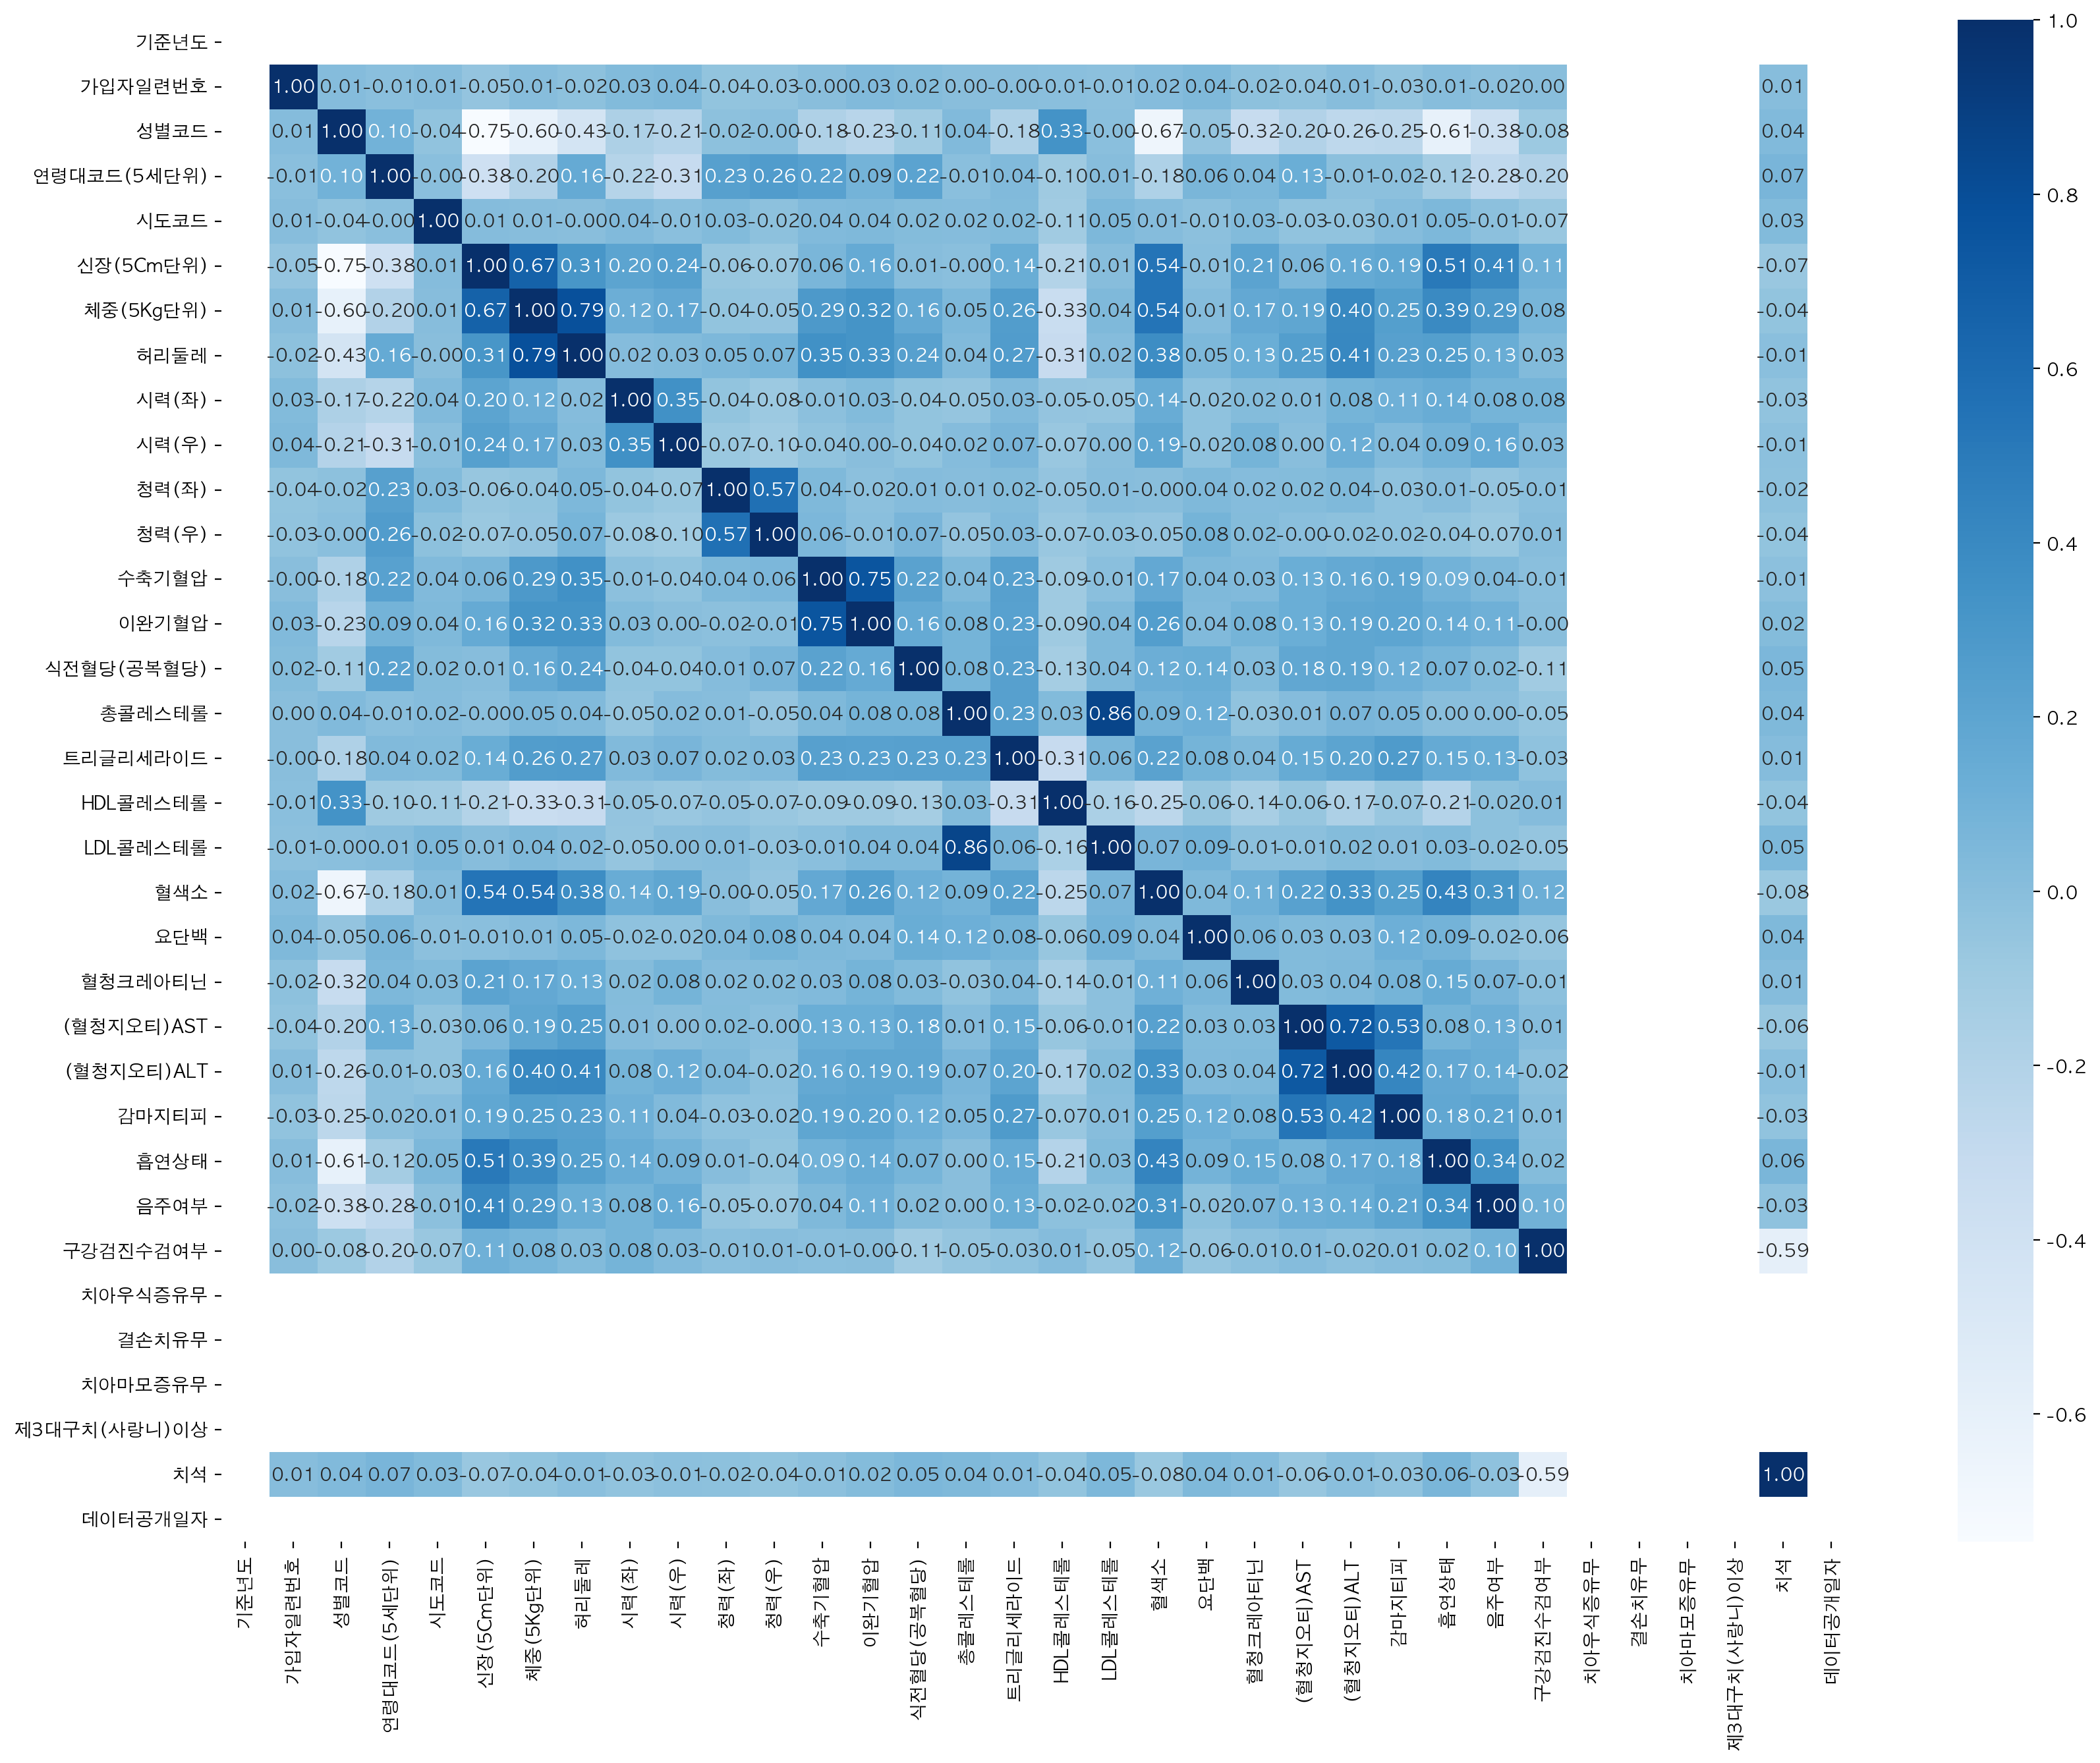

In [166]:
# 위에서 구한 상관계수를 heatmap을 통해 표현해봅니다.
plt.figure(figsize=(20, 15))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='Blues')

<Axes: >

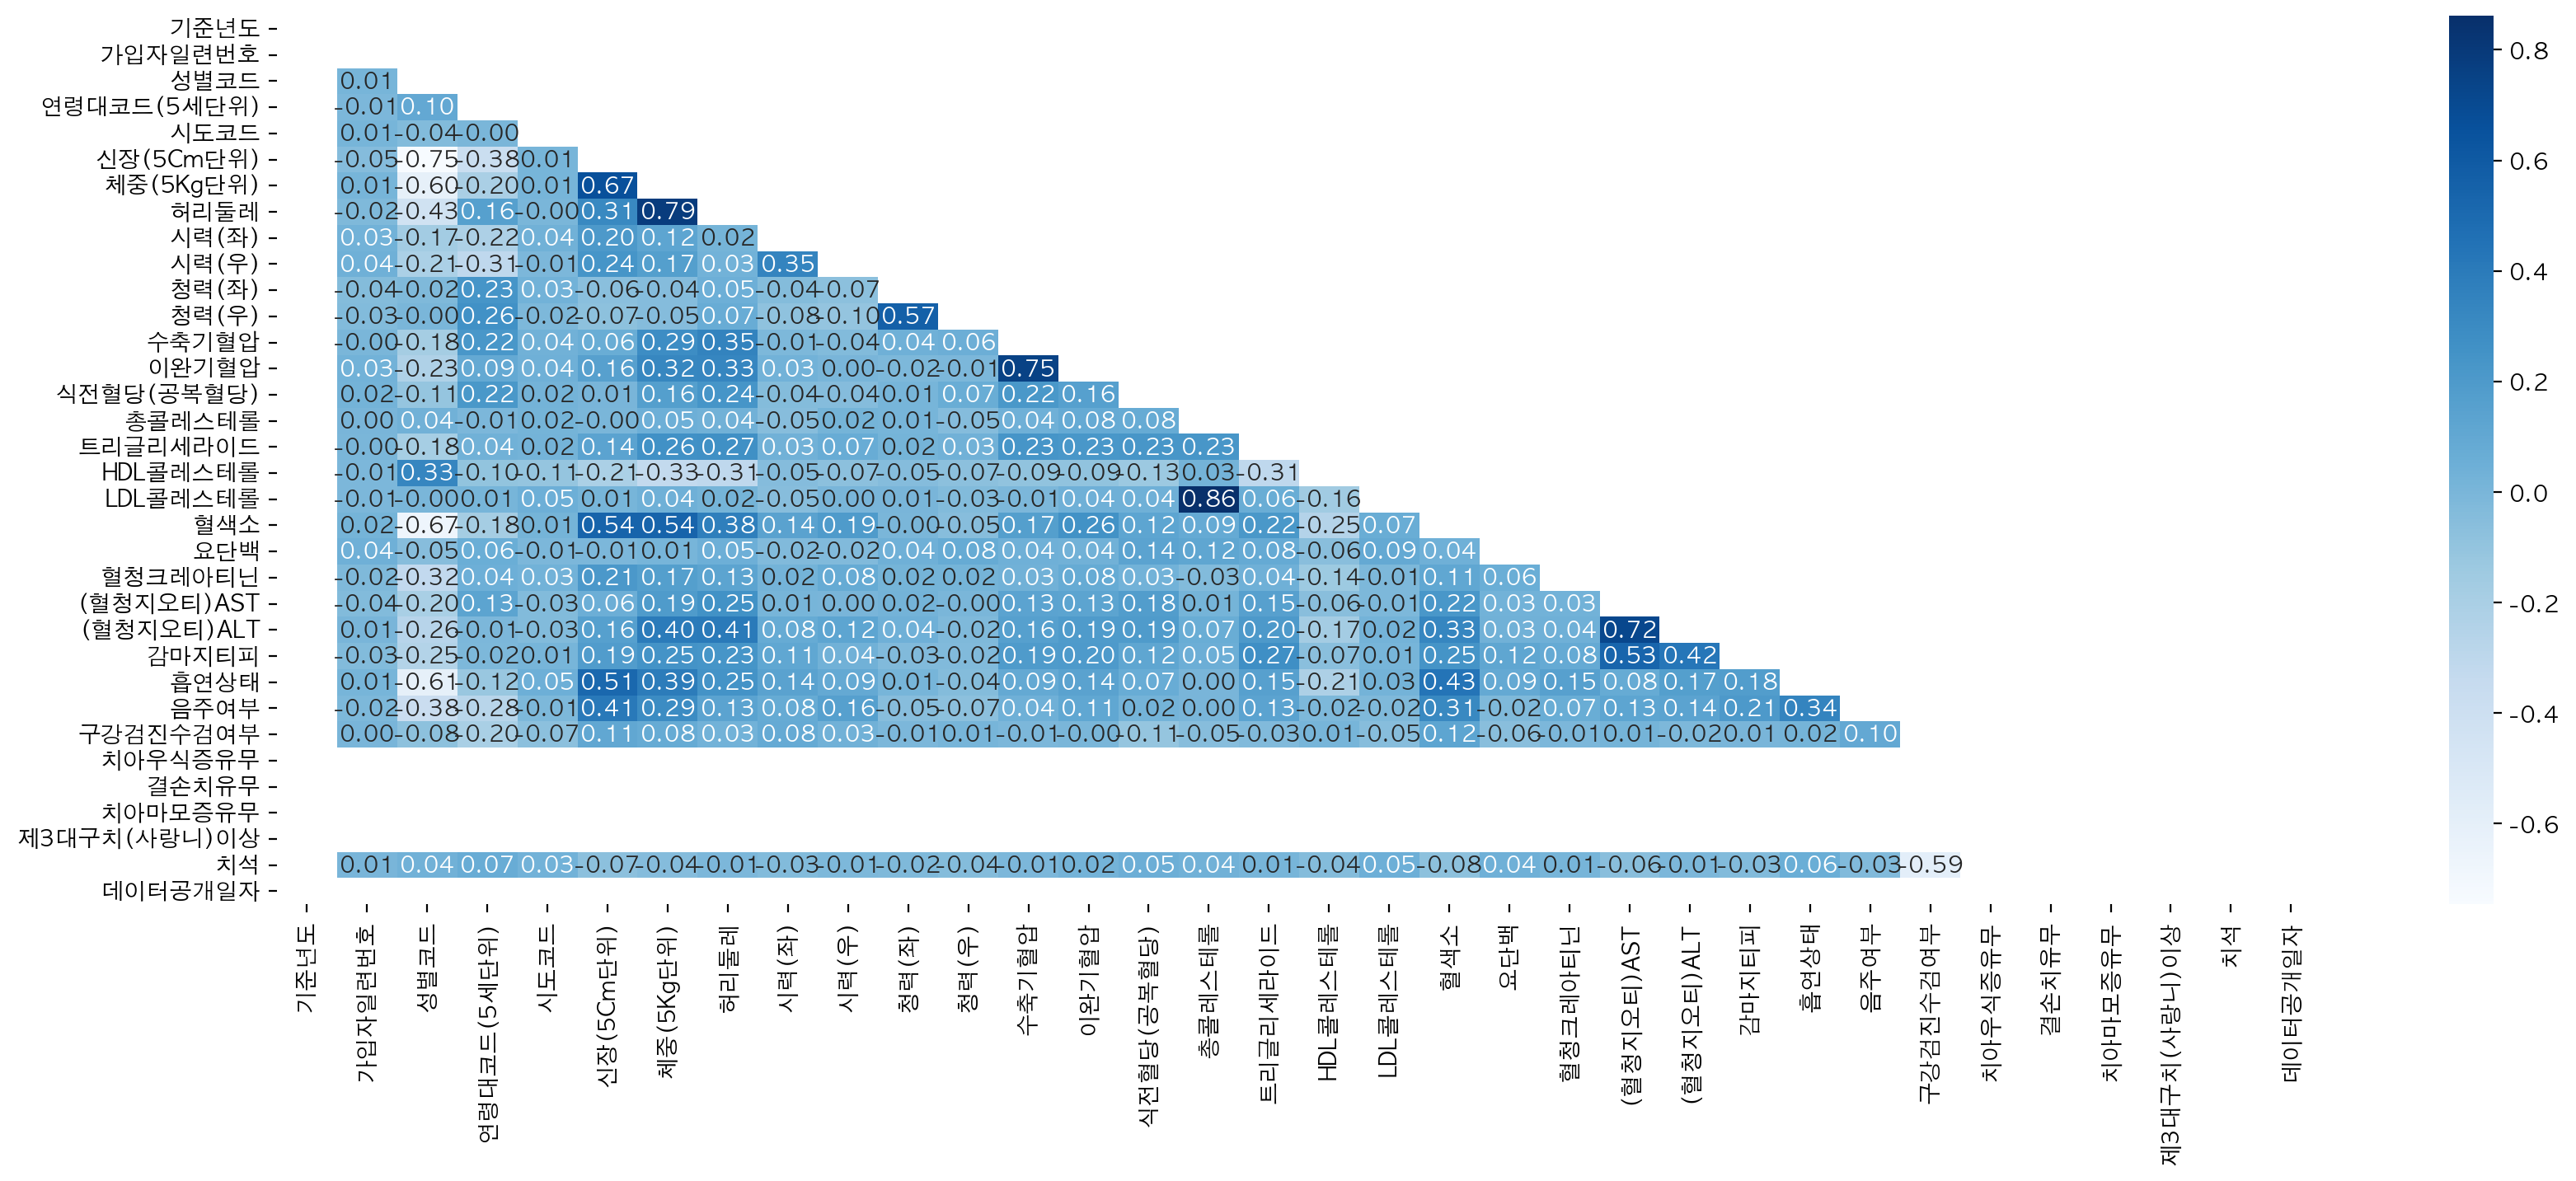

In [169]:
mask = np.triu(np.ones_like(df_corr, dtype=bool))

plt.figure(figsize=(20, 7))
sns.heatmap(df_corr, annot=True, fmt='.2f', cmap='Blues', mask=mask)